In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import torch
import json
import ast
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import emoji
from wordcloud import WordCloud
import re 
import string
import warnings 
warnings.simplefilter(action='ignore',category=FutureWarning)
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer #to stem words
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
from tqdm.auto import tqdm
from transformers import RobertaTokenizer, RobertaForSequenceClassification
import seaborn as sns

/var/folders/cq/zrrjq02s1hq2p31y3d6tbfm80000gn/T/ipykernel_28808/424868177.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/Users/deepeshdwivedi/Documents/ESSEC & Centrale M2/Descartes_Code/Artefact_Test/env_artefact/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [26]:
data_tweets = pd.read_csv('/Users/deepeshdwivedi/Documents/ESSEC & Centrale M2/Descartes_Code/Artefact_Test/dataset.csv_(DS_A-L2).csv')
pd.set_option('display.max_colwidth', None)
data_tweets.head()

,id,content,date,language,tags,title,ratings
0,377380-203583770957,من الاماكن الهاديه الجميله الممتعه في التسوق تحس انك بالخبر,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c07bdfc8hb0r13sa7agg', 'sentiment': None}, {'value': 'c07bdfc8hb0r13sa7ah0', 'sentiment': None}]",Al Ahsa Mall by Arabian Centres,"{'normalized': 100, 'raw': 5}"
1,377380-203585579625,مساحة خضراء تتنفس فيها الهواء النقي .. المناظر الطبيعية ..الالعاب الترفيهية المناسبة للأطفال 😍😍 بحر الخليج,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c07bdncbb64t6si78ssg', 'sentiment': None}, {'value': 'c07bdofepd3oq1r123kg', 'sentiment': None}, {'value': 'c0rquskbb64sdb6ukkq0', 'sentiment': None}, {'value': 'c0rqv8sbb64sdb6ukks0', 'sentiment': None}, {'value': 'c07bdifepd3oq1r122rg', 'sentiment': None}]","King Abdullah Park, Sea front","{'normalized': 100, 'raw': 5}"
2,377380-203590496913,nice place,2021-04-11T06:45:00+00:00,eng,"[{'value': 'c0rlhqgcu1i938rekca0', 'sentiment': None}]",Green Mountain Resort,"{'normalized': 100, 'raw': 5}"
3,377380-203589330972,جميل❤,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c9ga0skbb64rs4ni6s7g', 'sentiment': None}]",Waterfront Beach Royal Commission Yanbu,"{'normalized': 80, 'raw': 4}"
4,377380-203586632060,جميييل,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c07bdncbb64t6si78ssg', 'sentiment': None}, {'value': 'c07bdifepd3oq1r122rg', 'sentiment': None}]",Dammam Corniche,"{'normalized': 100, 'raw': 5}"


In [27]:
data_tweets.isna().sum()

id           0
content      0
date         0
language     0
tags         0
title        0
ratings     10
dtype: int64

In [28]:
data_tweets.language.value_counts()

language
ara    7610
eng    2390
Name: count, dtype: int64

## Check for unwanted reviews

In [29]:
import pandas as pd

# Regular expression pattern to match strings that start with "[["
pattern = r'^\[\['

# Filter rows where 'content' starts with "[["
data_start_brackets = data_tweets[data_tweets['content'].str.contains('false', na=False, regex=True)]

# Display the first few rows of the filtered DataFrame
data_start_brackets.head()


,id,content,date,language,tags,title,ratings
270,377380-177145272626,"فندوق ممتاز وهدوء"",null,""فندوق ممتاز وهدوء"",false,false]]",2021-06-04T06:44:00+00:00,ara,"[{'value': 'c07bdkkbb64t6si78s20', 'sentiment': None}]",Jiwar Hotel,"{'normalized': 80, 'raw': 4}"
271,377380-177253693452,"يحتاج تغيير العفش"",null,""يحتاج تغيير العفش"",false,false]]",2021-06-04T16:47:00+00:00,ara,"[{'value': 'c07bdkkbb64t6si78s20', 'sentiment': None}]",Prime Hotel Al Hamra,"{'normalized': 40, 'raw': 2}"
277,377380-177440940992,"يقع في حي الفلاح"",null,""يقع في حي الفلاح"",false,false]]",2021-06-07T04:25:00+00:00,ara,"[{'value': 'c07bdkkbb64t6si78s20', 'sentiment': None}]",Lujain AL Gharbyah Furnished Units,"{'normalized': 100, 'raw': 5}"
281,377380-177511668376,"جميل وهتدي والاكل لذيذ"",null,""جميل وهتدي والاكل لذيذ"",false,false]]",2021-06-08T07:08:00+00:00,ara,"[{'value': 'c0rqv44bb64sdb6ukkr0', 'sentiment': None}]",Braira Olaya Hotel,"{'normalized': 100, 'raw': 5}"
287,377380-177696194218,"جميل مريح اجازه جميله قضيتها فيه أنصح بزيارته"",null,""جميل مريح اجازه جميله قضيتها فيه أنصح بزيارته"",false,false]]",2021-06-10T06:06:00+00:00,ara,"[{'value': 'c0rqv44bb64sdb6ukkr0', 'sentiment': None}]",Millennia Hotel Olaya,"{'normalized': 80, 'raw': 4}"


In [30]:
data_start_brackets.value_counts

<bound method DataFrame.value_counts of                        id  \
270   377380-177145272626   
271   377380-177253693452   
277   377380-177440940992   
281   377380-177511668376   
287   377380-177696194218   
...                   ...   
8419  377380-177269237932   
8435  377380-177518514589   
8436  377380-177696974290   
8443  377380-178176293432   
8445  377380-178111785674   

                                                                                                                content  \
270                                                           فندوق ممتاز وهدوء",null,"فندوق ممتاز وهدوء",false,false]]   
271                                                           يحتاج تغيير العفش",null,"يحتاج تغيير العفش",false,false]]   
277                                                             يقع في حي الفلاح",null,"يقع في حي الفلاح",false,false]]   
281                                                 جميل وهتدي والاكل لذيذ",null,"جميل وهتدي والاكل لذيذ",false,false]]

In [32]:
import pandas as pd
import re

def clean_content(row):
    # Remove patterns like "\",null,\"" and ",false,false]]"
    cleaned_content = re.sub(r'(,false)+\]\]', '', row)
    cleaned_content = re.sub(r'",null,"', '', cleaned_content)
    # Additional pattern to remove a solitary "false"
    cleaned_content = re.sub(r',false', '', cleaned_content)
    return cleaned_content

# Apply the function to the 'content' column
data_start_brackets['clean_content'] = data_start_brackets['content'].apply(clean_content)

# Display the first few rows of the DataFrame to check the results
data_start_brackets.head()


/var/folders/cq/zrrjq02s1hq2p31y3d6tbfm80000gn/T/ipykernel_28808/1534768705.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_start_brackets['clean_content'] = data_start_brackets['content'].apply(clean_content)


,id,content,date,language,tags,title,ratings,clean_content
270,377380-177145272626,"فندوق ممتاز وهدوء"",null,""فندوق ممتاز وهدوء"",false,false]]",2021-06-04T06:44:00+00:00,ara,"[{'value': 'c07bdkkbb64t6si78s20', 'sentiment': None}]",Jiwar Hotel,"{'normalized': 80, 'raw': 4}","فندوق ممتاز وهدوءفندوق ممتاز وهدوء"""
271,377380-177253693452,"يحتاج تغيير العفش"",null,""يحتاج تغيير العفش"",false,false]]",2021-06-04T16:47:00+00:00,ara,"[{'value': 'c07bdkkbb64t6si78s20', 'sentiment': None}]",Prime Hotel Al Hamra,"{'normalized': 40, 'raw': 2}","يحتاج تغيير العفشيحتاج تغيير العفش"""
277,377380-177440940992,"يقع في حي الفلاح"",null,""يقع في حي الفلاح"",false,false]]",2021-06-07T04:25:00+00:00,ara,"[{'value': 'c07bdkkbb64t6si78s20', 'sentiment': None}]",Lujain AL Gharbyah Furnished Units,"{'normalized': 100, 'raw': 5}","يقع في حي الفلاحيقع في حي الفلاح"""
281,377380-177511668376,"جميل وهتدي والاكل لذيذ"",null,""جميل وهتدي والاكل لذيذ"",false,false]]",2021-06-08T07:08:00+00:00,ara,"[{'value': 'c0rqv44bb64sdb6ukkr0', 'sentiment': None}]",Braira Olaya Hotel,"{'normalized': 100, 'raw': 5}","جميل وهتدي والاكل لذيذجميل وهتدي والاكل لذيذ"""
287,377380-177696194218,"جميل مريح اجازه جميله قضيتها فيه أنصح بزيارته"",null,""جميل مريح اجازه جميله قضيتها فيه أنصح بزيارته"",false,false]]",2021-06-10T06:06:00+00:00,ara,"[{'value': 'c0rqv44bb64sdb6ukkr0', 'sentiment': None}]",Millennia Hotel Olaya,"{'normalized': 80, 'raw': 4}","جميل مريح اجازه جميله قضيتها فيه أنصح بزيارتهجميل مريح اجازه جميله قضيتها فيه أنصح بزيارته"""


In [37]:
import pandas as pd

# Regular expression pattern to match strings that don't start with English, Arabic characters, or numbers
pattern = r'^(?![A-Za-z\u0621-\u064A\d]).*'

# Filter rows where 'content' starts with characters other than English, Arabic, or numbers
data_non_standard = data_tweets[data_tweets['content'].str.contains('!', na=False, regex=True)]

# Display the first few rows of the filtered DataFrame
data_non_standard.head(10)

,id,content,date,language,tags,title,ratings
5,377380-203585120372,الموقع جميل لكن السياح الاجانب السيدات لايلتزمون بالستر !,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c9g8ijgcu1ielf8dr38g', 'sentiment': None}]",Wadi Lajab,"{'normalized': 40, 'raw': 2}"
94,377380-203588648251,Terrific !!! Loved it ❤❤,2021-04-11T06:48:00+00:00,eng,"[{'value': 'c0rlhqgcu1i938rekca0', 'sentiment': None}]",Al Hada Cable Car,"{'normalized': 100, 'raw': 5}"
97,377380-203589031790,"It is zero .... How can we called NATIONAL PARK... there is nothing , you can only make barbecue but at the end , the playground for the children are on rocks and sand , which is not safe for the children , the games are in steel under the hot sun ..... I don’t recommended it , oooh sorry there is also one river , the water is black !",2021-04-11T06:48:00+00:00,eng,"[{'value': 'c0rlhqgcu1i938rekca0', 'sentiment': None}]",Saiysad National park,"{'normalized': 20, 'raw': 1}"
117,377380-203587562376,UNFORGETTABLE EXPERIENCE!,2021-04-11T06:48:00+00:00,eng,"[{'value': 'c07bdofepd3oq1r123kg', 'sentiment': None}]",The Saudi National Museum - The Saudi National Museum,"{'normalized': 100, 'raw': 5}"
155,377380-203584861726,Until now only family !!!,2021-04-11T06:49:00+00:00,eng,"[{'value': 'c07bdncbb64t6si78ssg', 'sentiment': None}, {'value': 'c07bdifepd3oq1r122rg', 'sentiment': None}]",Dolphin Village Dammam,"{'normalized': 20, 'raw': 1}"
183,377380-203587247370,Did sunset out at this location and LOVED it!,2021-04-11T06:50:00+00:00,eng,"[{'value': 'c9g9fck8hb0qun2qahug', 'sentiment': None}]",Catalina Seaplane Wreckage,"{'normalized': 100, 'raw': 5}"
229,377380-203587817168,UNFORGETTABLE EXPERIENCE!,2021-04-11T06:50:00+00:00,eng,"[{'value': 'c07bdofepd3oq1r123kg', 'sentiment': None}]",The Saudi National Museum - The Saudi National Museum,"{'normalized': 100, 'raw': 5}"
380,377380-180936445047,بوفيه المفتوح الاكل البحري ١٧٠ ريال الشخص !! ميزته الموقع بس.,2021-07-18T16:03:00+00:00,ara,"[{'value': 'c07bbh0cu1iccnqmcq00', 'sentiment': None}]",Sarawat Park Hotel & Resort,"{'normalized': 40, 'raw': 2}"
521,377380-203585956766,"What a beautiful nature you are, pure sky, pure air..!! 😍",2021-04-11T06:57:00+00:00,eng,"[{'value': 'c07bdofepd3oq1r123kg', 'sentiment': None}]",Al Wazarat park,"{'normalized': 100, 'raw': 5}"
568,377380-203587332358,السلام عليكم منتزه يمتاز بجلسات طبيعيه (حجر ) يوجد دورات مياه جيده اكرمكم الله و فيها ملاهي ( مراجيح ) اقترح زيارته وقت النهار افضل لضعف الانوار مع الاسف اوقات العمل غير صحيحه تمت الزياره امس يوم الاربعاء مغلقه لصيانة مع العلم في الموقع الصيانه فقط ٣ ايام ؟ عدم اهتمام الادارة بالزوار!,2021-04-11T06:59:00+00:00,ara,"[{'value': 'c07bdofepd3oq1r123kg', 'sentiment': None}, {'value': 'c0rquskbb64sdb6ukkq0', 'sentiment': None}]",King Salman Park,"{'normalized': 40, 'raw': 2}"


In [19]:
data_non_standard.value_counts

<bound method DataFrame.value_counts of                        id  \
188   377380-203589373533   
412   377380-203590486764   
446   377380-203588636362   
505   377380-203585444995   
522   377380-203587543921   
...                   ...   
8052  377380-167891135013   
8375  377380-167523275786   
8820  377380-167510728535   
9487  377380-167895621132   
9551  377380-167826363749   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [17]:
import pandas as pd

# Regular expression pattern to match strings that start with numbers
pattern = r'^\d'

# Filter rows where 'content' starts with numbers
data_start_with_numbers = data_tweets[data_tweets['content'].str.contains(pattern, na=False, regex=True)]

# Display the first few rows of the filtered DataFrame
data_start_with_numbers.head(15)

,id,content,date,language,tags,title,ratings
402,377380-203584271773,2008 after having a walk around the park,2021-04-11T06:55:00+00:00,eng,"[{'value': 'c07bdncbb64t6si78ssg', 'sentiment': None}]",Prince Ibn Jalawy Park,"{'normalized': 80, 'raw': 4}"
2120,377380-203584834273,1st thing no dolphin presently...only sea lion.it has become a dry place.may be because of corona.or was it like this always.. not sure..,2021-04-11T07:36:00+00:00,eng,"[{'value': 'c07bdncbb64t6si78ssg', 'sentiment': None}, {'value': 'c07bdifepd3oq1r122rg', 'sentiment': None}]",Dolphin Village Dammam,"{'normalized': 60, 'raw': 3}"
2706,377380-203585875678,"80 riyals entree fees for what? Dirty sands in the beach, nothing special",2021-04-11T07:50:00+00:00,eng,"[{'value': 'c9g8qqc8hb0qun2qahs0', 'sentiment': None}]",Yam Beach,"{'normalized': 20, 'raw': 1}"
3896,377380-203586952373,1990 palaza is still running.,2021-04-11T08:17:00+00:00,eng,"[{'value': 'c07bdkkbb64t6si78s3g', 'sentiment': None}]",Al Mahmal Center,"{'normalized': 100, 'raw': 5}"
4323,377380-203588574892,5 over 10,2021-04-11T08:26:00+00:00,eng,"[{'value': 'c0rlhqgcu1i938rekca0', 'sentiment': None}]",Al Hada Cable Car,"{'normalized': 60, 'raw': 3}"
5802,377380-196843648844,٤ نجمات لان فيه تأخير في استلام الغرفة,2022-02-03T06:18:00+00:00,ara,"[{'value': 'c07bja4bb64t6si78uog', 'sentiment': None}]",Hotel Swissôtel Al Maqam - Tower F,"{'normalized': 80, 'raw': 4}"
7123,377380-174154640118,10 رمضان 1442 لن أنسى,2021-05-01T05:54:00+00:00,ara,"[{'value': 'c07bja4bb64t6si78uog', 'sentiment': None}]",Makarim Umm Al Qura,"{'normalized': 100, 'raw': 5}"
7328,377380-167514634237,70٪ مغلقة المحلات,2021-02-11T00:00:00+00:00,ara,"[{'value': 'c07bbvvepd3oq1r122o0', 'sentiment': None}]",Aseer Mall,"{'normalized': 20, 'raw': 1}"
7391,377380-167730611585,50 50,2021-02-11T00:00:00+00:00,eng,"[{'value': 'c0rquskbb64sdb6ukkq0', 'sentiment': None}]",Lahori Khabay Pakistani Restaurant,"{'normalized': 60, 'raw': 3}"
8428,377380-167513886510,٤ نجوم نقصت نجمة للاهتمام بالاثاث وخاصة الكنب لكن بشكل عام في منتهى الهدوء و الجلسات الخارجيه حول المسابح في فصل الشتاء جميله جدا و المنتجع بشكل عام حلو بس المسابح والمرافق مغلقه لدواعي أزمة كورونا اذا تعليقي افادك ياليت تعطيني لايك,2021-02-12T12:54:00+00:00,ara,"[{'value': 'c0rquskbb64sdb6ukkq0', 'sentiment': None}, {'value': 'c0rqv44bb64sdb6ukkr0', 'sentiment': None}]",منتجع و سبا درة الرياض / Durrat Al Riyadh Resort & SPA,"{'normalized': 80, 'raw': 4}"


In [16]:
data_start_with_numbers.value_counts

<bound method DataFrame.value_counts of                        id  \
402   377380-203584271773   
2120  377380-203584834273   
2706  377380-203585875678   
3896  377380-203586952373   
4323  377380-203588574892   
5802  377380-196843648844   
7123  377380-174154640118   
7328  377380-167514634237   
7391  377380-167730611585   
8428  377380-167513886510   
8522  377380-167532241974   
8574  377380-197710259244   
8699  377380-197710221294   
8842  377380-197710173552   
9436  377380-167736233857   

                                                                                                                                                                                                                                       content  \
402                                                                                                                                                                                                   2008 after having a walk around the park   
2120       

## Checking for repetetive comments

In [35]:
import pandas as pd

def is_repeating_arabic(content):
    # Split the content based on a delimiter that indicates repetition
    parts = content.split(",null,")

    # Check if any of the parts repeat
    if len(parts) > 1:
        return parts[0] == parts[-1]
    return False

# Apply the function to the 'clean_content' column
data_start_brackets['is_repeating'] = data_start_brackets['content'].apply(is_repeating_arabic)

# Filter to get only the repeating reviews
repeating_reviews_arabic = data_start_brackets[data_start_brackets['is_repeating']]

# Display the first few rows of repeating reviews
repeating_reviews_arabic.head()


/var/folders/cq/zrrjq02s1hq2p31y3d6tbfm80000gn/T/ipykernel_28808/1010728131.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_start_brackets['is_repeating'] = data_start_brackets['content'].apply(is_repeating_arabic)


,id,content,date,language,tags,title,ratings,clean_content,is_repeating


## Use the JSON mappings and create the required columns for analysis

General ideas to work ahead.
1. Split the ratings column into 2 one with normalised rating and one with raw and then we will to Cost benefoit Analysis for which one to use.
2. Use the JSON mapping to make sense of the tag column.

In [5]:
#Read the JSON file
with open('/Users/deepeshdwivedi/Documents/ESSEC & Centrale M2/Descartes_Code/Artefact_Test/mappings.json_(DS_A-L2).json','r') as file:
    tags_mapping = json.load(file)["tags_mapping"]

In [6]:
def map_tags(row, mapping):
    # Safely evaluate the string to convert it into a list of dictionaries
    tags_list = ast.literal_eval(row['tags'])
    
    # Mapping each tag to its value in the JSON mapping
    mapped_tags = []
    for tag in tags_list:
        tag_value = tag['value']
        if tag_value in mapping:
            mapped_tags.append(mapping[tag_value])
        else:
            mapped_tags.append(['Unknown', 'Unknown'])  # or any default value

    return mapped_tags

In [7]:
data_tweets['mapped_tags'] = data_tweets.apply(lambda row: map_tags(row,tags_mapping),axis=1)
data_tweets.head()

,id,content,date,language,tags,title,ratings,mapped_tags
0,377380-203583770957,من الاماكن الهاديه الجميله الممتعه في التسوق تحس انك بالخبر,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c07bdfc8hb0r13sa7agg', 'sentiment': None}, {'value': 'c07bdfc8hb0r13sa7ah0', 'sentiment': None}]",Al Ahsa Mall by Arabian Centres,"{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Al Ahsa], [Retail, Al Ahsa]]"
1,377380-203585579625,مساحة خضراء تتنفس فيها الهواء النقي .. المناظر الطبيعية ..الالعاب الترفيهية المناسبة للأطفال 😍😍 بحر الخليج,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c07bdncbb64t6si78ssg', 'sentiment': None}, {'value': 'c07bdofepd3oq1r123kg', 'sentiment': None}, {'value': 'c0rquskbb64sdb6ukkq0', 'sentiment': None}, {'value': 'c0rqv8sbb64sdb6ukks0', 'sentiment': None}, {'value': 'c07bdifepd3oq1r122rg', 'sentiment': None}]","King Abdullah Park, Sea front","{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Khobar], [Tourism Attractions/ Sites, Madinah], [Accommodation, Riyadh], [Tourism Attractions/ Sites, Riyadh], [Tourism Attractions/ Sites, Dammam]]"
2,377380-203590496913,nice place,2021-04-11T06:45:00+00:00,eng,"[{'value': 'c0rlhqgcu1i938rekca0', 'sentiment': None}]",Green Mountain Resort,"{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Taif]]"
3,377380-203589330972,جميل❤,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c9ga0skbb64rs4ni6s7g', 'sentiment': None}]",Waterfront Beach Royal Commission Yanbu,"{'normalized': 80, 'raw': 4}","[[Tourism Attractions/ Sites, Yanbu]]"
4,377380-203586632060,جميييل,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c07bdncbb64t6si78ssg', 'sentiment': None}, {'value': 'c07bdifepd3oq1r122rg', 'sentiment': None}]",Dammam Corniche,"{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Khobar], [Tourism Attractions/ Sites, Dammam]]"


Here we observe that in some rows there are 2 values in tags , they signify to multiple location / sites. Need to see waht we can do about this.

In [8]:
data_tweets.isna().sum()

id              0
content         0
date            0
language        0
tags            0
title           0
ratings        10
mapped_tags     0
dtype: int64

In [9]:
def cal_length_review(row):
    reviews_count = len(row.mapped_tags)
    return reviews_count

data_tweets['review_count'] = data_tweets.apply(lambda row: cal_length_review(row),axis=1)
data_tweets.head()

,id,content,date,language,tags,title,ratings,mapped_tags,review_count
0,377380-203583770957,من الاماكن الهاديه الجميله الممتعه في التسوق تحس انك بالخبر,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c07bdfc8hb0r13sa7agg', 'sentiment': None}, {'value': 'c07bdfc8hb0r13sa7ah0', 'sentiment': None}]",Al Ahsa Mall by Arabian Centres,"{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Al Ahsa], [Retail, Al Ahsa]]",2
1,377380-203585579625,مساحة خضراء تتنفس فيها الهواء النقي .. المناظر الطبيعية ..الالعاب الترفيهية المناسبة للأطفال 😍😍 بحر الخليج,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c07bdncbb64t6si78ssg', 'sentiment': None}, {'value': 'c07bdofepd3oq1r123kg', 'sentiment': None}, {'value': 'c0rquskbb64sdb6ukkq0', 'sentiment': None}, {'value': 'c0rqv8sbb64sdb6ukks0', 'sentiment': None}, {'value': 'c07bdifepd3oq1r122rg', 'sentiment': None}]","King Abdullah Park, Sea front","{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Khobar], [Tourism Attractions/ Sites, Madinah], [Accommodation, Riyadh], [Tourism Attractions/ Sites, Riyadh], [Tourism Attractions/ Sites, Dammam]]",5
2,377380-203590496913,nice place,2021-04-11T06:45:00+00:00,eng,"[{'value': 'c0rlhqgcu1i938rekca0', 'sentiment': None}]",Green Mountain Resort,"{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Taif]]",1
3,377380-203589330972,جميل❤,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c9ga0skbb64rs4ni6s7g', 'sentiment': None}]",Waterfront Beach Royal Commission Yanbu,"{'normalized': 80, 'raw': 4}","[[Tourism Attractions/ Sites, Yanbu]]",1
4,377380-203586632060,جميييل,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c07bdncbb64t6si78ssg', 'sentiment': None}, {'value': 'c07bdifepd3oq1r122rg', 'sentiment': None}]",Dammam Corniche,"{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Khobar], [Tourism Attractions/ Sites, Dammam]]",2


In [10]:
data_tweets.review_count.value_counts()

review_count
1    7688
2    1823
3     345
4      83
5      61
Name: count, dtype: int64

## Divide the data frame based on the language

In [11]:
data_tweets_eng = data_tweets[data_tweets['language'] == 'eng']
data_tweets_eng.head()

,id,content,date,language,tags,title,ratings,mapped_tags,review_count
2,377380-203590496913,nice place,2021-04-11T06:45:00+00:00,eng,"[{'value': 'c0rlhqgcu1i938rekca0', 'sentiment': None}]",Green Mountain Resort,"{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Taif]]",1
46,377380-203587240478,Perfect place to visit,2021-04-11T06:47:00+00:00,eng,"[{'value': 'c9g9fck8hb0qun2qahug', 'sentiment': None}]",Catalina Seaplane Wreckage,"{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Tabuk]]",1
48,377380-203584278574,"Very good, pleasant atmosphere. Good for daily walking, and good for family hangout.",2021-04-11T06:47:00+00:00,eng,"[{'value': 'c07bdncbb64t6si78ssg', 'sentiment': None}]",Prince Ibn Jalawy Park,"{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Khobar]]",1
50,377380-173625676396,Wonderful room,2021-04-25T02:26:00+00:00,eng,"[{'value': 'c07bja4bb64t6si78uog', 'sentiment': None}]",AlRawda Almakyah Hotel,"{'normalized': 100, 'raw': 5}","[[Accommodation, Makkah]]",1
55,377380-203584858093,Good place for time pass for kids.,2021-04-11T06:47:00+00:00,eng,"[{'value': 'c07bdncbb64t6si78ssg', 'sentiment': None}, {'value': 'c07bdifepd3oq1r122rg', 'sentiment': None}]",Dolphin Village Dammam,"{'normalized': 80, 'raw': 4}","[[Tourism Attractions/ Sites, Khobar], [Tourism Attractions/ Sites, Dammam]]",2


In [12]:
data_tweets_arabic = data_tweets[data_tweets['language'] == 'ara']
data_tweets_arabic.head()

,id,content,date,language,tags,title,ratings,mapped_tags,review_count
0,377380-203583770957,من الاماكن الهاديه الجميله الممتعه في التسوق تحس انك بالخبر,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c07bdfc8hb0r13sa7agg', 'sentiment': None}, {'value': 'c07bdfc8hb0r13sa7ah0', 'sentiment': None}]",Al Ahsa Mall by Arabian Centres,"{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Al Ahsa], [Retail, Al Ahsa]]",2
1,377380-203585579625,مساحة خضراء تتنفس فيها الهواء النقي .. المناظر الطبيعية ..الالعاب الترفيهية المناسبة للأطفال 😍😍 بحر الخليج,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c07bdncbb64t6si78ssg', 'sentiment': None}, {'value': 'c07bdofepd3oq1r123kg', 'sentiment': None}, {'value': 'c0rquskbb64sdb6ukkq0', 'sentiment': None}, {'value': 'c0rqv8sbb64sdb6ukks0', 'sentiment': None}, {'value': 'c07bdifepd3oq1r122rg', 'sentiment': None}]","King Abdullah Park, Sea front","{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Khobar], [Tourism Attractions/ Sites, Madinah], [Accommodation, Riyadh], [Tourism Attractions/ Sites, Riyadh], [Tourism Attractions/ Sites, Dammam]]",5
3,377380-203589330972,جميل❤,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c9ga0skbb64rs4ni6s7g', 'sentiment': None}]",Waterfront Beach Royal Commission Yanbu,"{'normalized': 80, 'raw': 4}","[[Tourism Attractions/ Sites, Yanbu]]",1
4,377380-203586632060,جميييل,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c07bdncbb64t6si78ssg', 'sentiment': None}, {'value': 'c07bdifepd3oq1r122rg', 'sentiment': None}]",Dammam Corniche,"{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Khobar], [Tourism Attractions/ Sites, Dammam]]",2
5,377380-203585120372,الموقع جميل لكن السياح الاجانب السيدات لايلتزمون بالستر !,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c9g8ijgcu1ielf8dr38g', 'sentiment': None}]",Wadi Lajab,"{'normalized': 40, 'raw': 2}","[[Tourism Attractions/ Sites, Jizan]]",1


## Sentiment Analysis

In [13]:
#Downlaod the VADER Lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/deepeshdwivedi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [14]:
#Creating a function to calculate sentiment score using the VADER's sentiment Intensity Analyser
sia = SentimentIntensityAnalyzer()
def get_sentiment_score(text):
    return sia.polarity_scores(text)
    

In [15]:
# Function to assign sentiment category
def assign_sentiment_category(compound_score):
    if compound_score > 0.05:
        return 'Positive'
    elif compound_score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [16]:
#Calling the dataferame
# Apply the function to your content column to get sentiment scores
data_tweets_eng['sentiment_scores'] = data_tweets_eng['content'].apply(get_sentiment_score)

# Extract 'compound' scores to a new column
data_tweets_eng['compound_score'] = data_tweets_eng['sentiment_scores'].apply(lambda d: d['compound'])

# Assign sentiment category based on 'compound_score'
data_tweets_eng['sentiment_category'] = data_tweets_eng['compound_score'].apply(assign_sentiment_category)
data_tweets_eng.head()

/var/folders/cq/zrrjq02s1hq2p31y3d6tbfm80000gn/T/ipykernel_13416/446925172.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweets_eng['sentiment_scores'] = data_tweets_eng['content'].apply(get_sentiment_score)
/var/folders/cq/zrrjq02s1hq2p31y3d6tbfm80000gn/T/ipykernel_13416/446925172.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweets_eng['compound_score'] = data_tweets_eng['sentiment_scores'].apply(lambda d: d['compound'])
/var/folders/cq/zrrjq02s1hq2p31y3d6tbfm80000gn/T/ipykernel_1341

,id,content,date,language,tags,title,ratings,mapped_tags,review_count,sentiment_scores,compound_score,sentiment_category
2,377380-203590496913,nice place,2021-04-11T06:45:00+00:00,eng,"[{'value': 'c0rlhqgcu1i938rekca0', 'sentiment': None}]",Green Mountain Resort,"{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Taif]]",1,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'compound': 0.4215}",0.4215,Positive
46,377380-203587240478,Perfect place to visit,2021-04-11T06:47:00+00:00,eng,"[{'value': 'c9g9fck8hb0qun2qahug', 'sentiment': None}]",Catalina Seaplane Wreckage,"{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Tabuk]]",1,"{'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'compound': 0.5719}",0.5719,Positive
48,377380-203584278574,"Very good, pleasant atmosphere. Good for daily walking, and good for family hangout.",2021-04-11T06:47:00+00:00,eng,"[{'value': 'c07bdncbb64t6si78ssg', 'sentiment': None}]",Prince Ibn Jalawy Park,"{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Khobar]]",1,"{'neg': 0.0, 'neu': 0.412, 'pos': 0.588, 'compound': 0.9164}",0.9164,Positive
50,377380-173625676396,Wonderful room,2021-04-25T02:26:00+00:00,eng,"[{'value': 'c07bja4bb64t6si78uog', 'sentiment': None}]",AlRawda Almakyah Hotel,"{'normalized': 100, 'raw': 5}","[[Accommodation, Makkah]]",1,"{'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}",0.5719,Positive
55,377380-203584858093,Good place for time pass for kids.,2021-04-11T06:47:00+00:00,eng,"[{'value': 'c07bdncbb64t6si78ssg', 'sentiment': None}, {'value': 'c07bdifepd3oq1r122rg', 'sentiment': None}]",Dolphin Village Dammam,"{'normalized': 80, 'raw': 4}","[[Tourism Attractions/ Sites, Khobar], [Tourism Attractions/ Sites, Dammam]]",2,"{'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'compound': 0.4404}",0.4404,Positive


In [17]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize VADER
sia = SentimentIntensityAnalyzer()

# Sample sentences with emojis
sentences = [
    "I love this product 😊",
    "This is terrible 😔",
    "I am so happy 😁",
    "This is the worst 😡"
]

# Analyze sentiment of each sentence
for sentence in sentences:
    sentiment = sia.polarity_scores(sentence)
    print(f"Sentence: {sentence}, Sentiment: {sentiment}")


Sentence: I love this product 😊, Sentiment: {'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.6369}
Sentence: This is terrible 😔, Sentiment: {'neg': 0.608, 'neu': 0.392, 'pos': 0.0, 'compound': -0.4767}
Sentence: I am so happy 😁, Sentiment: {'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}
Sentence: This is the worst 😡, Sentiment: {'neg': 0.577, 'neu': 0.423, 'pos': 0.0, 'compound': -0.6249}


## Check the negative reviews in english

In [18]:
review_neg_eng = data_tweets_eng[data_tweets_eng['sentiment_category'] == 'Negative']
review_neg_eng.head()

,id,content,date,language,tags,title,ratings,mapped_tags,review_count,sentiment_scores,compound_score,sentiment_category
97,377380-203589031790,"It is zero .... How can we called NATIONAL PARK... there is nothing , you can only make barbecue but at the end , the playground for the children are on rocks and sand , which is not safe for the children , the games are in steel under the hot sun ..... I don’t recommended it , oooh sorry there is also one river , the water is black !",2021-04-11T06:48:00+00:00,eng,"[{'value': 'c0rlhqgcu1i938rekca0', 'sentiment': None}]",Saiysad National park,"{'normalized': 20, 'raw': 1}","[[Tourism Attractions/ Sites, Taif]]",1,"{'neg': 0.072, 'neu': 0.895, 'pos': 0.033, 'compound': -0.3921}",-0.3921,Negative
141,377380-174775695503,Tv not working perfectly,2021-05-07T06:23:00+00:00,eng,"[{'value': 'c0rqv44bb64sdb6ukkr0', 'sentiment': None}]",Meral Crown Hotel,"{'normalized': 80, 'raw': 4}","[[Food & Beverage, Riyadh]]",1,"{'neg': 0.529, 'neu': 0.471, 'pos': 0.0, 'compound': -0.5216}",-0.5216,Negative
142,377380-203583764879,Not found good stuff,2021-04-11T06:49:00+00:00,eng,"[{'value': 'c07bdfc8hb0r13sa7agg', 'sentiment': None}, {'value': 'c07bdfc8hb0r13sa7ah0', 'sentiment': None}]",Al Ahsa Mall by Arabian Centres,"{'normalized': 40, 'raw': 2}","[[Tourism Attractions/ Sites, Al Ahsa], [Retail, Al Ahsa]]",2,"{'neg': 0.445, 'neu': 0.555, 'pos': 0.0, 'compound': -0.3412}",-0.3412,Negative
220,377380-203588231232,"Not a very clean place, high price.",2021-04-11T06:50:00+00:00,eng,"[{'value': 'c07bjr48hb0r13sa7c20', 'sentiment': None}]",Al-Qaryah Al-Turathiyah Restaurant,"{'normalized': 60, 'raw': 3}","[[Food & Beverage, Tabuk]]",1,"{'neg': 0.331, 'neu': 0.669, 'pos': 0.0, 'compound': -0.3559}",-0.3559,Negative
332,377380-203587244264,Mostly destroyed due to weather and lack of care.,2021-04-11T06:53:00+00:00,eng,"[{'value': 'c9g9fck8hb0qun2qahug', 'sentiment': None}]",Catalina Seaplane Wreckage,"{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Tabuk]]",1,"{'neg': 0.374, 'neu': 0.408, 'pos': 0.218, 'compound': -0.3182}",-0.3182,Negative


From here, we can observe that the review is negative but the rating given is 5. Need to analyse the proper correlation between giving ratings and the review.

In [19]:
# Ensure you have the stopwords dataset downloaded
nltk.download('stopwords')

def create_wordcloud(dataframe, text_column):
    # Concatenate all text
    text = " ".join(review for review in dataframe[text_column])

    # Remove emojis
    #text = emoji.get_emoji_regexp().sub(u'', text)

    # Generate word cloud
    #wordcloud = WordCloud(stopwords=stopwords.words('english'), background_color="white").generate(text)
    wordcloud = WordCloud(background_color="white").generate(text)

    # Display the generated image
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/deepeshdwivedi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


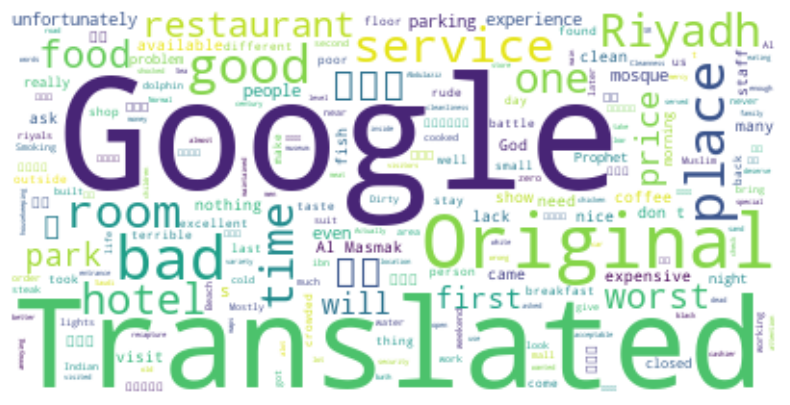

In [20]:
create_wordcloud(review_neg_eng,'content')

## Working with Arabic Data

Using a model named Akhooli to work with Arabic data

In [21]:
tokenizer = AutoTokenizer.from_pretrained('akhooli/xlm-r-large-arabic-sent')
model = AutoModelForSequenceClassification.from_pretrained("akhooli/xlm-r-large-arabic-sent")

pytorch_model.bin: 100%|██████████| 2.24G/2.24G [00:30<00:00, 73.2MB/s]
Some weights of the model checkpoint at akhooli/xlm-r-large-arabic-sent were not used when initializing XLMRobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [22]:
# first we define a list of arabic and english punctiations that we want to get rid of in our text

punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ''' + string.punctuation

# Arabic stop words with nltk
stop_words = stopwords.words('arabic')

arabic_diacritics = re.compile("""
                             ّ    | # Shadda
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)

In [23]:
def preprocess(text):
    
    #remove punctuations
    translator = str.maketrans('', '', punctuations)
    text = text.translate(translator)
    
    # remove Tashkeel
    text = re.sub(arabic_diacritics, '', text)
    text = re.sub('[A-Za-z0-9]',' ',text)
    
    #remove longation (longation basically is a form of arabic diacritics ) 
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    #next creating a list of substrings
    text = ' '.join(word for word in text.split() if word not in stop_words)

    return text

In [24]:
labels = ['Neutral','Negative','Positive'] #we need to keep this ordered !!!

In [26]:
data_tweets_arabic['clean_content'] = data_tweets_arabic['content'].apply(preprocess)
data_tweets_arabic.head()

/var/folders/cq/zrrjq02s1hq2p31y3d6tbfm80000gn/T/ipykernel_13416/2173151071.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweets_arabic['clean_content'] = data_tweets_arabic['content'].apply(preprocess)


,id,content,date,language,tags,title,ratings,mapped_tags,review_count,clean_content
0,377380-203583770957,من الاماكن الهاديه الجميله الممتعه في التسوق تحس انك بالخبر,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c07bdfc8hb0r13sa7agg', 'sentiment': None}, {'value': 'c07bdfc8hb0r13sa7ah0', 'sentiment': None}]",Al Ahsa Mall by Arabian Centres,"{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Al Ahsa], [Retail, Al Ahsa]]",2,الاماكن الهاديه الجميله الممتعه التسوق تحس انك بالخبر
1,377380-203585579625,مساحة خضراء تتنفس فيها الهواء النقي .. المناظر الطبيعية ..الالعاب الترفيهية المناسبة للأطفال 😍😍 بحر الخليج,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c07bdncbb64t6si78ssg', 'sentiment': None}, {'value': 'c07bdofepd3oq1r123kg', 'sentiment': None}, {'value': 'c0rquskbb64sdb6ukkq0', 'sentiment': None}, {'value': 'c0rqv8sbb64sdb6ukks0', 'sentiment': None}, {'value': 'c07bdifepd3oq1r122rg', 'sentiment': None}]","King Abdullah Park, Sea front","{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Khobar], [Tourism Attractions/ Sites, Madinah], [Accommodation, Riyadh], [Tourism Attractions/ Sites, Riyadh], [Tourism Attractions/ Sites, Dammam]]",5,مساحه خضراء تتنفس الهواء النقي المناظر الطبيعيه الالعاب الترفيهيه المناسبه للاطفال 😍😍 بحر الخليج
3,377380-203589330972,جميل❤,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c9ga0skbb64rs4ni6s7g', 'sentiment': None}]",Waterfront Beach Royal Commission Yanbu,"{'normalized': 80, 'raw': 4}","[[Tourism Attractions/ Sites, Yanbu]]",1,جميل❤
4,377380-203586632060,جميييل,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c07bdncbb64t6si78ssg', 'sentiment': None}, {'value': 'c07bdifepd3oq1r122rg', 'sentiment': None}]",Dammam Corniche,"{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Khobar], [Tourism Attractions/ Sites, Dammam]]",2,جميييل
5,377380-203585120372,الموقع جميل لكن السياح الاجانب السيدات لايلتزمون بالستر !,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c9g8ijgcu1ielf8dr38g', 'sentiment': None}]",Wadi Lajab,"{'normalized': 40, 'raw': 2}","[[Tourism Attractions/ Sites, Jizan]]",1,الموقع جميل السياح الاجانب السيدات لايلتزمون بالستر


## Now we have clean content

In [30]:
def sentiment_prediction(df, text_column):
    labels = ['Neutral', 'Negative', 'Positive']

    def predict(text):
        inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
        with torch.no_grad():
            outputs = model(**inputs)
        probabilities = torch.nn.functional.softmax(outputs.logits, dim=-1)
        predicted_class_idx = torch.argmax(probabilities, dim=-1).item()
        sentiment_label = labels[predicted_class_idx]
        confidence = probabilities[0][predicted_class_idx].item()
        return sentiment_label, confidence

    # Apply prediction to each row in the DataFrame with progress bar
    tqdm.pandas(desc="Predicting Sentiments")
    df[['sentiment_label', 'confidence']] = df[text_column].progress_apply(lambda x: predict(x)).apply(pd.Series)

    return df

In [31]:
# Apply the function to your DataFrame
data_tweets_arabic = sentiment_prediction(data_tweets_arabic, 'clean_content')
data_tweets_arabic.head()

Predicting Sentiments: 100%|██████████| 7610/7610 [16:33<00:00,  7.66it/s]
/var/folders/cq/zrrjq02s1hq2p31y3d6tbfm80000gn/T/ipykernel_13416/3150496294.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['sentiment_label', 'confidence']] = df[text_column].progress_apply(lambda x: predict(x)).apply(pd.Series)
/var/folders/cq/zrrjq02s1hq2p31y3d6tbfm80000gn/T/ipykernel_13416/3150496294.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['sentiment_label', 'confidence']] = df[text_column].progress_appl

,id,content,date,language,tags,title,ratings,mapped_tags,review_count,clean_content,sentiment_label,confidence
0,377380-203583770957,من الاماكن الهاديه الجميله الممتعه في التسوق تحس انك بالخبر,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c07bdfc8hb0r13sa7agg', 'sentiment': None}, {'value': 'c07bdfc8hb0r13sa7ah0', 'sentiment': None}]",Al Ahsa Mall by Arabian Centres,"{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Al Ahsa], [Retail, Al Ahsa]]",2,الاماكن الهاديه الجميله الممتعه التسوق تحس انك بالخبر,Positive,0.869783
1,377380-203585579625,مساحة خضراء تتنفس فيها الهواء النقي .. المناظر الطبيعية ..الالعاب الترفيهية المناسبة للأطفال 😍😍 بحر الخليج,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c07bdncbb64t6si78ssg', 'sentiment': None}, {'value': 'c07bdofepd3oq1r123kg', 'sentiment': None}, {'value': 'c0rquskbb64sdb6ukkq0', 'sentiment': None}, {'value': 'c0rqv8sbb64sdb6ukks0', 'sentiment': None}, {'value': 'c07bdifepd3oq1r122rg', 'sentiment': None}]","King Abdullah Park, Sea front","{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Khobar], [Tourism Attractions/ Sites, Madinah], [Accommodation, Riyadh], [Tourism Attractions/ Sites, Riyadh], [Tourism Attractions/ Sites, Dammam]]",5,مساحه خضراء تتنفس الهواء النقي المناظر الطبيعيه الالعاب الترفيهيه المناسبه للاطفال 😍😍 بحر الخليج,Positive,0.813557
3,377380-203589330972,جميل❤,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c9ga0skbb64rs4ni6s7g', 'sentiment': None}]",Waterfront Beach Royal Commission Yanbu,"{'normalized': 80, 'raw': 4}","[[Tourism Attractions/ Sites, Yanbu]]",1,جميل❤,Positive,0.796950
4,377380-203586632060,جميييل,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c07bdncbb64t6si78ssg', 'sentiment': None}, {'value': 'c07bdifepd3oq1r122rg', 'sentiment': None}]",Dammam Corniche,"{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Khobar], [Tourism Attractions/ Sites, Dammam]]",2,جميييل,Positive,0.575323
5,377380-203585120372,الموقع جميل لكن السياح الاجانب السيدات لايلتزمون بالستر !,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c9g8ijgcu1ielf8dr38g', 'sentiment': None}]",Wadi Lajab,"{'normalized': 40, 'raw': 2}","[[Tourism Attractions/ Sites, Jizan]]",1,الموقع جميل السياح الاجانب السيدات لايلتزمون بالستر,Neutral,0.603316


We need to verify whether this model is able to correctly predict the sentiment

## Now try a transformer based model for Eng dataset

In [38]:
tokeniser_eng = RobertaTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")
model_eng = RobertaForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")

def sentiment_analysis_roberta(text):
    # Encode the text into tokens, attention masks, and input IDs
    encoded_input = tokeniser_eng(text, return_tensors='pt', truncation=True, max_length=512)

    # Perform inference
    with torch.no_grad():
        output = model_eng(**encoded_input)

    # Process the output logits
    scores = output.logits[0].softmax(0)
    
    # Map scores to sentiments
    labels = ['Negative', 'Neutral', 'Positive']
    sentiment = labels[torch.argmax(scores)]
    confidence = torch.max(scores).item()

    return sentiment, confidence

# Enable pandas progress_apply with tqdm
tqdm.pandas(desc="Sentiment Analysis Progress")



In [39]:
#Applying this to our english dataset
# Applying the function to the DataFrame
data_tweets_eng[['sentiment_BERT', 'confidence_BERT']] = data_tweets_eng['content'].progress_apply(sentiment_analysis_roberta).apply(pd.Series)
data_tweets_eng.head()

Sentiment Analysis Progress: 100%|██████████| 2390/2390 [01:56<00:00, 20.60it/s]
/var/folders/cq/zrrjq02s1hq2p31y3d6tbfm80000gn/T/ipykernel_13416/3224508698.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweets_eng[['sentiment_BERT', 'confidence_BERT']] = data_tweets_eng['content'].progress_apply(sentiment_analysis_roberta).apply(pd.Series)
/var/folders/cq/zrrjq02s1hq2p31y3d6tbfm80000gn/T/ipykernel_13416/3224508698.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweets_eng[['sentiment_BER

,id,content,date,language,tags,title,ratings,mapped_tags,review_count,sentiment_scores,compound_score,sentiment_category,sentiment_BERT,confidence_BERT
2,377380-203590496913,nice place,2021-04-11T06:45:00+00:00,eng,"[{'value': 'c0rlhqgcu1i938rekca0', 'sentiment': None}]",Green Mountain Resort,"{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Taif]]",1,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'compound': 0.4215}",0.4215,Positive,Positive,0.929095
46,377380-203587240478,Perfect place to visit,2021-04-11T06:47:00+00:00,eng,"[{'value': 'c9g9fck8hb0qun2qahug', 'sentiment': None}]",Catalina Seaplane Wreckage,"{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Tabuk]]",1,"{'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'compound': 0.5719}",0.5719,Positive,Positive,0.967140
48,377380-203584278574,"Very good, pleasant atmosphere. Good for daily walking, and good for family hangout.",2021-04-11T06:47:00+00:00,eng,"[{'value': 'c07bdncbb64t6si78ssg', 'sentiment': None}]",Prince Ibn Jalawy Park,"{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Khobar]]",1,"{'neg': 0.0, 'neu': 0.412, 'pos': 0.588, 'compound': 0.9164}",0.9164,Positive,Positive,0.984849
50,377380-173625676396,Wonderful room,2021-04-25T02:26:00+00:00,eng,"[{'value': 'c07bja4bb64t6si78uog', 'sentiment': None}]",AlRawda Almakyah Hotel,"{'normalized': 100, 'raw': 5}","[[Accommodation, Makkah]]",1,"{'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}",0.5719,Positive,Positive,0.965956
55,377380-203584858093,Good place for time pass for kids.,2021-04-11T06:47:00+00:00,eng,"[{'value': 'c07bdncbb64t6si78ssg', 'sentiment': None}, {'value': 'c07bdifepd3oq1r122rg', 'sentiment': None}]",Dolphin Village Dammam,"{'normalized': 80, 'raw': 4}","[[Tourism Attractions/ Sites, Khobar], [Tourism Attractions/ Sites, Dammam]]",2,"{'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'compound': 0.4404}",0.4404,Positive,Positive,0.854561


Checking where the 2 model's outputs dont match

In [40]:
mismatched_df = data_tweets_eng[data_tweets_eng['sentiment_category'] != data_tweets_eng['sentiment_BERT']]
mismatched_df.head()

,id,content,date,language,tags,title,ratings,mapped_tags,review_count,sentiment_scores,compound_score,sentiment_category,sentiment_BERT,confidence_BERT
117,377380-203587562376,UNFORGETTABLE EXPERIENCE!,2021-04-11T06:48:00+00:00,eng,"[{'value': 'c07bdofepd3oq1r123kg', 'sentiment': None}]",The Saudi National Museum - The Saudi National Museum,"{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Madinah]]",1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,Neutral,Negative,0.896816
188,377380-203589373533,👍👍,2021-04-11T06:50:00+00:00,eng,"[{'value': 'c9ga0skbb64rs4ni6s7g', 'sentiment': None}]",Alsubh Park,"{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Yanbu]]",1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,Neutral,Positive,0.642820
229,377380-203587817168,UNFORGETTABLE EXPERIENCE!,2021-04-11T06:50:00+00:00,eng,"[{'value': 'c07bdofepd3oq1r123kg', 'sentiment': None}]",The Saudi National Museum - The Saudi National Museum,"{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Madinah]]",1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,Neutral,Negative,0.896816
240,377380-203587725967,Give me your phone number i am from Pakistan My factory we are making socks and garments i want to contact with you +923217694441 my contact number,2021-04-11T06:51:00+00:00,eng,"[{'value': 'c07bdofepd3oq1r123kg', 'sentiment': None}, {'value': 'c0rle7c8hb0sd7naaag0', 'sentiment': None}]",Almaigliah Market,"{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Madinah], [Retail, Madinah]]",2,"{'neg': 0.0, 'neu': 0.849, 'pos': 0.151, 'compound': 0.2263}",0.2263,Positive,Neutral,0.861613
390,377380-203590614055,Wooooow.....good..only....,2021-04-11T06:54:00+00:00,eng,"[{'value': 'c9ga0skbb64rs4ni6s7g', 'sentiment': None}]",Yanbu Lake Park,"{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Yanbu]]",1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,Neutral,Positive,0.952098


## One way to tackle irrelevant reviews is by doing topic modelling

In [42]:
def string_to_dict(dict_string):
    try:
        # Convert string to dictionary
        return ast.literal_eval(dict_string)
    except ValueError:
        # Return None or some default value if conversion fails
        return None

In [44]:
import pandas as pd

# Assuming your DataFrame is named df
# Extract normalized ratings from the dictionary in the 'ratings' column
normalized_ratings = data_tweets['ratings'].apply(string_to_dict).dropna().apply(lambda x: x.get('normalized', None))
normalized_score = data_tweets['ratings'].apply(string_to_dict).dropna().apply(lambda x: x.get('raw', None))
# Get unique values of normalized ratings
unique_normalized_ratings = normalized_ratings.unique()
unique_normalized_score = normalized_score.unique()

# Print unique normalized ratings
print(unique_normalized_ratings)
print(unique_normalized_score)

[100  80  40  60  20  90  70  50  10]
[ 5.   4.   2.   3.   1.  10.   4.5  8.   3.5  2.5  0.5  6. ]


In [48]:
import pandas as pd
import ast  # for safe evaluation of strings as literals

# Assuming your DataFrame is named df
# Convert string representation of dictionary to actual dictionary
def convert_to_dict(rating_str):
    try:
        return ast.literal_eval(rating_str)
    except ValueError:
        return None

# Apply the conversion function
data_tweets['ratings_dict'] = data_tweets['ratings'].apply(convert_to_dict)

# Filter rows where normalized rating is 20
filtered_df = data_tweets[data_tweets['ratings_dict'].apply(lambda x: x.get('normalized') if x else None) == 20]

# Now filtered_df contains only the rows where the normalized rating is 20
filtered_df.head()

,id,content,date,language,tags,title,ratings,mapped_tags,review_count,ratings_dict
14,377380-172464779277,يمشي الحال,2021-04-15T08:27:00+00:00,ara,"[{'value': 'c07bbh0cu1iccnqmcq00', 'sentiment': None}]",فندق ريحانة الورود,"{'normalized': 20, 'raw': 1}","[[Accommodation, Abha]]",1,"{'normalized': 20, 'raw': 1}"
21,377380-172684170184,اسعار نار لماذا وين تشجيع السياحه؟؟,2021-04-17T11:57:00+00:00,ara,"[{'value': 'c07bdncbb64t6si78srg', 'sentiment': None}, {'value': 'c07bdifepd3oq1r122qg', 'sentiment': None}]",منتجع شاطئ الدانة | Dana Beach Resort,"{'normalized': 20, 'raw': 1}","[[Accommodation, Khobar], [Accommodation, Dammam]]",2,"{'normalized': 20, 'raw': 1}"
36,377380-173373844041,قديم جدا خدمات اقل من جيده مطعم متواضع لا انصح به ابدا,2021-04-21T05:08:00+00:00,ara,"[{'value': 'c07bdofepd3oq1r123jg', 'sentiment': None}]",Madinah Hilton,"{'normalized': 20, 'raw': 1}","[[Accommodation, Madinah]]",1,"{'normalized': 20, 'raw': 1}"
38,377380-173646111636,ما يعطون رز زياده ويحطون بهارات اندومي,2021-04-23T08:16:00+00:00,ara,"[{'value': 'c07bjunepd3oq1r125cg', 'sentiment': None}]",Hirrman Restaurant,"{'normalized': 20, 'raw': 1}","[[Food & Beverage, Taif]]",1,"{'normalized': 20, 'raw': 1}"
71,377380-174034517930,مغلق ويتم تغيير الفندق دون اشعار الضيف.إدارة فاشلة من الاخر,2021-04-28T18:49:00+00:00,ara,"[{'value': 'c07bja4bb64t6si78uog', 'sentiment': None}]",DoubleTree by Hilton Makkah Jabal Omar,"{'normalized': 20, 'raw': 1}","[[Accommodation, Makkah]]",1,"{'normalized': 20, 'raw': 1}"


## TO show corelatioon between Normalized score and Raw attributes

In [55]:
import pandas as pd

# Assuming your DataFrame is named df

# Extract normalized and raw ratings
data_tweets['normalized_ratings'] = data_tweets['ratings_dict'].apply(lambda x: x.get('normalized') if isinstance(x, dict) else None)
data_tweets['raw_ratings'] = data_tweets['ratings_dict'].apply(lambda x: x.get('raw') if isinstance(x, dict) else None)

# Calculate correlation
correlation = data_tweets['normalized_ratings'].corr(data_tweets['raw_ratings'])
print("Correlation coefficient:", correlation)


Correlation coefficient: 0.9898111999085134


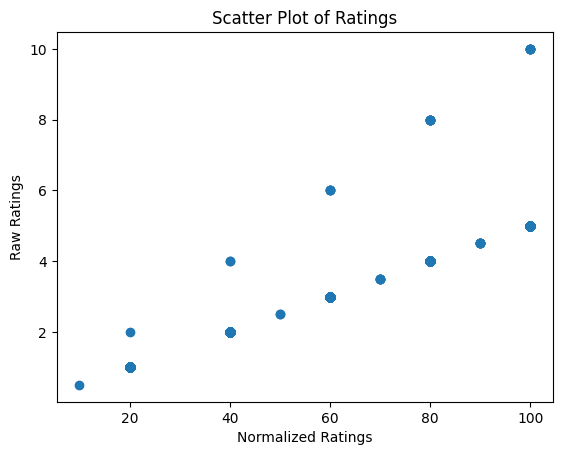

In [56]:
import matplotlib.pyplot as plt

plt.scatter(data_tweets['normalized_ratings'], data_tweets['raw_ratings'])
plt.xlabel('Normalized Ratings')
plt.ylabel('Raw Ratings')
plt.title('Scatter Plot of Ratings')
plt.show()


As you can see there is an increasing co relation, hence we can use either one to get an estimate of rating what user has given. Hence Moving forward , I selected normalized attribute / 20 to scale the rating from 1-5.

# Topic Modelling using BERT

In [58]:
import nltk
from nltk.corpus import stopwords
from gensim import corpora, models
import re
import emoji

nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

# Function to preprocess text
def preprocess(text):
    # Regular expression to match all emojis
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)  # Remove emojis

    # Tokenize and remove stop words
    return [word for word in nltk.word_tokenize(text.lower()) if word.isalpha() and word not in stop_words]

# Continue with the rest of your code...

# Assuming df_eng is your English DataFrame and 'review_text' is the column with text data
processed_docs = data_tweets_eng['content'].map(preprocess)

# Create a dictionary and corpus
dictionary = corpora.Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# LDA model
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Print the topics
topics = lda_model.print_topics(num_words=4)
for topic in topics:
    print(topic)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/deepeshdwivedi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/deepeshdwivedi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


(0, '0.037*"google" + 0.037*"original" + 0.037*"translated" + 0.016*"من"')
(1, '0.020*"place" + 0.013*"best" + 0.012*"riyadh" + 0.011*"beautiful"')
(2, '0.032*"good" + 0.026*"place" + 0.020*"nice" + 0.015*"hotel"')
(3, '0.023*"google" + 0.023*"translated" + 0.023*"original" + 0.023*"god"')
(4, '0.036*"google" + 0.036*"original" + 0.036*"translated" + 0.010*"من"')


In [62]:
# Assuming your DataFrame is named df and the column containing the review text is 'content'

# Define a function to check if the review contains any of the specified words
def contains_keywords(text):
    keywords = ['translated', 'original']
    return any(keyword in text.lower() for keyword in keywords)

# Apply the function to filter rows
filtered_reviews = data_tweets[data_tweets['content'].apply(contains_keywords)]

# Now filtered_reviews contains only the rows where the content has 'google', 'translated', or 'original'
filtered_reviews.head()

,id,content,date,language,tags,title,ratings,mapped_tags,review_count,ratings_dict,normalized_ratings,raw_ratings
1483,377380-172533523081,More(Translated by Google) Awesome organization And spirituality (Original) تنظيم راااااائع وروحانيات,2021-04-11T07:20:00+00:00,eng,"[{'value': 'c07bdofepd3oq1r123qg', 'sentiment': None}]",Dhul Hulaifah Miqat Mosque,"{'normalized': 100, 'raw': 5}","[[Religious, Madinah]]",1,"{'normalized': 100, 'raw': 5}",100.0,5.0
1521,377380-172533523170,More(Translated by Google) The staff at the mosque need to be kinder a (Original) الموظفين في المسجد يحتاجون ان يكونوا اكثر لطفا ا,2021-04-11T07:21:00+00:00,eng,"[{'value': 'c07bdofepd3oq1r123qg', 'sentiment': None}]",Dhul Hulaifah Miqat Mosque,"{'normalized': 80, 'raw': 4}","[[Religious, Madinah]]",1,"{'normalized': 80, 'raw': 4}",80.0,4.0
1561,377380-172533520265,More(Translated by Google) May God return it to us and to you and we are in complete health and wellness (Original) الله يعيده علينا وعليكم وحنا بأتم صحه وعافيه,2021-04-11T07:22:00+00:00,eng,"[{'value': 'c07bdofepd3oq1r123qg', 'sentiment': None}]",Dhul Hulaifah Miqat Mosque,"{'normalized': 100, 'raw': 5}","[[Religious, Madinah]]",1,"{'normalized': 100, 'raw': 5}",100.0,5.0
2554,377380-172697746022,More(Translated by Google) The place is nice and spacious .. the sessions are wide ... the food is delicious .. the service is quick and the deal is ok ... it is worth a visit. (Original) المكان جميل ووسيع .. الجلسات وسيعة ... الاكل لذيذ .. الخدمة سريعة والتعامل طيب ... يستحق الزيارة .,2021-04-11T07:46:00+00:00,eng,"[{'value': 'c07bdncbb64t6si78ss0', 'sentiment': None}]",Taya Restaurant Khobar,"{'normalized': 80, 'raw': 4}","[[Food & Beverage, Khobar]]",1,"{'normalized': 80, 'raw': 4}",80.0,4.0
2583,377380-172697749038,"More(Translated by Google) A restaurant located in Al-Khobar Governorate, in the Eastern Province, on King Abdulaziz Street. It offers types of oriental, Indian and marine foods characterized by delicious and fresh taste. But the price is very high (Original) مطعم يقع في محافظة الخبر بالمنطقة الشرقية في شارع الملك عبدالعزيز. يقدم أنواع من الاطعمه الشرقية والهندية والبحرية يتميز بالطعم اللذيذ والطازج. ولاكن اسعارةأسعاره مرتفعة جداً",2021-04-11T07:47:00+00:00,ara,"[{'value': 'c07bdncbb64t6si78ss0', 'sentiment': None}]",Taya Restaurant Khobar,"{'normalized': 40, 'raw': 2}","[[Food & Beverage, Khobar]]",1,"{'normalized': 40, 'raw': 2}",40.0,2.0


In [63]:
filtered_reviews.value_counts

<bound method DataFrame.value_counts of                        id  \
1483  377380-172533523081   
1521  377380-172533523170   
1561  377380-172533520265   
2554  377380-172697746022   
2583  377380-172697749038   
...                   ...   
9989  377380-167882965007   
9990  377380-170023468213   
9991  377380-170059060916   
9995  377380-170059072985   
9996  377380-168116614508   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

## Keeping the translated part

In [65]:
def extract_translated(text):
    parts = text.split("(Original)")
    return parts[0].replace("More(Translated by Google)", "").strip() if len(parts) > 1 else text

# Apply the function to your DataFrame
filtered_reviews['content_translated'] = filtered_reviews['content'].apply(extract_translated)
filtered_reviews.head()

/var/folders/cq/zrrjq02s1hq2p31y3d6tbfm80000gn/T/ipykernel_13416/1166279267.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_reviews['content_translated'] = filtered_reviews['content'].apply(extract_translated)


,id,content,date,language,tags,title,ratings,mapped_tags,review_count,ratings_dict,normalized_ratings,raw_ratings,content_translated
1483,377380-172533523081,More(Translated by Google) Awesome organization And spirituality (Original) تنظيم راااااائع وروحانيات,2021-04-11T07:20:00+00:00,eng,"[{'value': 'c07bdofepd3oq1r123qg', 'sentiment': None}]",Dhul Hulaifah Miqat Mosque,"{'normalized': 100, 'raw': 5}","[[Religious, Madinah]]",1,"{'normalized': 100, 'raw': 5}",100.0,5.0,Awesome organization And spirituality
1521,377380-172533523170,More(Translated by Google) The staff at the mosque need to be kinder a (Original) الموظفين في المسجد يحتاجون ان يكونوا اكثر لطفا ا,2021-04-11T07:21:00+00:00,eng,"[{'value': 'c07bdofepd3oq1r123qg', 'sentiment': None}]",Dhul Hulaifah Miqat Mosque,"{'normalized': 80, 'raw': 4}","[[Religious, Madinah]]",1,"{'normalized': 80, 'raw': 4}",80.0,4.0,The staff at the mosque need to be kinder a
1561,377380-172533520265,More(Translated by Google) May God return it to us and to you and we are in complete health and wellness (Original) الله يعيده علينا وعليكم وحنا بأتم صحه وعافيه,2021-04-11T07:22:00+00:00,eng,"[{'value': 'c07bdofepd3oq1r123qg', 'sentiment': None}]",Dhul Hulaifah Miqat Mosque,"{'normalized': 100, 'raw': 5}","[[Religious, Madinah]]",1,"{'normalized': 100, 'raw': 5}",100.0,5.0,May God return it to us and to you and we are in complete health and wellness
2554,377380-172697746022,More(Translated by Google) The place is nice and spacious .. the sessions are wide ... the food is delicious .. the service is quick and the deal is ok ... it is worth a visit. (Original) المكان جميل ووسيع .. الجلسات وسيعة ... الاكل لذيذ .. الخدمة سريعة والتعامل طيب ... يستحق الزيارة .,2021-04-11T07:46:00+00:00,eng,"[{'value': 'c07bdncbb64t6si78ss0', 'sentiment': None}]",Taya Restaurant Khobar,"{'normalized': 80, 'raw': 4}","[[Food & Beverage, Khobar]]",1,"{'normalized': 80, 'raw': 4}",80.0,4.0,The place is nice and spacious .. the sessions are wide ... the food is delicious .. the service is quick and the deal is ok ... it is worth a visit.
2583,377380-172697749038,"More(Translated by Google) A restaurant located in Al-Khobar Governorate, in the Eastern Province, on King Abdulaziz Street. It offers types of oriental, Indian and marine foods characterized by delicious and fresh taste. But the price is very high (Original) مطعم يقع في محافظة الخبر بالمنطقة الشرقية في شارع الملك عبدالعزيز. يقدم أنواع من الاطعمه الشرقية والهندية والبحرية يتميز بالطعم اللذيذ والطازج. ولاكن اسعارةأسعاره مرتفعة جداً",2021-04-11T07:47:00+00:00,ara,"[{'value': 'c07bdncbb64t6si78ss0', 'sentiment': None}]",Taya Restaurant Khobar,"{'normalized': 40, 'raw': 2}","[[Food & Beverage, Khobar]]",1,"{'normalized': 40, 'raw': 2}",40.0,2.0,"A restaurant located in Al-Khobar Governorate, in the Eastern Province, on King Abdulaziz Street. It offers types of oriental, Indian and marine foods characterized by delicious and fresh taste. But the price is very high"


In [96]:
data_tweets_eng['content_translated'] = data_tweets_eng['content'].apply(extract_translated)
data_tweets_eng.head()


/var/folders/cq/zrrjq02s1hq2p31y3d6tbfm80000gn/T/ipykernel_13416/4026377310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweets_eng['content_translated'] = data_tweets_eng['content'].apply(extract_translated)


,id,content,date,language,tags,title,ratings,mapped_tags,review_count,sentiment_scores,compound_score,sentiment_category,sentiment_BERT,confidence_BERT,is_outlier,contains_emoji,content_translated
2,377380-203590496913,nice place,2021-04-11T06:45:00+00:00,eng,"[{'value': 'c0rlhqgcu1i938rekca0', 'sentiment': None}]",Green Mountain Resort,"{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Taif]]",1,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'compound': 0.4215}",0.4215,Positive,Positive,0.929095,False,False,nice place
46,377380-203587240478,Perfect place to visit,2021-04-11T06:47:00+00:00,eng,"[{'value': 'c9g9fck8hb0qun2qahug', 'sentiment': None}]",Catalina Seaplane Wreckage,"{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Tabuk]]",1,"{'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'compound': 0.5719}",0.5719,Positive,Positive,0.967140,False,False,Perfect place to visit
48,377380-203584278574,"Very good, pleasant atmosphere. Good for daily walking, and good for family hangout.",2021-04-11T06:47:00+00:00,eng,"[{'value': 'c07bdncbb64t6si78ssg', 'sentiment': None}]",Prince Ibn Jalawy Park,"{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Khobar]]",1,"{'neg': 0.0, 'neu': 0.412, 'pos': 0.588, 'compound': 0.9164}",0.9164,Positive,Positive,0.984849,False,False,"Very good, pleasant atmosphere. Good for daily walking, and good for family hangout."
50,377380-173625676396,Wonderful room,2021-04-25T02:26:00+00:00,eng,"[{'value': 'c07bja4bb64t6si78uog', 'sentiment': None}]",AlRawda Almakyah Hotel,"{'normalized': 100, 'raw': 5}","[[Accommodation, Makkah]]",1,"{'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}",0.5719,Positive,Positive,0.965956,False,False,Wonderful room
55,377380-203584858093,Good place for time pass for kids.,2021-04-11T06:47:00+00:00,eng,"[{'value': 'c07bdncbb64t6si78ssg', 'sentiment': None}, {'value': 'c07bdifepd3oq1r122rg', 'sentiment': None}]",Dolphin Village Dammam,"{'normalized': 80, 'raw': 4}","[[Tourism Attractions/ Sites, Khobar], [Tourism Attractions/ Sites, Dammam]]",2,"{'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'compound': 0.4404}",0.4404,Positive,Positive,0.854561,False,False,Good place for time pass for kids.


In [101]:
data_tweets_eng.to_csv('english_tweets.csv',index=False)

## Translateing Arabic text for more insights

In [67]:
from googletrans import Translator
import pandas as pd

translator = Translator()

# Function to translate Arabic to English
def translate_arabic_to_english(text):
    try:
        translated = translator.translate(text, src='ar', dest='en')
        return translated.text
    except Exception as e:
        print(f"Error: {e}")
        return text

# Assuming your DataFrame is named df and the column you want to translate is 'content'
# Apply the translation to the entire column
text = 'مطعم يقع في محافظة الخبر بالمنطقة الشرقية في شارع الملك عبدالعزيز. يقدم أنواع من الاطعمه الشرقية والهندية والبحرية يتميز بالطعم اللذيذ والطازج. ولاكن اسعارةأسعاره مرتفعة جد'
print(translate_arabic_to_english(text))
#data_tweets_arabic['content_translated'] = data_tweets_arabic['content'].apply(translate_arabic_to_english)

# Check the translated content



A restaurant is located in Al -Khobar Governorate in the Eastern Region in King Abdulaziz Street.It offers types of eastern, Indian and marine foods characterized by delicious and fresh taste.But the price of its prices is very high


In [68]:
from googletrans import Translator
import pandas as pd
from tqdm.auto import tqdm

translator = Translator()

# Function to translate Arabic to English
def translate_arabic_to_english(text):
    try:
        translated = translator.translate(text, src='ar', dest='en')
        return translated.text
    except Exception as e:
        print(f"Error: {e}")
        return text

# Apply the translation to the entire column with tqdm
tqdm.pandas(desc="Translating Arabic to English")
data_tweets_arabic['content_translated'] = data_tweets_arabic['content'].progress_apply(translate_arabic_to_english)

Translating Arabic to English:   5%|▌         | 396/7610 [00:49<16:52,  7.13it/s]  

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   5%|▌         | 400/7610 [00:50<19:31,  6.16it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   5%|▌         | 401/7610 [00:50<27:47,  4.32it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   5%|▌         | 402/7610 [00:50<30:21,  3.96it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   5%|▌         | 405/7610 [00:51<26:47,  4.48it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   5%|▌         | 407/7610 [00:52<30:45,  3.90it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   5%|▌         | 410/7610 [00:52<28:09,  4.26it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   5%|▌         | 413/7610 [00:53<23:08,  5.18it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   6%|▌         | 419/7610 [00:54<27:41,  4.33it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   6%|▌         | 429/7610 [00:56<19:51,  6.03it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   6%|▌         | 435/7610 [00:56<18:51,  6.34it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   6%|▌         | 437/7610 [00:57<21:14,  5.63it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   6%|▌         | 440/7610 [00:58<23:23,  5.11it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   6%|▌         | 441/7610 [00:58<32:23,  3.69it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   6%|▌         | 445/7610 [00:59<25:11,  4.74it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   6%|▌         | 446/7610 [00:59<28:23,  4.21it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   6%|▌         | 449/7610 [01:00<23:46,  5.02it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   6%|▌         | 451/7610 [01:00<32:31,  3.67it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   6%|▌         | 452/7610 [01:01<37:16,  3.20it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   6%|▌         | 453/7610 [01:01<41:44,  2.86it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   6%|▌         | 456/7610 [01:02<32:09,  3.71it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   6%|▌         | 460/7610 [01:03<23:29,  5.07it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   6%|▌         | 463/7610 [01:03<21:46,  5.47it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   6%|▌         | 466/7610 [01:04<25:37,  4.65it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   6%|▌         | 468/7610 [01:05<28:15,  4.21it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   6%|▌         | 470/7610 [01:05<27:31,  4.32it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   6%|▌         | 472/7610 [01:06<27:29,  4.33it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   6%|▌         | 474/7610 [01:06<31:16,  3.80it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   6%|▋         | 478/7610 [01:07<26:22,  4.51it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   6%|▋         | 479/7610 [01:07<33:22,  3.56it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   6%|▋         | 480/7610 [01:08<38:17,  3.10it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   6%|▋         | 481/7610 [01:08<42:25,  2.80it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   6%|▋         | 482/7610 [01:09<50:40,  2.34it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   6%|▋         | 483/7610 [01:09<52:30,  2.26it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   6%|▋         | 484/7610 [01:10<53:42,  2.21it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   6%|▋         | 485/7610 [01:10<51:11,  2.32it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   6%|▋         | 486/7610 [01:11<50:20,  2.36it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   6%|▋         | 487/7610 [01:11<46:25,  2.56it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   6%|▋         | 488/7610 [01:12<51:47,  2.29it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   6%|▋         | 489/7610 [01:12<51:53,  2.29it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   6%|▋         | 490/7610 [01:12<47:06,  2.52it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   6%|▋         | 491/7610 [01:13<49:56,  2.38it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   6%|▋         | 492/7610 [01:13<51:46,  2.29it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   6%|▋         | 493/7610 [01:14<49:50,  2.38it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   6%|▋         | 494/7610 [01:14<52:13,  2.27it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 495/7610 [01:14<48:17,  2.46it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 496/7610 [01:15<47:58,  2.47it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 497/7610 [01:15<52:13,  2.27it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 498/7610 [01:16<48:51,  2.43it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 499/7610 [01:16<44:57,  2.64it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 500/7610 [01:16<47:21,  2.50it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 501/7610 [01:17<49:48,  2.38it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 502/7610 [01:17<54:00,  2.19it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 503/7610 [01:18<48:55,  2.42it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 504/7610 [01:18<53:28,  2.21it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 505/7610 [01:19<59:19,  2.00it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 506/7610 [01:19<52:43,  2.25it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 507/7610 [01:20<51:48,  2.28it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 508/7610 [01:20<56:04,  2.11it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 509/7610 [01:21<59:05,  2.00it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 510/7610 [01:21<1:03:09,  1.87it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 511/7610 [01:22<1:02:27,  1.89it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 512/7610 [01:22<1:03:34,  1.86it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 513/7610 [01:23<1:00:44,  1.95it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 514/7610 [01:23<57:10,  2.07it/s]  

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 515/7610 [01:24<54:36,  2.17it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 516/7610 [01:24<56:48,  2.08it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 517/7610 [01:25<56:48,  2.08it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 518/7610 [01:25<1:00:48,  1.94it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 519/7610 [01:26<1:00:26,  1.96it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 520/7610 [01:26<54:48,  2.16it/s]  

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 521/7610 [01:27<50:34,  2.34it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 522/7610 [01:27<52:06,  2.27it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 523/7610 [01:28<54:38,  2.16it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 524/7610 [01:28<52:50,  2.24it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 525/7610 [01:28<50:47,  2.32it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 526/7610 [01:29<56:23,  2.09it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 527/7610 [01:29<55:39,  2.12it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 528/7610 [01:30<53:18,  2.21it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 529/7610 [01:30<54:55,  2.15it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 530/7610 [01:31<56:21,  2.09it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 531/7610 [01:31<58:50,  2.00it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 532/7610 [01:32<59:14,  1.99it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 533/7610 [01:32<1:02:35,  1.88it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 534/7610 [01:33<1:01:41,  1.91it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 535/7610 [01:34<1:03:50,  1.85it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 536/7610 [01:34<1:03:28,  1.86it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 537/7610 [01:35<1:02:51,  1.88it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 538/7610 [01:35<1:01:20,  1.92it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 539/7610 [01:36<58:44,  2.01it/s]  

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 540/7610 [01:36<51:34,  2.28it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 541/7610 [01:36<49:49,  2.36it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 542/7610 [01:37<47:12,  2.50it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 543/7610 [01:37<52:00,  2.26it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 544/7610 [01:38<52:38,  2.24it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 545/7610 [01:38<54:09,  2.17it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 546/7610 [01:39<57:07,  2.06it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 547/7610 [01:39<50:11,  2.35it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 548/7610 [01:39<50:14,  2.34it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 549/7610 [01:40<46:45,  2.52it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 550/7610 [01:40<46:27,  2.53it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 551/7610 [01:41<49:10,  2.39it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 552/7610 [01:41<50:27,  2.33it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 553/7610 [01:41<46:17,  2.54it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 554/7610 [01:42<53:57,  2.18it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 555/7610 [01:43<59:22,  1.98it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 556/7610 [01:43<59:29,  1.98it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 557/7610 [01:44<59:45,  1.97it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 558/7610 [01:44<56:22,  2.08it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 559/7610 [01:44<52:40,  2.23it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 560/7610 [01:45<56:06,  2.09it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 561/7610 [01:45<51:22,  2.29it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 562/7610 [01:46<55:01,  2.13it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 563/7610 [01:46<52:20,  2.24it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 564/7610 [01:47<56:28,  2.08it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 565/7610 [01:47<57:26,  2.04it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 566/7610 [01:48<50:19,  2.33it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 567/7610 [01:48<57:55,  2.03it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 568/7610 [01:49<56:24,  2.08it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 569/7610 [01:49<55:59,  2.10it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   7%|▋         | 570/7610 [01:49<50:49,  2.31it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   8%|▊         | 571/7610 [01:50<47:37,  2.46it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   8%|▊         | 572/7610 [01:50<48:02,  2.44it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   8%|▊         | 573/7610 [01:51<53:59,  2.17it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   8%|▊         | 574/7610 [01:51<52:44,  2.22it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   8%|▊         | 575/7610 [01:52<52:40,  2.23it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   8%|▊         | 576/7610 [01:52<50:21,  2.33it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   8%|▊         | 577/7610 [01:52<52:25,  2.24it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   8%|▊         | 578/7610 [01:53<53:24,  2.19it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   8%|▊         | 579/7610 [01:54<58:50,  1.99it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   8%|▊         | 580/7610 [01:54<58:04,  2.02it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   8%|▊         | 581/7610 [01:55<59:51,  1.96it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   8%|▊         | 582/7610 [01:55<1:03:12,  1.85it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   8%|▊         | 583/7610 [01:56<1:05:51,  1.78it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   8%|▊         | 584/7610 [01:56<1:00:40,  1.93it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   8%|▊         | 585/7610 [01:57<1:00:23,  1.94it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   8%|▊         | 586/7610 [01:57<56:41,  2.07it/s]  

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   8%|▊         | 587/7610 [01:58<1:01:08,  1.91it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   8%|▊         | 588/7610 [01:58<55:55,  2.09it/s]  

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   8%|▊         | 589/7610 [01:59<57:54,  2.02it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   8%|▊         | 590/7610 [01:59<59:21,  1.97it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   8%|▊         | 591/7610 [02:00<59:04,  1.98it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   8%|▊         | 592/7610 [02:00<59:46,  1.96it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   8%|▊         | 593/7610 [02:01<1:02:57,  1.86it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   8%|▊         | 594/7610 [02:01<59:05,  1.98it/s]  

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   8%|▊         | 595/7610 [02:02<58:45,  1.99it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   8%|▊         | 596/7610 [02:02<55:19,  2.11it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   8%|▊         | 597/7610 [02:03<56:44,  2.06it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   8%|▊         | 598/7610 [02:03<57:37,  2.03it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   8%|▊         | 599/7610 [02:04<1:02:00,  1.88it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   8%|▊         | 600/7610 [02:04<1:02:36,  1.87it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   8%|▊         | 601/7610 [02:05<1:00:51,  1.92it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   8%|▊         | 602/7610 [02:05<54:53,  2.13it/s]  

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   8%|▊         | 603/7610 [02:06<58:31,  2.00it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   8%|▊         | 604/7610 [02:06<52:59,  2.20it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   8%|▊         | 605/7610 [02:06<49:01,  2.38it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   8%|▊         | 606/7610 [02:07<46:02,  2.53it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   8%|▊         | 607/7610 [02:07<43:14,  2.70it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   8%|▊         | 609/7610 [02:08<35:11,  3.32it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   8%|▊         | 610/7610 [02:08<40:41,  2.87it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   8%|▊         | 611/7610 [02:09<47:08,  2.47it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   8%|▊         | 613/7610 [02:09<36:29,  3.20it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   8%|▊         | 615/7610 [02:10<37:45,  3.09it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   8%|▊         | 616/7610 [02:10<38:06,  3.06it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   8%|▊         | 618/7610 [02:11<37:19,  3.12it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   8%|▊         | 622/7610 [02:11<26:37,  4.37it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   8%|▊         | 624/7610 [02:12<29:58,  3.89it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   8%|▊         | 625/7610 [02:13<35:27,  3.28it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   8%|▊         | 626/7610 [02:13<35:56,  3.24it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   8%|▊         | 628/7610 [02:13<36:12,  3.21it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   8%|▊         | 629/7610 [02:14<42:37,  2.73it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   8%|▊         | 632/7610 [02:15<30:43,  3.78it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   8%|▊         | 633/7610 [02:15<34:46,  3.34it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   8%|▊         | 635/7610 [02:16<34:57,  3.33it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   8%|▊         | 637/7610 [02:16<36:58,  3.14it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   8%|▊         | 639/7610 [02:17<35:59,  3.23it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   8%|▊         | 640/7610 [02:17<36:44,  3.16it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   8%|▊         | 641/7610 [02:18<41:03,  2.83it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   8%|▊         | 643/7610 [02:18<35:33,  3.27it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   9%|▊         | 649/7610 [02:19<19:57,  5.81it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   9%|▊         | 652/7610 [02:20<26:48,  4.33it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   9%|▊         | 665/7610 [02:22<17:45,  6.52it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   9%|▉         | 667/7610 [02:22<23:50,  4.85it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   9%|▉         | 671/7610 [02:23<23:15,  4.97it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   9%|▉         | 673/7610 [02:24<27:13,  4.25it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   9%|▉         | 687/7610 [02:25<17:24,  6.63it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:   9%|▉         | 709/7610 [02:28<16:36,  6.93it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  10%|▉         | 729/7610 [02:30<16:14,  7.06it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  10%|▉         | 733/7610 [02:31<18:29,  6.20it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  10%|▉         | 737/7610 [02:32<19:38,  5.83it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  10%|▉         | 746/7610 [02:33<20:34,  5.56it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  10%|▉         | 752/7610 [02:34<22:13,  5.14it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  10%|▉         | 754/7610 [02:34<23:06,  4.94it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  10%|▉         | 758/7610 [02:35<20:49,  5.48it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  10%|█         | 764/7610 [02:36<16:14,  7.03it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  10%|█         | 765/7610 [02:36<26:19,  4.33it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  10%|█         | 767/7610 [02:37<26:59,  4.22it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  10%|█         | 769/7610 [02:38<29:09,  3.91it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  10%|█         | 772/7610 [02:38<22:37,  5.04it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  10%|█         | 782/7610 [02:39<17:03,  6.67it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  10%|█         | 789/7610 [02:40<19:46,  5.75it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  11%|█         | 810/7610 [02:43<19:15,  5.89it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  11%|█         | 818/7610 [02:44<15:32,  7.28it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  11%|█         | 823/7610 [02:45<19:32,  5.79it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  11%|█         | 844/7610 [02:47<14:31,  7.76it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  11%|█▏        | 859/7610 [02:49<15:56,  7.05it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  11%|█▏        | 863/7610 [02:50<20:06,  5.59it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  11%|█▏        | 869/7610 [02:51<15:53,  7.07it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  11%|█▏        | 871/7610 [02:51<13:32,  8.30it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  11%|█▏        | 875/7610 [02:52<23:08,  4.85it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  12%|█▏        | 911/7610 [02:55<11:52,  9.40it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  12%|█▏        | 913/7610 [02:56<17:28,  6.39it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  12%|█▏        | 916/7610 [02:57<18:41,  5.97it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  12%|█▏        | 917/7610 [02:57<27:42,  4.03it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  12%|█▏        | 918/7610 [02:58<33:39,  3.31it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  12%|█▏        | 920/7610 [02:58<34:22,  3.24it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  12%|█▏        | 924/7610 [02:59<24:56,  4.47it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  12%|█▏        | 930/7610 [03:00<19:22,  5.75it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  12%|█▏        | 934/7610 [03:01<18:01,  6.17it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  12%|█▏        | 936/7610 [03:01<21:58,  5.06it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  12%|█▏        | 937/7610 [03:02<29:46,  3.73it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  12%|█▏        | 939/7610 [03:02<29:29,  3.77it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  12%|█▏        | 940/7610 [03:03<34:53,  3.19it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  12%|█▏        | 943/7610 [03:04<29:14,  3.80it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  12%|█▏        | 948/7610 [03:05<31:18,  3.55it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  12%|█▏        | 950/7610 [03:05<31:51,  3.48it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  13%|█▎        | 952/7610 [03:06<33:53,  3.27it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  13%|█▎        | 954/7610 [03:06<32:04,  3.46it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  13%|█▎        | 956/7610 [03:07<37:08,  2.99it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  13%|█▎        | 958/7610 [03:08<35:49,  3.09it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  13%|█▎        | 959/7610 [03:08<40:43,  2.72it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  13%|█▎        | 961/7610 [03:09<39:35,  2.80it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  13%|█▎        | 964/7610 [03:10<39:24,  2.81it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  13%|█▎        | 965/7610 [03:11<53:38,  2.06it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  13%|█▎        | 966/7610 [03:12<55:49,  1.98it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  13%|█▎        | 969/7610 [03:12<36:33,  3.03it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  13%|█▎        | 971/7610 [03:13<42:41,  2.59it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  13%|█▎        | 974/7610 [03:14<32:40,  3.38it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  13%|█▎        | 975/7610 [03:14<38:23,  2.88it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  13%|█▎        | 978/7610 [03:15<34:04,  3.24it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  13%|█▎        | 980/7610 [03:16<42:36,  2.59it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  13%|█▎        | 981/7610 [03:17<46:28,  2.38it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  13%|█▎        | 982/7610 [03:17<49:34,  2.23it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  13%|█▎        | 983/7610 [03:18<53:47,  2.05it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  13%|█▎        | 984/7610 [03:18<51:33,  2.14it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  13%|█▎        | 985/7610 [03:19<50:35,  2.18it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  13%|█▎        | 986/7610 [03:19<47:04,  2.35it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  13%|█▎        | 987/7610 [03:20<52:33,  2.10it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  13%|█▎        | 988/7610 [03:20<57:53,  1.91it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  13%|█▎        | 989/7610 [03:21<53:53,  2.05it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  13%|█▎        | 990/7610 [03:21<51:21,  2.15it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  13%|█▎        | 991/7610 [03:22<52:20,  2.11it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  13%|█▎        | 992/7610 [03:22<47:43,  2.31it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  13%|█▎        | 993/7610 [03:22<47:01,  2.34it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  13%|█▎        | 994/7610 [03:23<46:20,  2.38it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  13%|█▎        | 995/7610 [03:23<47:07,  2.34it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  13%|█▎        | 997/7610 [03:24<35:08,  3.14it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  13%|█▎        | 998/7610 [03:24<42:51,  2.57it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  13%|█▎        | 999/7610 [03:25<43:23,  2.54it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  13%|█▎        | 1000/7610 [03:25<41:42,  2.64it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  13%|█▎        | 1001/7610 [03:25<39:33,  2.78it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  13%|█▎        | 1002/7610 [03:26<43:23,  2.54it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  13%|█▎        | 1003/7610 [03:26<47:09,  2.33it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  13%|█▎        | 1005/7610 [03:27<41:07,  2.68it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  13%|█▎        | 1006/7610 [03:27<44:08,  2.49it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  13%|█▎        | 1007/7610 [03:28<46:45,  2.35it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  13%|█▎        | 1008/7610 [03:28<44:18,  2.48it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  13%|█▎        | 1009/7610 [03:29<50:02,  2.20it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  13%|█▎        | 1010/7610 [03:29<48:20,  2.28it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  13%|█▎        | 1011/7610 [03:30<52:50,  2.08it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  13%|█▎        | 1012/7610 [03:30<53:59,  2.04it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  13%|█▎        | 1013/7610 [03:31<54:35,  2.01it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  13%|█▎        | 1014/7610 [03:31<49:02,  2.24it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  13%|█▎        | 1015/7610 [03:32<50:27,  2.18it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  13%|█▎        | 1016/7610 [03:32<55:42,  1.97it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  13%|█▎        | 1017/7610 [03:33<58:58,  1.86it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  13%|█▎        | 1018/7610 [03:33<57:16,  1.92it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  13%|█▎        | 1019/7610 [03:34<58:31,  1.88it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  13%|█▎        | 1020/7610 [03:34<51:49,  2.12it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  13%|█▎        | 1021/7610 [03:35<52:53,  2.08it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  13%|█▎        | 1022/7610 [03:35<48:52,  2.25it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  13%|█▎        | 1023/7610 [03:36<52:44,  2.08it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  13%|█▎        | 1024/7610 [03:36<53:50,  2.04it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  13%|█▎        | 1025/7610 [03:37<53:13,  2.06it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  13%|█▎        | 1026/7610 [03:37<51:15,  2.14it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  13%|█▎        | 1027/7610 [03:38<49:35,  2.21it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  14%|█▎        | 1028/7610 [03:38<46:10,  2.38it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  14%|█▎        | 1029/7610 [03:38<44:10,  2.48it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  14%|█▎        | 1030/7610 [03:39<45:43,  2.40it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  14%|█▎        | 1031/7610 [03:39<42:18,  2.59it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  14%|█▎        | 1032/7610 [03:39<44:18,  2.47it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  14%|█▎        | 1033/7610 [03:40<42:04,  2.61it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  14%|█▎        | 1034/7610 [03:40<46:32,  2.35it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  14%|█▎        | 1035/7610 [03:41<54:41,  2.00it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  14%|█▎        | 1036/7610 [03:41<52:18,  2.09it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  14%|█▎        | 1037/7610 [03:42<54:52,  2.00it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  14%|█▎        | 1038/7610 [03:42<54:06,  2.02it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  14%|█▎        | 1039/7610 [03:43<51:55,  2.11it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  14%|█▎        | 1040/7610 [03:43<48:50,  2.24it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  14%|█▎        | 1041/7610 [03:44<47:41,  2.30it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  14%|█▎        | 1042/7610 [03:44<50:12,  2.18it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  14%|█▎        | 1043/7610 [03:45<51:41,  2.12it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  14%|█▎        | 1044/7610 [03:45<49:50,  2.20it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  14%|█▎        | 1045/7610 [03:46<54:48,  2.00it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  14%|█▎        | 1046/7610 [03:46<55:10,  1.98it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  14%|█▍        | 1047/7610 [03:47<53:46,  2.03it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  14%|█▍        | 1048/7610 [03:47<56:02,  1.95it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  14%|█▍        | 1049/7610 [03:48<57:12,  1.91it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  14%|█▍        | 1050/7610 [03:48<50:10,  2.18it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  14%|█▍        | 1051/7610 [03:48<47:51,  2.28it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  14%|█▍        | 1052/7610 [03:49<47:34,  2.30it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  14%|█▍        | 1053/7610 [03:49<51:35,  2.12it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  14%|█▍        | 1054/7610 [03:50<50:25,  2.17it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  14%|█▍        | 1055/7610 [03:50<47:12,  2.31it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  14%|█▍        | 1056/7610 [03:51<44:26,  2.46it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  14%|█▍        | 1057/7610 [03:51<45:42,  2.39it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  14%|█▍        | 1058/7610 [03:52<50:12,  2.17it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  14%|█▍        | 1059/7610 [03:52<49:35,  2.20it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  14%|█▍        | 1060/7610 [03:53<53:40,  2.03it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  14%|█▍        | 1061/7610 [03:53<48:28,  2.25it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  14%|█▍        | 1062/7610 [03:53<47:44,  2.29it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  14%|█▍        | 1063/7610 [03:54<52:30,  2.08it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  14%|█▍        | 1064/7610 [03:54<50:46,  2.15it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  14%|█▍        | 1065/7610 [03:55<52:58,  2.06it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  14%|█▍        | 1066/7610 [03:56<59:59,  1.82it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  14%|█▍        | 1067/7610 [03:56<55:15,  1.97it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  14%|█▍        | 1068/7610 [03:57<55:50,  1.95it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  14%|█▍        | 1069/7610 [03:57<53:40,  2.03it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  14%|█▍        | 1070/7610 [03:58<54:01,  2.02it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  14%|█▍        | 1072/7610 [03:58<39:32,  2.76it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  14%|█▍        | 1073/7610 [03:58<40:39,  2.68it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  14%|█▍        | 1074/7610 [03:59<43:25,  2.51it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  14%|█▍        | 1075/7610 [03:59<47:31,  2.29it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  14%|█▍        | 1076/7610 [04:00<47:25,  2.30it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  14%|█▍        | 1077/7610 [04:00<50:21,  2.16it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  14%|█▍        | 1078/7610 [04:01<52:42,  2.07it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  14%|█▍        | 1079/7610 [04:01<54:01,  2.02it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  14%|█▍        | 1080/7610 [04:02<52:11,  2.09it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  14%|█▍        | 1081/7610 [04:02<52:14,  2.08it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  14%|█▍        | 1082/7610 [04:03<56:39,  1.92it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  14%|█▍        | 1083/7610 [04:03<53:16,  2.04it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  14%|█▍        | 1085/7610 [04:04<39:59,  2.72it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  14%|█▍        | 1086/7610 [04:04<45:23,  2.40it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  14%|█▍        | 1087/7610 [04:05<50:54,  2.14it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  14%|█▍        | 1088/7610 [04:05<52:53,  2.06it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  14%|█▍        | 1089/7610 [04:06<52:13,  2.08it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  14%|█▍        | 1090/7610 [04:06<53:32,  2.03it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  14%|█▍        | 1091/7610 [04:07<54:29,  1.99it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  14%|█▍        | 1092/7610 [04:07<51:06,  2.13it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  14%|█▍        | 1093/7610 [04:08<47:30,  2.29it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  14%|█▍        | 1094/7610 [04:08<47:47,  2.27it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  14%|█▍        | 1095/7610 [04:09<43:56,  2.47it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  14%|█▍        | 1099/7610 [04:09<26:19,  4.12it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  15%|█▍        | 1105/7610 [04:10<18:59,  5.71it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  15%|█▍        | 1106/7610 [04:11<27:42,  3.91it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  15%|█▍        | 1108/7610 [04:11<30:30,  3.55it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  15%|█▍        | 1109/7610 [04:12<40:32,  2.67it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  15%|█▍        | 1110/7610 [04:13<45:56,  2.36it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  15%|█▍        | 1112/7610 [04:13<35:07,  3.08it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  15%|█▍        | 1113/7610 [04:14<44:28,  2.43it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  15%|█▍        | 1114/7610 [04:14<46:19,  2.34it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  15%|█▍        | 1115/7610 [04:15<47:08,  2.30it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  15%|█▍        | 1117/7610 [04:15<43:11,  2.51it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  15%|█▍        | 1118/7610 [04:16<40:32,  2.67it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  15%|█▍        | 1119/7610 [04:16<44:01,  2.46it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  15%|█▍        | 1122/7610 [04:17<34:22,  3.15it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  15%|█▍        | 1123/7610 [04:17<38:26,  2.81it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  15%|█▍        | 1124/7610 [04:18<43:24,  2.49it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  15%|█▍        | 1125/7610 [04:18<49:44,  2.17it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  15%|█▍        | 1128/7610 [04:19<30:34,  3.53it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  15%|█▍        | 1139/7610 [04:20<17:26,  6.19it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  15%|█▌        | 1150/7610 [04:22<20:34,  5.23it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  15%|█▌        | 1154/7610 [04:23<18:12,  5.91it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  15%|█▌        | 1157/7610 [04:24<22:06,  4.86it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  15%|█▌        | 1158/7610 [04:24<26:57,  3.99it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  15%|█▌        | 1161/7610 [04:25<25:59,  4.13it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  15%|█▌        | 1166/7610 [04:26<21:57,  4.89it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  15%|█▌        | 1169/7610 [04:26<23:06,  4.64it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  15%|█▌        | 1173/7610 [04:27<18:18,  5.86it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  15%|█▌        | 1176/7610 [04:28<20:36,  5.20it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  16%|█▌        | 1184/7610 [04:29<16:51,  6.35it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  16%|█▌        | 1187/7610 [04:29<16:12,  6.60it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  16%|█▌        | 1191/7610 [04:30<20:13,  5.29it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  16%|█▌        | 1194/7610 [04:30<19:18,  5.54it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  16%|█▌        | 1199/7610 [04:31<16:22,  6.52it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  16%|█▌        | 1210/7610 [04:34<25:23,  4.20it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  16%|█▌        | 1212/7610 [04:34<27:16,  3.91it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  16%|█▌        | 1215/7610 [04:35<23:55,  4.45it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  16%|█▌        | 1217/7610 [04:36<27:43,  3.84it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  16%|█▌        | 1220/7610 [04:36<24:36,  4.33it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  16%|█▌        | 1223/7610 [04:37<24:23,  4.36it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  16%|█▌        | 1225/7610 [04:38<24:18,  4.38it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  16%|█▌        | 1228/7610 [04:38<24:42,  4.30it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  16%|█▌        | 1229/7610 [04:39<29:34,  3.60it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  16%|█▌        | 1230/7610 [04:39<34:22,  3.09it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  16%|█▌        | 1233/7610 [04:40<25:43,  4.13it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  16%|█▋        | 1237/7610 [04:41<26:56,  3.94it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  16%|█▋        | 1244/7610 [04:43<29:33,  3.59it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  16%|█▋        | 1246/7610 [04:44<34:16,  3.09it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  16%|█▋        | 1247/7610 [04:44<38:41,  2.74it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  17%|█▋        | 1265/7610 [04:46<15:22,  6.88it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  17%|█▋        | 1268/7610 [04:47<16:11,  6.53it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  17%|█▋        | 1287/7610 [04:49<14:45,  7.14it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  17%|█▋        | 1294/7610 [04:50<15:20,  6.87it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  17%|█▋        | 1300/7610 [04:51<15:07,  6.95it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  17%|█▋        | 1307/7610 [04:52<15:08,  6.94it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  17%|█▋        | 1311/7610 [04:52<18:32,  5.66it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  17%|█▋        | 1320/7610 [04:54<23:34,  4.45it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  17%|█▋        | 1322/7610 [04:54<26:58,  3.88it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  17%|█▋        | 1325/7610 [04:55<22:10,  4.72it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  17%|█▋        | 1329/7610 [04:56<17:30,  5.98it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  18%|█▊        | 1342/7610 [04:57<13:02,  8.01it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  18%|█▊        | 1346/7610 [04:58<19:16,  5.41it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  18%|█▊        | 1350/7610 [04:59<21:53,  4.77it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  18%|█▊        | 1358/7610 [05:00<16:30,  6.31it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  18%|█▊        | 1361/7610 [05:00<12:57,  8.04it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  18%|█▊        | 1365/7610 [05:01<18:04,  5.76it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  18%|█▊        | 1371/7610 [05:02<14:21,  7.24it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  18%|█▊        | 1379/7610 [05:03<09:52, 10.52it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  18%|█▊        | 1382/7610 [05:04<21:55,  4.73it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  18%|█▊        | 1386/7610 [05:05<21:35,  4.80it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  18%|█▊        | 1391/7610 [05:05<20:28,  5.06it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  18%|█▊        | 1392/7610 [05:06<28:25,  3.65it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  18%|█▊        | 1396/7610 [05:07<23:51,  4.34it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  18%|█▊        | 1398/7610 [05:07<26:25,  3.92it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  18%|█▊        | 1399/7610 [05:08<28:38,  3.62it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  18%|█▊        | 1402/7610 [05:08<24:38,  4.20it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  18%|█▊        | 1403/7610 [05:09<32:35,  3.17it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  18%|█▊        | 1405/7610 [05:10<31:18,  3.30it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  18%|█▊        | 1406/7610 [05:10<31:56,  3.24it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  18%|█▊        | 1407/7610 [05:11<38:34,  2.68it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  19%|█▊        | 1409/7610 [05:11<35:31,  2.91it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  19%|█▊        | 1413/7610 [05:13<51:05,  2.02it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  19%|█▊        | 1415/7610 [05:14<39:56,  2.59it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  19%|█▊        | 1418/7610 [05:14<29:22,  3.51it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  19%|█▊        | 1420/7610 [05:15<29:19,  3.52it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  19%|█▊        | 1423/7610 [05:16<23:46,  4.34it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  19%|█▊        | 1424/7610 [05:16<31:37,  3.26it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  19%|█▉        | 1428/7610 [05:17<23:12,  4.44it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  19%|█▉        | 1434/7610 [05:18<18:31,  5.56it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  19%|█▉        | 1437/7610 [05:18<19:15,  5.34it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  19%|█▉        | 1438/7610 [05:19<25:06,  4.10it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  19%|█▉        | 1439/7610 [05:19<29:16,  3.51it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  19%|█▉        | 1440/7610 [05:20<29:52,  3.44it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  19%|█▉        | 1443/7610 [05:20<24:04,  4.27it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  19%|█▉        | 1445/7610 [05:21<27:12,  3.78it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  19%|█▉        | 1446/7610 [05:22<34:17,  3.00it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  19%|█▉        | 1450/7610 [05:22<22:32,  4.56it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  19%|█▉        | 1452/7610 [05:23<21:14,  4.83it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  19%|█▉        | 1453/7610 [05:23<27:23,  3.75it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  19%|█▉        | 1455/7610 [05:23<25:22,  4.04it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  19%|█▉        | 1457/7610 [05:24<30:26,  3.37it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  19%|█▉        | 1458/7610 [05:25<35:49,  2.86it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  19%|█▉        | 1461/7610 [05:25<23:27,  4.37it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  19%|█▉        | 1462/7610 [05:26<30:26,  3.37it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  19%|█▉        | 1463/7610 [05:26<31:55,  3.21it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  19%|█▉        | 1464/7610 [05:26<32:40,  3.13it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  19%|█▉        | 1465/7610 [05:27<38:29,  2.66it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  19%|█▉        | 1468/7610 [05:28<27:49,  3.68it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  19%|█▉        | 1469/7610 [05:28<34:19,  2.98it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  19%|█▉        | 1470/7610 [05:29<36:47,  2.78it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  19%|█▉        | 1472/7610 [05:29<34:47,  2.94it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  19%|█▉        | 1473/7610 [05:30<40:32,  2.52it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  19%|█▉        | 1474/7610 [05:30<43:49,  2.33it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  19%|█▉        | 1475/7610 [05:31<46:05,  2.22it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  19%|█▉        | 1476/7610 [05:31<47:11,  2.17it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  19%|█▉        | 1477/7610 [05:32<48:45,  2.10it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  19%|█▉        | 1478/7610 [05:32<48:51,  2.09it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  19%|█▉        | 1479/7610 [05:33<50:46,  2.01it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  19%|█▉        | 1480/7610 [05:33<50:07,  2.04it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  19%|█▉        | 1481/7610 [05:34<46:58,  2.17it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  19%|█▉        | 1483/7610 [05:34<34:54,  2.93it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|█▉        | 1484/7610 [05:35<37:59,  2.69it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|█▉        | 1485/7610 [05:35<42:49,  2.38it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|█▉        | 1486/7610 [05:35<39:40,  2.57it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|█▉        | 1487/7610 [05:36<39:16,  2.60it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|█▉        | 1489/7610 [05:36<31:40,  3.22it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|█▉        | 1490/7610 [05:37<38:34,  2.64it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|█▉        | 1491/7610 [05:37<40:08,  2.54it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|█▉        | 1492/7610 [05:38<44:51,  2.27it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|█▉        | 1493/7610 [05:38<47:11,  2.16it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|█▉        | 1494/7610 [05:39<49:11,  2.07it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|█▉        | 1495/7610 [05:39<48:27,  2.10it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|█▉        | 1496/7610 [05:40<51:03,  2.00it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|█▉        | 1497/7610 [05:40<47:30,  2.14it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|█▉        | 1498/7610 [05:41<48:42,  2.09it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|█▉        | 1499/7610 [05:41<43:34,  2.34it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|█▉        | 1500/7610 [05:42<46:27,  2.19it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|█▉        | 1501/7610 [05:42<48:45,  2.09it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|█▉        | 1502/7610 [05:42<43:02,  2.36it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|█▉        | 1503/7610 [05:43<42:03,  2.42it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|█▉        | 1504/7610 [05:43<46:51,  2.17it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|█▉        | 1505/7610 [05:44<42:13,  2.41it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|█▉        | 1506/7610 [05:44<47:23,  2.15it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|█▉        | 1507/7610 [05:45<51:57,  1.96it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|█▉        | 1508/7610 [05:45<51:41,  1.97it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|█▉        | 1509/7610 [05:46<52:05,  1.95it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|█▉        | 1510/7610 [05:46<51:19,  1.98it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|█▉        | 1511/7610 [05:47<45:45,  2.22it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|█▉        | 1512/7610 [05:47<44:35,  2.28it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|█▉        | 1513/7610 [05:47<40:14,  2.52it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|█▉        | 1514/7610 [05:48<42:16,  2.40it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|█▉        | 1515/7610 [05:48<43:22,  2.34it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|█▉        | 1516/7610 [05:49<46:36,  2.18it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|█▉        | 1517/7610 [05:49<48:07,  2.11it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|█▉        | 1518/7610 [05:50<45:14,  2.24it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|█▉        | 1519/7610 [05:50<49:20,  2.06it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|█▉        | 1520/7610 [05:51<50:46,  2.00it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|█▉        | 1521/7610 [05:51<44:46,  2.27it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|██        | 1522/7610 [05:52<42:46,  2.37it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|██        | 1523/7610 [05:52<47:07,  2.15it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|██        | 1524/7610 [05:53<46:52,  2.16it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|██        | 1525/7610 [05:53<45:22,  2.23it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|██        | 1526/7610 [05:53<42:15,  2.40it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|██        | 1527/7610 [05:54<45:07,  2.25it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|██        | 1528/7610 [05:54<41:41,  2.43it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|██        | 1529/7610 [05:55<45:42,  2.22it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|██        | 1530/7610 [05:55<46:56,  2.16it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|██        | 1531/7610 [05:56<51:52,  1.95it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|██        | 1532/7610 [05:56<49:14,  2.06it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|██        | 1533/7610 [05:57<49:27,  2.05it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|██        | 1534/7610 [05:57<50:39,  2.00it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|██        | 1536/7610 [05:58<39:52,  2.54it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|██        | 1537/7610 [05:58<39:41,  2.55it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|██        | 1539/7610 [05:59<34:24,  2.94it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|██        | 1540/7610 [05:59<33:19,  3.04it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|██        | 1541/7610 [06:00<39:09,  2.58it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|██        | 1542/7610 [06:00<41:52,  2.42it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|██        | 1543/7610 [06:01<43:24,  2.33it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|██        | 1544/7610 [06:01<47:47,  2.12it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|██        | 1545/7610 [06:02<45:09,  2.24it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|██        | 1547/7610 [06:02<35:45,  2.83it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|██        | 1548/7610 [06:03<38:46,  2.61it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|██        | 1549/7610 [06:03<42:02,  2.40it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|██        | 1550/7610 [06:03<39:55,  2.53it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|██        | 1551/7610 [06:04<38:43,  2.61it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|██        | 1552/7610 [06:04<44:09,  2.29it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|██        | 1553/7610 [06:05<48:04,  2.10it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|██        | 1554/7610 [06:05<43:31,  2.32it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|██        | 1555/7610 [06:06<43:41,  2.31it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|██        | 1556/7610 [06:06<42:18,  2.38it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|██        | 1558/7610 [06:07<36:23,  2.77it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|██        | 1559/7610 [06:07<43:17,  2.33it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  20%|██        | 1560/7610 [06:08<41:35,  2.42it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  21%|██        | 1562/7610 [06:09<48:01,  2.10it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  21%|██        | 1563/7610 [06:09<45:58,  2.19it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  21%|██        | 1564/7610 [06:10<45:42,  2.20it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  21%|██        | 1565/7610 [06:10<48:30,  2.08it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  21%|██        | 1567/7610 [06:11<35:12,  2.86it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  21%|██        | 1568/7610 [06:11<37:32,  2.68it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  21%|██        | 1570/7610 [06:12<31:52,  3.16it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  21%|██        | 1572/7610 [06:12<30:49,  3.26it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  21%|██        | 1573/7610 [06:13<35:51,  2.81it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  21%|██        | 1574/7610 [06:13<42:06,  2.39it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  21%|██        | 1577/7610 [06:14<30:18,  3.32it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  21%|██        | 1578/7610 [06:15<36:51,  2.73it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  21%|██        | 1580/7610 [06:15<31:06,  3.23it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  21%|██        | 1582/7610 [06:16<28:40,  3.50it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  21%|██        | 1583/7610 [06:16<36:41,  2.74it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  21%|██        | 1585/7610 [06:17<34:11,  2.94it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  21%|██        | 1588/7610 [06:18<26:03,  3.85it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  21%|██        | 1590/7610 [06:18<25:47,  3.89it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  21%|██        | 1592/7610 [06:19<25:51,  3.88it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  21%|██        | 1595/7610 [06:19<24:25,  4.11it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  21%|██        | 1599/7610 [06:20<19:40,  5.09it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  21%|██        | 1601/7610 [06:20<19:45,  5.07it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  21%|██        | 1603/7610 [06:21<23:27,  4.27it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  21%|██        | 1605/7610 [06:22<26:43,  3.75it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  21%|██        | 1606/7610 [06:22<32:00,  3.13it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  21%|██        | 1608/7610 [06:23<30:01,  3.33it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  21%|██        | 1609/7610 [06:23<31:41,  3.16it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  21%|██        | 1611/7610 [06:24<29:26,  3.40it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  21%|██        | 1614/7610 [06:24<23:09,  4.32it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  21%|██▏       | 1618/7610 [06:25<20:33,  4.86it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  21%|██▏       | 1619/7610 [06:26<25:07,  3.97it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  21%|██▏       | 1622/7610 [06:26<21:17,  4.69it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  21%|██▏       | 1626/7610 [06:27<22:26,  4.44it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  21%|██▏       | 1627/7610 [06:27<24:01,  4.15it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  21%|██▏       | 1628/7610 [06:28<30:02,  3.32it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  21%|██▏       | 1629/7610 [06:28<34:57,  2.85it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  21%|██▏       | 1632/7610 [06:29<24:43,  4.03it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  22%|██▏       | 1637/7610 [06:30<19:42,  5.05it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  22%|██▏       | 1640/7610 [06:30<18:43,  5.31it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  22%|██▏       | 1641/7610 [06:31<26:13,  3.79it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  22%|██▏       | 1645/7610 [06:32<21:29,  4.63it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  22%|██▏       | 1647/7610 [06:32<23:55,  4.16it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  22%|██▏       | 1652/7610 [06:33<15:32,  6.39it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  22%|██▏       | 1668/7610 [06:35<15:52,  6.24it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  22%|██▏       | 1671/7610 [06:35<15:20,  6.45it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  22%|██▏       | 1684/7610 [06:37<15:42,  6.29it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  22%|██▏       | 1692/7610 [06:38<17:02,  5.79it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  22%|██▏       | 1701/7610 [06:40<15:31,  6.34it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  22%|██▏       | 1707/7610 [06:41<21:05,  4.66it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  22%|██▏       | 1712/7610 [06:41<15:59,  6.15it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  23%|██▎       | 1717/7610 [06:42<15:04,  6.52it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  23%|██▎       | 1723/7610 [06:43<15:14,  6.44it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  23%|██▎       | 1748/7610 [06:46<13:48,  7.07it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  23%|██▎       | 1757/7610 [06:47<12:51,  7.59it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  23%|██▎       | 1762/7610 [06:48<15:45,  6.18it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  23%|██▎       | 1764/7610 [06:48<19:03,  5.11it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  23%|██▎       | 1781/7610 [06:50<16:00,  6.07it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  24%|██▎       | 1794/7610 [06:52<12:39,  7.65it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  24%|██▎       | 1802/7610 [06:53<14:39,  6.60it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  24%|██▎       | 1805/7610 [06:54<22:05,  4.38it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  24%|██▍       | 1816/7610 [06:56<15:37,  6.18it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  24%|██▍       | 1823/7610 [06:57<15:38,  6.17it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  25%|██▍       | 1894/7610 [07:04<14:19,  6.65it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  25%|██▌       | 1910/7610 [07:05<11:31,  8.24it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  25%|██▌       | 1932/7610 [07:08<13:45,  6.88it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  25%|██▌       | 1936/7610 [07:09<13:48,  6.85it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  25%|██▌       | 1940/7610 [07:10<16:59,  5.56it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  26%|██▌       | 1941/7610 [07:10<22:36,  4.18it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  26%|██▌       | 1942/7610 [07:11<28:24,  3.32it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  26%|██▌       | 1944/7610 [07:11<27:11,  3.47it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  26%|██▌       | 1950/7610 [07:12<18:33,  5.08it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  26%|██▌       | 1951/7610 [07:13<21:49,  4.32it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  26%|██▌       | 1955/7610 [07:14<26:23,  3.57it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  26%|██▌       | 1958/7610 [07:15<22:31,  4.18it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  26%|██▌       | 1962/7610 [07:15<20:04,  4.69it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  26%|██▌       | 1970/7610 [07:17<16:55,  5.55it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  26%|██▌       | 1971/7610 [07:17<22:16,  4.22it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  26%|██▌       | 1973/7610 [07:18<24:52,  3.78it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  26%|██▌       | 1976/7610 [07:18<21:16,  4.41it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  26%|██▌       | 1977/7610 [07:19<27:40,  3.39it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  26%|██▌       | 1978/7610 [07:19<30:23,  3.09it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  26%|██▌       | 1981/7610 [07:20<24:19,  3.86it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  26%|██▌       | 1983/7610 [07:20<24:51,  3.77it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  26%|██▌       | 1986/7610 [07:21<20:39,  4.54it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  26%|██▌       | 1988/7610 [07:22<21:50,  4.29it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  26%|██▌       | 1992/7610 [07:22<15:46,  5.94it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  26%|██▌       | 1993/7610 [07:23<19:43,  4.75it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  26%|██▌       | 1994/7610 [07:23<25:21,  3.69it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  26%|██▌       | 1995/7610 [07:24<30:24,  3.08it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  26%|██▌       | 1996/7610 [07:24<32:26,  2.88it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  26%|██▋       | 1999/7610 [07:24<22:10,  4.22it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  26%|██▋       | 2000/7610 [07:25<28:16,  3.31it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  26%|██▋       | 2002/7610 [07:26<27:01,  3.46it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  26%|██▋       | 2004/7610 [07:26<24:42,  3.78it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  26%|██▋       | 2005/7610 [07:27<30:33,  3.06it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  26%|██▋       | 2006/7610 [07:27<34:44,  2.69it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  26%|██▋       | 2008/7610 [07:28<32:18,  2.89it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  26%|██▋       | 2009/7610 [07:28<32:35,  2.86it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  26%|██▋       | 2010/7610 [07:28<31:32,  2.96it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  26%|██▋       | 2011/7610 [07:29<33:08,  2.82it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  26%|██▋       | 2012/7610 [07:29<36:39,  2.55it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  26%|██▋       | 2013/7610 [07:30<38:02,  2.45it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  26%|██▋       | 2014/7610 [07:30<36:35,  2.55it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  26%|██▋       | 2015/7610 [07:31<39:50,  2.34it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  26%|██▋       | 2016/7610 [07:31<37:07,  2.51it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2017/7610 [07:31<40:33,  2.30it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2018/7610 [07:32<39:34,  2.35it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2019/7610 [07:32<42:16,  2.20it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2020/7610 [07:33<44:22,  2.10it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2021/7610 [07:33<46:20,  2.01it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2022/7610 [07:34<43:11,  2.16it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2023/7610 [07:34<38:13,  2.44it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2024/7610 [07:35<44:23,  2.10it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2025/7610 [07:35<44:44,  2.08it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2026/7610 [07:35<39:18,  2.37it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2027/7610 [07:36<42:19,  2.20it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2028/7610 [07:36<37:46,  2.46it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2029/7610 [07:37<38:12,  2.43it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2030/7610 [07:37<34:38,  2.68it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2031/7610 [07:37<35:34,  2.61it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2032/7610 [07:38<33:33,  2.77it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2033/7610 [07:38<32:51,  2.83it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2034/7610 [07:38<32:51,  2.83it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2035/7610 [07:39<41:34,  2.24it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2036/7610 [07:40<41:06,  2.26it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2037/7610 [07:40<39:36,  2.34it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2038/7610 [07:40<36:44,  2.53it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2039/7610 [07:41<42:24,  2.19it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2040/7610 [07:41<41:25,  2.24it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2041/7610 [07:42<42:57,  2.16it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2042/7610 [07:42<45:27,  2.04it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2043/7610 [07:43<40:30,  2.29it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2044/7610 [07:43<36:41,  2.53it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2045/7610 [07:43<38:43,  2.40it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2046/7610 [07:44<39:38,  2.34it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2047/7610 [07:44<40:48,  2.27it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2048/7610 [07:45<40:03,  2.31it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2049/7610 [07:45<37:31,  2.47it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2050/7610 [07:46<39:30,  2.35it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2051/7610 [07:46<39:20,  2.35it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2052/7610 [07:46<41:26,  2.23it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2053/7610 [07:47<43:05,  2.15it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2054/7610 [07:47<44:34,  2.08it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2055/7610 [07:48<42:39,  2.17it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2056/7610 [07:48<46:02,  2.01it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2057/7610 [07:49<48:21,  1.91it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2058/7610 [07:50<48:53,  1.89it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2059/7610 [07:50<47:18,  1.96it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2060/7610 [07:50<44:02,  2.10it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2061/7610 [07:51<44:50,  2.06it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2062/7610 [07:51<40:57,  2.26it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2063/7610 [07:52<43:55,  2.10it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2064/7610 [07:52<43:35,  2.12it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2065/7610 [07:53<43:38,  2.12it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2066/7610 [07:53<40:46,  2.27it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2067/7610 [07:54<43:54,  2.10it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2068/7610 [07:54<39:29,  2.34it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2069/7610 [07:55<40:37,  2.27it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2070/7610 [07:55<37:58,  2.43it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2071/7610 [07:55<34:43,  2.66it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2072/7610 [07:55<33:53,  2.72it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2073/7610 [07:56<37:07,  2.49it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2074/7610 [07:57<42:58,  2.15it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2075/7610 [07:57<40:16,  2.29it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2076/7610 [07:57<40:32,  2.27it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2077/7610 [07:58<40:24,  2.28it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2078/7610 [07:58<39:02,  2.36it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2079/7610 [07:59<43:32,  2.12it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2080/7610 [07:59<39:21,  2.34it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2081/7610 [08:00<42:04,  2.19it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2082/7610 [08:00<44:36,  2.07it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2083/7610 [08:01<44:20,  2.08it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2084/7610 [08:01<41:30,  2.22it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2085/7610 [08:01<37:59,  2.42it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2086/7610 [08:02<43:09,  2.13it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2087/7610 [08:03<45:31,  2.02it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2088/7610 [08:03<40:42,  2.26it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2089/7610 [08:03<43:00,  2.14it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2090/7610 [08:04<42:36,  2.16it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2091/7610 [08:04<46:02,  2.00it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  27%|██▋       | 2092/7610 [08:05<42:46,  2.15it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  28%|██▊       | 2093/7610 [08:05<41:28,  2.22it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  28%|██▊       | 2094/7610 [08:06<39:48,  2.31it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  28%|██▊       | 2095/7610 [08:06<35:48,  2.57it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  28%|██▊       | 2096/7610 [08:06<37:47,  2.43it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  28%|██▊       | 2097/7610 [08:07<42:22,  2.17it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  28%|██▊       | 2098/7610 [08:07<41:25,  2.22it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  28%|██▊       | 2099/7610 [08:08<40:12,  2.28it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  28%|██▊       | 2100/7610 [08:08<38:13,  2.40it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  28%|██▊       | 2101/7610 [08:09<37:00,  2.48it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  28%|██▊       | 2102/7610 [08:09<41:31,  2.21it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  28%|██▊       | 2103/7610 [08:10<42:13,  2.17it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  28%|██▊       | 2104/7610 [08:10<41:52,  2.19it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  28%|██▊       | 2105/7610 [08:10<39:49,  2.30it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  28%|██▊       | 2106/7610 [08:11<40:38,  2.26it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  28%|██▊       | 2107/7610 [08:11<37:21,  2.46it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  28%|██▊       | 2108/7610 [08:12<36:58,  2.48it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  28%|██▊       | 2109/7610 [08:12<36:10,  2.53it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  28%|██▊       | 2110/7610 [08:12<34:48,  2.63it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  28%|██▊       | 2111/7610 [08:13<38:54,  2.36it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  28%|██▊       | 2112/7610 [08:13<41:05,  2.23it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  28%|██▊       | 2113/7610 [08:14<44:03,  2.08it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  28%|██▊       | 2114/7610 [08:14<38:56,  2.35it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  28%|██▊       | 2115/7610 [08:15<37:22,  2.45it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  28%|██▊       | 2116/7610 [08:15<34:47,  2.63it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  28%|██▊       | 2117/7610 [08:15<32:29,  2.82it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  28%|██▊       | 2118/7610 [08:16<35:43,  2.56it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  28%|██▊       | 2119/7610 [08:16<41:13,  2.22it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  28%|██▊       | 2120/7610 [08:17<40:54,  2.24it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  28%|██▊       | 2121/7610 [08:17<39:59,  2.29it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  28%|██▊       | 2122/7610 [08:17<39:04,  2.34it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  28%|██▊       | 2123/7610 [08:18<37:48,  2.42it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  28%|██▊       | 2124/7610 [08:18<36:13,  2.52it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  28%|██▊       | 2125/7610 [08:19<38:19,  2.38it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  28%|██▊       | 2127/7610 [08:19<33:59,  2.69it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  28%|██▊       | 2128/7610 [08:20<37:14,  2.45it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  28%|██▊       | 2129/7610 [08:20<42:08,  2.17it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  28%|██▊       | 2130/7610 [08:21<45:23,  2.01it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  28%|██▊       | 2131/7610 [08:22<47:46,  1.91it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  28%|██▊       | 2132/7610 [08:22<47:43,  1.91it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  28%|██▊       | 2133/7610 [08:23<48:26,  1.88it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  28%|██▊       | 2134/7610 [08:23<49:29,  1.84it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  28%|██▊       | 2135/7610 [08:24<47:43,  1.91it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  28%|██▊       | 2136/7610 [08:24<46:12,  1.97it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  28%|██▊       | 2137/7610 [08:25<46:47,  1.95it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  28%|██▊       | 2138/7610 [08:25<47:00,  1.94it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  28%|██▊       | 2139/7610 [08:26<46:24,  1.96it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  28%|██▊       | 2140/7610 [08:26<47:23,  1.92it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  28%|██▊       | 2141/7610 [08:27<47:04,  1.94it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  28%|██▊       | 2142/7610 [08:27<46:28,  1.96it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  28%|██▊       | 2144/7610 [08:28<35:33,  2.56it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  28%|██▊       | 2146/7610 [08:29<29:22,  3.10it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  28%|██▊       | 2147/7610 [08:29<31:34,  2.88it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  28%|██▊       | 2148/7610 [08:29<37:42,  2.41it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  28%|██▊       | 2149/7610 [08:30<42:57,  2.12it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  28%|██▊       | 2150/7610 [08:30<39:46,  2.29it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  28%|██▊       | 2151/7610 [08:31<40:43,  2.23it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  28%|██▊       | 2152/7610 [08:31<39:36,  2.30it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  28%|██▊       | 2155/7610 [08:32<27:11,  3.34it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  28%|██▊       | 2159/7610 [08:33<22:09,  4.10it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  28%|██▊       | 2161/7610 [08:34<26:32,  3.42it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  28%|██▊       | 2164/7610 [08:34<22:48,  3.98it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  28%|██▊       | 2165/7610 [08:35<28:02,  3.24it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  28%|██▊       | 2166/7610 [08:35<33:37,  2.70it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  28%|██▊       | 2167/7610 [08:36<37:25,  2.42it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  29%|██▊       | 2170/7610 [08:37<25:49,  3.51it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  29%|██▊       | 2173/7610 [08:37<21:57,  4.13it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  29%|██▊       | 2187/7610 [08:39<09:08,  9.88it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  29%|██▉       | 2191/7610 [08:40<16:20,  5.53it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  29%|██▉       | 2204/7610 [08:41<13:22,  6.74it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  29%|██▉       | 2208/7610 [08:42<14:19,  6.28it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  29%|██▉       | 2215/7610 [08:43<14:51,  6.05it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  29%|██▉       | 2223/7610 [08:44<12:43,  7.06it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  29%|██▉       | 2226/7610 [08:45<13:49,  6.49it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  29%|██▉       | 2235/7610 [08:46<11:49,  7.57it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  30%|██▉       | 2259/7610 [08:49<12:40,  7.04it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  30%|██▉       | 2278/7610 [08:51<13:06,  6.78it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  30%|██▉       | 2281/7610 [08:51<14:17,  6.22it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  30%|███       | 2289/7610 [08:52<13:21,  6.64it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  31%|███       | 2349/7610 [08:58<12:12,  7.19it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  31%|███       | 2365/7610 [09:01<14:26,  6.06it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  31%|███       | 2366/7610 [09:01<17:33,  4.98it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  31%|███       | 2370/7610 [09:02<17:07,  5.10it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  31%|███▏      | 2396/7610 [09:06<11:44,  7.40it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  32%|███▏      | 2432/7610 [09:09<10:27,  8.26it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  32%|███▏      | 2436/7610 [09:10<11:51,  7.27it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  32%|███▏      | 2454/7610 [09:11<11:14,  7.64it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  32%|███▏      | 2458/7610 [09:12<14:12,  6.05it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  32%|███▏      | 2472/7610 [09:14<13:41,  6.26it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  33%|███▎      | 2476/7610 [09:15<13:59,  6.11it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  33%|███▎      | 2506/7610 [09:18<10:30,  8.09it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  33%|███▎      | 2507/7610 [09:18<15:49,  5.37it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  33%|███▎      | 2508/7610 [09:19<19:44,  4.31it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  33%|███▎      | 2511/7610 [09:19<17:46,  4.78it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  33%|███▎      | 2514/7610 [09:20<17:44,  4.79it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  33%|███▎      | 2515/7610 [09:21<26:21,  3.22it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  33%|███▎      | 2517/7610 [09:21<26:52,  3.16it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  33%|███▎      | 2520/7610 [09:22<20:19,  4.17it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  33%|███▎      | 2526/7610 [09:23<15:14,  5.56it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  33%|███▎      | 2528/7610 [09:23<17:48,  4.75it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  33%|███▎      | 2529/7610 [09:24<23:01,  3.68it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  33%|███▎      | 2531/7610 [09:24<23:40,  3.58it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  33%|███▎      | 2533/7610 [09:25<24:10,  3.50it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  33%|███▎      | 2536/7610 [09:25<20:15,  4.17it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  33%|███▎      | 2538/7610 [09:26<20:48,  4.06it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  33%|███▎      | 2539/7610 [09:26<21:52,  3.86it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  33%|███▎      | 2540/7610 [09:27<23:18,  3.62it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  33%|███▎      | 2541/7610 [09:27<25:12,  3.35it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  33%|███▎      | 2542/7610 [09:28<29:46,  2.84it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  33%|███▎      | 2544/7610 [09:28<27:09,  3.11it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  33%|███▎      | 2545/7610 [09:29<31:59,  2.64it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  33%|███▎      | 2546/7610 [09:29<30:08,  2.80it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  33%|███▎      | 2547/7610 [09:30<36:07,  2.34it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  33%|███▎      | 2548/7610 [09:30<33:42,  2.50it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  33%|███▎      | 2549/7610 [09:30<31:43,  2.66it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▎      | 2550/7610 [09:31<31:56,  2.64it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▎      | 2551/7610 [09:31<32:39,  2.58it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▎      | 2552/7610 [09:31<31:17,  2.69it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▎      | 2553/7610 [09:32<32:03,  2.63it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▎      | 2554/7610 [09:32<31:10,  2.70it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▎      | 2555/7610 [09:32<30:20,  2.78it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▎      | 2556/7610 [09:33<31:53,  2.64it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▎      | 2557/7610 [09:33<32:39,  2.58it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▎      | 2558/7610 [09:34<36:52,  2.28it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▎      | 2559/7610 [09:34<35:52,  2.35it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▎      | 2560/7610 [09:35<39:11,  2.15it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▎      | 2562/7610 [09:35<30:38,  2.75it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▎      | 2565/7610 [09:36<22:55,  3.67it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▎      | 2567/7610 [09:37<24:07,  3.48it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▎      | 2568/7610 [09:37<29:19,  2.86it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▍      | 2569/7610 [09:38<30:09,  2.79it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▍      | 2570/7610 [09:38<28:41,  2.93it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▍      | 2571/7610 [09:38<31:06,  2.70it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▍      | 2572/7610 [09:39<38:06,  2.20it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▍      | 2573/7610 [09:40<40:44,  2.06it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▍      | 2574/7610 [09:40<40:23,  2.08it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▍      | 2575/7610 [09:41<42:50,  1.96it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▍      | 2576/7610 [09:41<44:09,  1.90it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▍      | 2577/7610 [09:42<41:27,  2.02it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▍      | 2578/7610 [09:42<38:15,  2.19it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▍      | 2579/7610 [09:43<40:32,  2.07it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▍      | 2580/7610 [09:43<42:46,  1.96it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▍      | 2581/7610 [09:44<40:02,  2.09it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▍      | 2582/7610 [09:44<43:25,  1.93it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▍      | 2583/7610 [09:45<38:51,  2.16it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▍      | 2584/7610 [09:45<37:29,  2.23it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▍      | 2585/7610 [09:45<35:15,  2.38it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▍      | 2586/7610 [09:46<38:34,  2.17it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▍      | 2587/7610 [09:46<38:24,  2.18it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▍      | 2588/7610 [09:47<34:45,  2.41it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▍      | 2589/7610 [09:47<38:53,  2.15it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▍      | 2590/7610 [09:48<41:07,  2.03it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▍      | 2591/7610 [09:48<39:36,  2.11it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▍      | 2592/7610 [09:49<37:51,  2.21it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▍      | 2593/7610 [09:49<36:58,  2.26it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▍      | 2594/7610 [09:49<36:05,  2.32it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▍      | 2595/7610 [09:50<37:44,  2.21it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▍      | 2596/7610 [09:51<42:14,  1.98it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▍      | 2597/7610 [09:51<45:08,  1.85it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▍      | 2598/7610 [09:52<41:38,  2.01it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▍      | 2599/7610 [09:52<41:04,  2.03it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▍      | 2600/7610 [09:52<37:18,  2.24it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▍      | 2601/7610 [09:53<40:27,  2.06it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▍      | 2602/7610 [09:53<39:51,  2.09it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▍      | 2603/7610 [09:54<40:48,  2.05it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▍      | 2604/7610 [09:54<35:58,  2.32it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▍      | 2605/7610 [09:55<38:36,  2.16it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▍      | 2606/7610 [09:55<35:35,  2.34it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▍      | 2607/7610 [09:56<45:38,  1.83it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▍      | 2608/7610 [09:56<41:41,  2.00it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▍      | 2609/7610 [09:57<36:44,  2.27it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▍      | 2610/7610 [09:57<40:07,  2.08it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▍      | 2611/7610 [09:58<40:04,  2.08it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▍      | 2612/7610 [09:58<38:15,  2.18it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▍      | 2613/7610 [09:59<40:12,  2.07it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▍      | 2614/7610 [09:59<39:22,  2.11it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▍      | 2615/7610 [10:00<39:24,  2.11it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▍      | 2616/7610 [10:00<37:05,  2.24it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▍      | 2617/7610 [10:00<39:31,  2.11it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▍      | 2618/7610 [10:01<42:56,  1.94it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▍      | 2619/7610 [10:02<42:50,  1.94it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▍      | 2620/7610 [10:02<42:50,  1.94it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▍      | 2621/7610 [10:03<40:00,  2.08it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▍      | 2622/7610 [10:03<41:33,  2.00it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▍      | 2623/7610 [10:04<43:36,  1.91it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▍      | 2624/7610 [10:04<43:24,  1.91it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  34%|███▍      | 2625/7610 [10:05<40:38,  2.04it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▍      | 2626/7610 [10:05<41:02,  2.02it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▍      | 2627/7610 [10:06<42:23,  1.96it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▍      | 2628/7610 [10:06<38:17,  2.17it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▍      | 2629/7610 [10:07<40:51,  2.03it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▍      | 2630/7610 [10:07<42:43,  1.94it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▍      | 2631/7610 [10:08<41:48,  1.98it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▍      | 2632/7610 [10:08<38:43,  2.14it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▍      | 2633/7610 [10:08<35:48,  2.32it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▍      | 2634/7610 [10:09<34:36,  2.40it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▍      | 2635/7610 [10:09<36:33,  2.27it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▍      | 2636/7610 [10:10<35:19,  2.35it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▍      | 2637/7610 [10:10<35:30,  2.33it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▍      | 2638/7610 [10:11<36:26,  2.27it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▍      | 2639/7610 [10:11<39:24,  2.10it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▍      | 2640/7610 [10:12<39:44,  2.08it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▍      | 2641/7610 [10:12<40:31,  2.04it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▍      | 2642/7610 [10:13<41:36,  1.99it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▍      | 2643/7610 [10:13<41:15,  2.01it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▍      | 2644/7610 [10:13<36:08,  2.29it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▍      | 2645/7610 [10:14<36:55,  2.24it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▍      | 2646/7610 [10:14<39:56,  2.07it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▍      | 2647/7610 [10:15<40:37,  2.04it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▍      | 2648/7610 [10:16<43:39,  1.89it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▍      | 2649/7610 [10:16<41:38,  1.99it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▍      | 2650/7610 [10:16<40:33,  2.04it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▍      | 2651/7610 [10:17<36:12,  2.28it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▍      | 2652/7610 [10:17<38:51,  2.13it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▍      | 2653/7610 [10:18<36:44,  2.25it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▍      | 2654/7610 [10:18<34:53,  2.37it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▍      | 2655/7610 [10:19<38:11,  2.16it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▍      | 2656/7610 [10:19<35:00,  2.36it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▍      | 2657/7610 [10:19<36:30,  2.26it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▍      | 2658/7610 [10:20<40:47,  2.02it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▍      | 2659/7610 [10:21<43:36,  1.89it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▍      | 2660/7610 [10:21<43:33,  1.89it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▍      | 2661/7610 [10:21<37:43,  2.19it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▍      | 2662/7610 [10:22<39:15,  2.10it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▍      | 2663/7610 [10:23<42:30,  1.94it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▌      | 2664/7610 [10:23<42:27,  1.94it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▌      | 2665/7610 [10:24<40:06,  2.05it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▌      | 2666/7610 [10:24<40:27,  2.04it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▌      | 2667/7610 [10:24<35:43,  2.31it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▌      | 2668/7610 [10:25<40:24,  2.04it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▌      | 2669/7610 [10:26<41:37,  1.98it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▌      | 2670/7610 [10:26<36:57,  2.23it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▌      | 2671/7610 [10:26<39:14,  2.10it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▌      | 2672/7610 [10:27<35:02,  2.35it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▌      | 2673/7610 [10:27<36:42,  2.24it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▌      | 2674/7610 [10:28<39:42,  2.07it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▌      | 2675/7610 [10:28<34:57,  2.35it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▌      | 2677/7610 [10:28<27:16,  3.01it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▌      | 2678/7610 [10:29<27:33,  2.98it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▌      | 2679/7610 [10:29<31:21,  2.62it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▌      | 2681/7610 [10:30<24:22,  3.37it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▌      | 2682/7610 [10:30<25:26,  3.23it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▌      | 2684/7610 [10:31<27:42,  2.96it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▌      | 2686/7610 [10:32<28:18,  2.90it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▌      | 2687/7610 [10:32<29:23,  2.79it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▌      | 2689/7610 [10:33<26:47,  3.06it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▌      | 2690/7610 [10:33<26:08,  3.14it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▌      | 2691/7610 [10:33<31:32,  2.60it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▌      | 2692/7610 [10:34<32:58,  2.49it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▌      | 2693/7610 [10:34<37:46,  2.17it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▌      | 2694/7610 [10:35<36:36,  2.24it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▌      | 2695/7610 [10:35<38:02,  2.15it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▌      | 2697/7610 [10:36<30:34,  2.68it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▌      | 2698/7610 [10:36<30:20,  2.70it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▌      | 2699/7610 [10:37<36:22,  2.25it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  35%|███▌      | 2700/7610 [10:37<34:20,  2.38it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  36%|███▌      | 2703/7610 [10:38<22:55,  3.57it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  36%|███▌      | 2706/7610 [10:38<18:45,  4.36it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  36%|███▌      | 2707/7610 [10:39<24:45,  3.30it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  36%|███▌      | 2708/7610 [10:39<28:04,  2.91it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  36%|███▌      | 2712/7610 [10:40<19:06,  4.27it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  36%|███▌      | 2723/7610 [10:41<12:16,  6.64it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  36%|███▌      | 2726/7610 [10:42<13:10,  6.18it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  36%|███▌      | 2729/7610 [10:43<14:56,  5.45it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  36%|███▌      | 2732/7610 [10:43<15:43,  5.17it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  36%|███▌      | 2735/7610 [10:44<14:54,  5.45it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  36%|███▌      | 2743/7610 [10:45<14:27,  5.61it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  36%|███▌      | 2745/7610 [10:46<17:46,  4.56it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  36%|███▌      | 2746/7610 [10:46<21:24,  3.79it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  36%|███▌      | 2749/7610 [10:46<16:14,  4.99it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  36%|███▌      | 2752/7610 [10:47<18:37,  4.35it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  36%|███▋      | 2759/7610 [10:48<14:28,  5.59it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  36%|███▋      | 2761/7610 [10:49<19:02,  4.24it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  36%|███▋      | 2762/7610 [10:49<22:07,  3.65it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  36%|███▋      | 2763/7610 [10:50<24:18,  3.32it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  36%|███▋      | 2764/7610 [10:50<26:33,  3.04it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  36%|███▋      | 2766/7610 [10:51<25:44,  3.14it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  36%|███▋      | 2768/7610 [10:51<25:14,  3.20it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  36%|███▋      | 2772/7610 [10:52<17:26,  4.62it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  36%|███▋      | 2774/7610 [10:53<20:27,  3.94it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  36%|███▋      | 2776/7610 [10:53<19:57,  4.04it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  36%|███▋      | 2777/7610 [10:54<24:46,  3.25it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  37%|███▋      | 2778/7610 [10:54<26:22,  3.05it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  37%|███▋      | 2779/7610 [10:54<26:09,  3.08it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  37%|███▋      | 2781/7610 [10:55<22:35,  3.56it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  37%|███▋      | 2790/7610 [10:56<14:14,  5.64it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  37%|███▋      | 2795/7610 [10:57<13:17,  6.04it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  37%|███▋      | 2797/7610 [10:58<16:13,  4.95it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  37%|███▋      | 2800/7610 [10:58<15:02,  5.33it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  37%|███▋      | 2807/7610 [10:59<15:05,  5.30it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  37%|███▋      | 2816/7610 [11:01<13:52,  5.76it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  37%|███▋      | 2827/7610 [11:02<12:45,  6.25it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  37%|███▋      | 2828/7610 [11:03<16:43,  4.77it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  37%|███▋      | 2830/7610 [11:03<16:48,  4.74it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  37%|███▋      | 2833/7610 [11:04<16:13,  4.91it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  37%|███▋      | 2836/7610 [11:05<26:23,  3.01it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  37%|███▋      | 2848/7610 [11:14<40:30,  1.96it/s]  

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  37%|███▋      | 2853/7610 [11:16<33:55,  2.34it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  38%|███▊      | 2854/7610 [11:16<34:45,  2.28it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  38%|███▊      | 2859/7610 [11:20<53:26,  1.48it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  38%|███▊      | 2865/7610 [11:24<50:49,  1.56it/s]  

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  38%|███▊      | 2868/7610 [11:27<54:35,  1.45it/s]  

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  38%|███▊      | 2873/7610 [11:28<35:48,  2.20it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  38%|███▊      | 2875/7610 [11:29<31:28,  2.51it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  38%|███▊      | 2876/7610 [11:30<35:44,  2.21it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  38%|███▊      | 2881/7610 [11:31<29:19,  2.69it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  38%|███▊      | 2882/7610 [11:32<35:10,  2.24it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  38%|███▊      | 2885/7610 [11:34<41:29,  1.90it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  38%|███▊      | 2887/7610 [11:35<41:02,  1.92it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  38%|███▊      | 2893/7610 [11:40<52:17,  1.50it/s]  

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  38%|███▊      | 2898/7610 [11:45<58:59,  1.33it/s]  

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  38%|███▊      | 2900/7610 [11:50<1:52:59,  1.44s/it]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  38%|███▊      | 2903/7610 [11:55<1:54:06,  1.45s/it]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  38%|███▊      | 2904/7610 [11:55<1:32:18,  1.18s/it]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  38%|███▊      | 2906/7610 [11:56<1:01:34,  1.27it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  38%|███▊      | 2911/7610 [11:58<37:08,  2.11it/s]  

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  38%|███▊      | 2916/7610 [12:04<1:15:19,  1.04it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  38%|███▊      | 2918/7610 [12:05<53:32,  1.46it/s]  

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  38%|███▊      | 2919/7610 [12:05<50:04,  1.56it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  38%|███▊      | 2920/7610 [12:06<47:36,  1.64it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  38%|███▊      | 2926/7610 [12:11<1:07:46,  1.15it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  39%|███▊      | 2933/7610 [12:16<1:10:51,  1.10it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  39%|███▊      | 2936/7610 [12:21<1:30:55,  1.17s/it]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  39%|███▊      | 2947/7610 [12:26<33:04,  2.35it/s]  

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  39%|███▉      | 2950/7610 [12:28<32:24,  2.40it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  39%|███▉      | 2954/7610 [12:29<25:43,  3.02it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  39%|███▉      | 2958/7610 [12:30<24:50,  3.12it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  39%|███▉      | 2967/7610 [12:35<42:06,  1.84it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  39%|███▉      | 2986/7610 [12:43<21:39,  3.56it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  39%|███▉      | 2990/7610 [12:47<45:11,  1.70it/s]  

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  39%|███▉      | 2992/7610 [12:48<49:13,  1.56it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  39%|███▉      | 2993/7610 [12:49<44:25,  1.73it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  39%|███▉      | 3000/7610 [12:53<45:34,  1.69it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  39%|███▉      | 3004/7610 [12:56<40:34,  1.89it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  40%|███▉      | 3007/7610 [12:57<31:10,  2.46it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  40%|███▉      | 3011/7610 [12:59<40:55,  1.87it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  40%|███▉      | 3026/7610 [13:11<46:05,  1.66it/s]  

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  40%|███▉      | 3031/7610 [13:13<37:54,  2.01it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  40%|███▉      | 3036/7610 [13:17<40:18,  1.89it/s]  

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  40%|███▉      | 3042/7610 [13:20<30:39,  2.48it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  40%|████      | 3044/7610 [13:20<26:05,  2.92it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  40%|████      | 3049/7610 [13:25<1:05:24,  1.16it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  40%|████      | 3055/7610 [13:30<54:57,  1.38it/s]  

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  40%|████      | 3057/7610 [13:31<46:10,  1.64it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  40%|████      | 3063/7610 [13:33<26:13,  2.89it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  40%|████      | 3074/7610 [13:40<45:50,  1.65it/s]  

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  40%|████      | 3079/7610 [13:47<1:26:52,  1.15s/it]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  41%|████      | 3083/7610 [13:49<49:33,  1.52it/s]  

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  41%|████      | 3101/7610 [14:00<54:59,  1.37it/s]  

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  41%|████      | 3122/7610 [14:12<32:01,  2.34it/s]  

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  41%|████      | 3126/7610 [14:15<39:18,  1.90it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  41%|████      | 3130/7610 [14:16<29:39,  2.52it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  41%|████      | 3133/7610 [14:20<1:13:02,  1.02it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  41%|████      | 3138/7610 [14:28<1:35:31,  1.28s/it]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  41%|████▏     | 3141/7610 [14:29<1:01:14,  1.22it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  41%|████▏     | 3150/7610 [14:34<40:46,  1.82it/s]  

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  41%|████▏     | 3154/7610 [14:36<37:33,  1.98it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  41%|████▏     | 3155/7610 [14:37<39:24,  1.88it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  42%|████▏     | 3159/7610 [14:39<32:59,  2.25it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  42%|████▏     | 3165/7610 [14:45<1:09:06,  1.07it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  42%|████▏     | 3168/7610 [14:48<57:38,  1.28it/s]  

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  42%|████▏     | 3171/7610 [14:50<47:04,  1.57it/s]  

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  42%|████▏     | 3175/7610 [14:52<44:42,  1.65it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  42%|████▏     | 3179/7610 [14:54<24:26,  3.02it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  42%|████▏     | 3181/7610 [14:54<26:30,  2.78it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  42%|████▏     | 3185/7610 [14:56<24:50,  2.97it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  42%|████▏     | 3188/7610 [14:58<37:09,  1.98it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  42%|████▏     | 3191/7610 [14:59<41:02,  1.79it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  42%|████▏     | 3192/7610 [15:00<38:36,  1.91it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  42%|████▏     | 3193/7610 [15:00<35:38,  2.07it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  42%|████▏     | 3194/7610 [15:01<35:45,  2.06it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  42%|████▏     | 3201/7610 [15:03<24:55,  2.95it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  42%|████▏     | 3205/7610 [15:05<38:04,  1.93it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  42%|████▏     | 3209/7610 [15:07<34:52,  2.10it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  42%|████▏     | 3210/7610 [15:07<32:44,  2.24it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  42%|████▏     | 3212/7610 [15:09<41:30,  1.77it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  42%|████▏     | 3213/7610 [15:09<36:19,  2.02it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  42%|████▏     | 3218/7610 [15:11<27:34,  2.65it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  42%|████▏     | 3221/7610 [15:14<45:29,  1.61it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  42%|████▏     | 3227/7610 [15:18<51:33,  1.42it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  43%|████▎     | 3241/7610 [15:25<32:51,  2.22it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  43%|████▎     | 3246/7610 [15:27<21:12,  3.43it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  43%|████▎     | 3252/7610 [15:30<37:21,  1.94it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  43%|████▎     | 3254/7610 [15:32<50:03,  1.45it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  43%|████▎     | 3259/7610 [15:34<33:32,  2.16it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  43%|████▎     | 3266/7610 [15:38<40:36,  1.78it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  43%|████▎     | 3267/7610 [15:38<35:18,  2.05it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  43%|████▎     | 3268/7610 [15:39<35:10,  2.06it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  43%|████▎     | 3270/7610 [15:39<29:52,  2.42it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  43%|████▎     | 3276/7610 [15:42<33:55,  2.13it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  43%|████▎     | 3280/7610 [15:44<32:17,  2.24it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  43%|████▎     | 3291/7610 [15:50<38:04,  1.89it/s]  

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  43%|████▎     | 3293/7610 [15:51<37:03,  1.94it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  43%|████▎     | 3294/7610 [15:52<35:08,  2.05it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  43%|████▎     | 3297/7610 [15:53<34:04,  2.11it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  43%|████▎     | 3304/7610 [15:57<44:35,  1.61it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  43%|████▎     | 3305/7610 [15:58<40:41,  1.76it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  44%|████▎     | 3311/7610 [16:02<31:55,  2.24it/s]  

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  44%|████▎     | 3315/7610 [16:04<43:46,  1.64it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  44%|████▎     | 3319/7610 [16:08<49:04,  1.46it/s]  

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  44%|████▍     | 3334/7610 [16:16<21:42,  3.28it/s]  

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  44%|████▍     | 3346/7610 [16:23<43:59,  1.62it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  44%|████▍     | 3347/7610 [16:23<43:05,  1.65it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  44%|████▍     | 3351/7610 [16:26<51:57,  1.37it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  44%|████▍     | 3354/7610 [16:30<1:02:06,  1.14it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  44%|████▍     | 3355/7610 [16:30<54:24,  1.30it/s]  

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  44%|████▍     | 3356/7610 [16:31<46:18,  1.53it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  44%|████▍     | 3359/7610 [16:32<41:11,  1.72it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  44%|████▍     | 3361/7610 [16:33<28:40,  2.47it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  44%|████▍     | 3367/7610 [16:38<1:07:20,  1.05it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  44%|████▍     | 3375/7610 [16:43<30:17,  2.33it/s]  

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  44%|████▍     | 3376/7610 [16:43<31:48,  2.22it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  44%|████▍     | 3382/7610 [16:47<42:09,  1.67it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  44%|████▍     | 3386/7610 [16:48<29:15,  2.41it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  45%|████▍     | 3388/7610 [16:49<24:18,  2.89it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  45%|████▍     | 3391/7610 [16:51<36:44,  1.91it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  45%|████▍     | 3396/7610 [16:58<1:07:26,  1.04it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  45%|████▍     | 3410/7610 [17:05<33:18,  2.10it/s]  

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  45%|████▍     | 3411/7610 [17:06<29:36,  2.36it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English:  45%|████▍     | 3413/7610 [17:07<36:27,  1.92it/s]

Error: 'Translator' object has no attribute 'raise_Exception'


Translating Arabic to English: 100%|██████████| 7610/7610 [1:13:47<00:00,  1.72it/s]
/var/folders/cq/zrrjq02s1hq2p31y3d6tbfm80000gn/T/ipykernel_13416/1294236885.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweets_arabic['content_translated'] = data_tweets_arabic['content'].progress_apply(translate_arabic_to_english)


In [69]:
data_tweets_arabic['content_translated'].head()

0                                                      One of the beautiful, fun places in shopping, you feel that you are in the news
1    Green space in which the fresh air is breathing ... the landscape .. the appropriate entertainment games for children 😍😍 Gulf Sea
3                                                                                                                            Beautiful
4                                                                                                                            Beautiful
5                                                        The site is beautiful, but foreign tourists are not committed to concealment!
Name: content_translated, dtype: object

In [70]:
data_tweets_arabic.head()

,id,content,date,language,tags,title,ratings,mapped_tags,review_count,clean_content,sentiment_label,confidence,content_translated
0,377380-203583770957,من الاماكن الهاديه الجميله الممتعه في التسوق تحس انك بالخبر,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c07bdfc8hb0r13sa7agg', 'sentiment': None}, {'value': 'c07bdfc8hb0r13sa7ah0', 'sentiment': None}]",Al Ahsa Mall by Arabian Centres,"{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Al Ahsa], [Retail, Al Ahsa]]",2,الاماكن الهاديه الجميله الممتعه التسوق تحس انك بالخبر,Positive,0.869783,"One of the beautiful, fun places in shopping, you feel that you are in the news"
1,377380-203585579625,مساحة خضراء تتنفس فيها الهواء النقي .. المناظر الطبيعية ..الالعاب الترفيهية المناسبة للأطفال 😍😍 بحر الخليج,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c07bdncbb64t6si78ssg', 'sentiment': None}, {'value': 'c07bdofepd3oq1r123kg', 'sentiment': None}, {'value': 'c0rquskbb64sdb6ukkq0', 'sentiment': None}, {'value': 'c0rqv8sbb64sdb6ukks0', 'sentiment': None}, {'value': 'c07bdifepd3oq1r122rg', 'sentiment': None}]","King Abdullah Park, Sea front","{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Khobar], [Tourism Attractions/ Sites, Madinah], [Accommodation, Riyadh], [Tourism Attractions/ Sites, Riyadh], [Tourism Attractions/ Sites, Dammam]]",5,مساحه خضراء تتنفس الهواء النقي المناظر الطبيعيه الالعاب الترفيهيه المناسبه للاطفال 😍😍 بحر الخليج,Positive,0.813557,Green space in which the fresh air is breathing ... the landscape .. the appropriate entertainment games for children 😍😍 Gulf Sea
3,377380-203589330972,جميل❤,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c9ga0skbb64rs4ni6s7g', 'sentiment': None}]",Waterfront Beach Royal Commission Yanbu,"{'normalized': 80, 'raw': 4}","[[Tourism Attractions/ Sites, Yanbu]]",1,جميل❤,Positive,0.796950,Beautiful
4,377380-203586632060,جميييل,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c07bdncbb64t6si78ssg', 'sentiment': None}, {'value': 'c07bdifepd3oq1r122rg', 'sentiment': None}]",Dammam Corniche,"{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Khobar], [Tourism Attractions/ Sites, Dammam]]",2,جميييل,Positive,0.575323,Beautiful
5,377380-203585120372,الموقع جميل لكن السياح الاجانب السيدات لايلتزمون بالستر !,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c9g8ijgcu1ielf8dr38g', 'sentiment': None}]",Wadi Lajab,"{'normalized': 40, 'raw': 2}","[[Tourism Attractions/ Sites, Jizan]]",1,الموقع جميل السياح الاجانب السيدات لايلتزمون بالستر,Neutral,0.603316,"The site is beautiful, but foreign tourists are not committed to concealment!"


In [71]:
data_tweets_arabic.to_csv('translated.csv',index=False)

In [72]:
data_tweets_arabic.isna().sum()

id                    0
content               0
date                  0
language              0
tags                  0
title                 0
ratings               3
mapped_tags           0
review_count          0
clean_content         0
sentiment_label       0
confidence            0
content_translated    0
dtype: int64

## Check outliers

In [73]:
import re

def is_outlier(review):
    # Regular expression to detect phone numbers, adjust pattern to match expected formats
    phone_pattern = re.compile(r'\b\d{3}[-.]?\d{3}[-.]?\d{4}\b')
    # Regular expression for email addresses
    email_pattern = re.compile(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b')
    
    # Check for phone number or email
    if phone_pattern.search(review) or email_pattern.search(review):
        return True
    
    # Check for unusually short or long lengths
    word_count = len(review.split())
    if word_count < 3 or word_count > 100:  # Thresholds can be adjusted
        return True
    
    # Add more checks here if needed

    return False

In [80]:
import re
import string

def is_outlier(review):
    # Regular expression to detect phone numbers and email addresses
    phone_pattern = re.compile(r'\b\d{3}[-.]?\d{3}[-.]?\d{4}\b')
    email_pattern = re.compile(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b')

    # Check for phone number or email
    if phone_pattern.search(review) or email_pattern.search(review):
        return True

    # Check if the review is only punctuation (optional: + whitespace)
    if all(char in string.punctuation or char.isspace() for char in review):
        return True

    # Additional checks can be added here

    return False


In [81]:
data_tweets_arabic['is_outlier'] = data_tweets_arabic['content_translated'].apply(is_outlier)
data_tweets_arabic.head()

/var/folders/cq/zrrjq02s1hq2p31y3d6tbfm80000gn/T/ipykernel_13416/2302375281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweets_arabic['is_outlier'] = data_tweets_arabic['content_translated'].apply(is_outlier)


,id,content,date,language,tags,title,ratings,mapped_tags,review_count,clean_content,sentiment_label,confidence,content_translated,is_outlier
0,377380-203583770957,من الاماكن الهاديه الجميله الممتعه في التسوق تحس انك بالخبر,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c07bdfc8hb0r13sa7agg', 'sentiment': None}, {'value': 'c07bdfc8hb0r13sa7ah0', 'sentiment': None}]",Al Ahsa Mall by Arabian Centres,"{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Al Ahsa], [Retail, Al Ahsa]]",2,الاماكن الهاديه الجميله الممتعه التسوق تحس انك بالخبر,Positive,0.869783,"One of the beautiful, fun places in shopping, you feel that you are in the news",False
1,377380-203585579625,مساحة خضراء تتنفس فيها الهواء النقي .. المناظر الطبيعية ..الالعاب الترفيهية المناسبة للأطفال 😍😍 بحر الخليج,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c07bdncbb64t6si78ssg', 'sentiment': None}, {'value': 'c07bdofepd3oq1r123kg', 'sentiment': None}, {'value': 'c0rquskbb64sdb6ukkq0', 'sentiment': None}, {'value': 'c0rqv8sbb64sdb6ukks0', 'sentiment': None}, {'value': 'c07bdifepd3oq1r122rg', 'sentiment': None}]","King Abdullah Park, Sea front","{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Khobar], [Tourism Attractions/ Sites, Madinah], [Accommodation, Riyadh], [Tourism Attractions/ Sites, Riyadh], [Tourism Attractions/ Sites, Dammam]]",5,مساحه خضراء تتنفس الهواء النقي المناظر الطبيعيه الالعاب الترفيهيه المناسبه للاطفال 😍😍 بحر الخليج,Positive,0.813557,Green space in which the fresh air is breathing ... the landscape .. the appropriate entertainment games for children 😍😍 Gulf Sea,False
3,377380-203589330972,جميل❤,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c9ga0skbb64rs4ni6s7g', 'sentiment': None}]",Waterfront Beach Royal Commission Yanbu,"{'normalized': 80, 'raw': 4}","[[Tourism Attractions/ Sites, Yanbu]]",1,جميل❤,Positive,0.796950,Beautiful,False
4,377380-203586632060,جميييل,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c07bdncbb64t6si78ssg', 'sentiment': None}, {'value': 'c07bdifepd3oq1r122rg', 'sentiment': None}]",Dammam Corniche,"{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Khobar], [Tourism Attractions/ Sites, Dammam]]",2,جميييل,Positive,0.575323,Beautiful,False
5,377380-203585120372,الموقع جميل لكن السياح الاجانب السيدات لايلتزمون بالستر !,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c9g8ijgcu1ielf8dr38g', 'sentiment': None}]",Wadi Lajab,"{'normalized': 40, 'raw': 2}","[[Tourism Attractions/ Sites, Jizan]]",1,الموقع جميل السياح الاجانب السيدات لايلتزمون بالستر,Neutral,0.603316,"The site is beautiful, but foreign tourists are not committed to concealment!",False


In [82]:
df_outlier = data_tweets_arabic[data_tweets_arabic['is_outlier'] == True]
df_outlier.head()

,id,content,date,language,tags,title,ratings,mapped_tags,review_count,clean_content,sentiment_label,confidence,content_translated,is_outlier


In [76]:
df_outlier.value_counts

<bound method DataFrame.value_counts of                        id  \
3     377380-203589330972   
4     377380-203586632060   
6     377380-203585070111   
13    377380-203587519982   
20    377380-203583057888   
...                   ...   
9985  377380-168103766497   
9988  377380-170043025812   
9991  377380-170059060916   
9995  377380-170059072985   
9999  377380-170021789104   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [83]:
data_tweets_eng['is_outlier'] = data_tweets_eng['content'].apply(is_outlier)
data_tweets_eng.head()

/var/folders/cq/zrrjq02s1hq2p31y3d6tbfm80000gn/T/ipykernel_13416/3099724439.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweets_eng['is_outlier'] = data_tweets_eng['content'].apply(is_outlier)


,id,content,date,language,tags,title,ratings,mapped_tags,review_count,sentiment_scores,compound_score,sentiment_category,sentiment_BERT,confidence_BERT,is_outlier
2,377380-203590496913,nice place,2021-04-11T06:45:00+00:00,eng,"[{'value': 'c0rlhqgcu1i938rekca0', 'sentiment': None}]",Green Mountain Resort,"{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Taif]]",1,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'compound': 0.4215}",0.4215,Positive,Positive,0.929095,False
46,377380-203587240478,Perfect place to visit,2021-04-11T06:47:00+00:00,eng,"[{'value': 'c9g9fck8hb0qun2qahug', 'sentiment': None}]",Catalina Seaplane Wreckage,"{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Tabuk]]",1,"{'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'compound': 0.5719}",0.5719,Positive,Positive,0.967140,False
48,377380-203584278574,"Very good, pleasant atmosphere. Good for daily walking, and good for family hangout.",2021-04-11T06:47:00+00:00,eng,"[{'value': 'c07bdncbb64t6si78ssg', 'sentiment': None}]",Prince Ibn Jalawy Park,"{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Khobar]]",1,"{'neg': 0.0, 'neu': 0.412, 'pos': 0.588, 'compound': 0.9164}",0.9164,Positive,Positive,0.984849,False
50,377380-173625676396,Wonderful room,2021-04-25T02:26:00+00:00,eng,"[{'value': 'c07bja4bb64t6si78uog', 'sentiment': None}]",AlRawda Almakyah Hotel,"{'normalized': 100, 'raw': 5}","[[Accommodation, Makkah]]",1,"{'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}",0.5719,Positive,Positive,0.965956,False
55,377380-203584858093,Good place for time pass for kids.,2021-04-11T06:47:00+00:00,eng,"[{'value': 'c07bdncbb64t6si78ssg', 'sentiment': None}, {'value': 'c07bdifepd3oq1r122rg', 'sentiment': None}]",Dolphin Village Dammam,"{'normalized': 80, 'raw': 4}","[[Tourism Attractions/ Sites, Khobar], [Tourism Attractions/ Sites, Dammam]]",2,"{'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'compound': 0.4404}",0.4404,Positive,Positive,0.854561,False


In [84]:
df_outlier_eng = data_tweets_eng[data_tweets_eng['is_outlier'] == True]
df_outlier_eng.head()

,id,content,date,language,tags,title,ratings,mapped_tags,review_count,sentiment_scores,compound_score,sentiment_category,sentiment_BERT,confidence_BERT,is_outlier


In [79]:
df_outlier_eng.value_counts

<bound method DataFrame.value_counts of                        id  \
2     377380-203590496913   
50    377380-173625676396   
61    377380-203584635098   
80    377380-203588505763   
83    377380-203588224637   
...                   ...   
9888  377380-167826311109   
9931  377380-167748249801   
9938  377380-170023464043   
9971  377380-170023453270   
9974  377380-170023459471   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

## To check if emojis are present or not

In [87]:
import re

def contains_emoji(s):
    # Emoji patterns
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return bool(emoji_pattern.search(s))


In [88]:
# Assuming your DataFrame is named df and the column with reviews is named 'content'
data_tweets_arabic['contains_emoji'] = data_tweets_arabic['content_translated'].apply(contains_emoji)
data_tweets_arabic.head()

/var/folders/cq/zrrjq02s1hq2p31y3d6tbfm80000gn/T/ipykernel_13416/1155935572.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweets_arabic['contains_emoji'] = data_tweets_arabic['content_translated'].apply(contains_emoji)


,id,content,date,language,tags,title,ratings,mapped_tags,review_count,clean_content,sentiment_label,confidence,content_translated,is_outlier,contains_emoji
0,377380-203583770957,من الاماكن الهاديه الجميله الممتعه في التسوق تحس انك بالخبر,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c07bdfc8hb0r13sa7agg', 'sentiment': None}, {'value': 'c07bdfc8hb0r13sa7ah0', 'sentiment': None}]",Al Ahsa Mall by Arabian Centres,"{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Al Ahsa], [Retail, Al Ahsa]]",2,الاماكن الهاديه الجميله الممتعه التسوق تحس انك بالخبر,Positive,0.869783,"One of the beautiful, fun places in shopping, you feel that you are in the news",False,False
1,377380-203585579625,مساحة خضراء تتنفس فيها الهواء النقي .. المناظر الطبيعية ..الالعاب الترفيهية المناسبة للأطفال 😍😍 بحر الخليج,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c07bdncbb64t6si78ssg', 'sentiment': None}, {'value': 'c07bdofepd3oq1r123kg', 'sentiment': None}, {'value': 'c0rquskbb64sdb6ukkq0', 'sentiment': None}, {'value': 'c0rqv8sbb64sdb6ukks0', 'sentiment': None}, {'value': 'c07bdifepd3oq1r122rg', 'sentiment': None}]","King Abdullah Park, Sea front","{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Khobar], [Tourism Attractions/ Sites, Madinah], [Accommodation, Riyadh], [Tourism Attractions/ Sites, Riyadh], [Tourism Attractions/ Sites, Dammam]]",5,مساحه خضراء تتنفس الهواء النقي المناظر الطبيعيه الالعاب الترفيهيه المناسبه للاطفال 😍😍 بحر الخليج,Positive,0.813557,Green space in which the fresh air is breathing ... the landscape .. the appropriate entertainment games for children 😍😍 Gulf Sea,False,True
3,377380-203589330972,جميل❤,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c9ga0skbb64rs4ni6s7g', 'sentiment': None}]",Waterfront Beach Royal Commission Yanbu,"{'normalized': 80, 'raw': 4}","[[Tourism Attractions/ Sites, Yanbu]]",1,جميل❤,Positive,0.796950,Beautiful,False,False
4,377380-203586632060,جميييل,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c07bdncbb64t6si78ssg', 'sentiment': None}, {'value': 'c07bdifepd3oq1r122rg', 'sentiment': None}]",Dammam Corniche,"{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Khobar], [Tourism Attractions/ Sites, Dammam]]",2,جميييل,Positive,0.575323,Beautiful,False,False
5,377380-203585120372,الموقع جميل لكن السياح الاجانب السيدات لايلتزمون بالستر !,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c9g8ijgcu1ielf8dr38g', 'sentiment': None}]",Wadi Lajab,"{'normalized': 40, 'raw': 2}","[[Tourism Attractions/ Sites, Jizan]]",1,الموقع جميل السياح الاجانب السيدات لايلتزمون بالستر,Neutral,0.603316,"The site is beautiful, but foreign tourists are not committed to concealment!",False,False


In [89]:
emoji_df_arabic = data_tweets_arabic[data_tweets_arabic['contains_emoji'] == True]
emoji_df_arabic.head()

,id,content,date,language,tags,title,ratings,mapped_tags,review_count,clean_content,sentiment_label,confidence,content_translated,is_outlier,contains_emoji
1,377380-203585579625,مساحة خضراء تتنفس فيها الهواء النقي .. المناظر الطبيعية ..الالعاب الترفيهية المناسبة للأطفال 😍😍 بحر الخليج,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c07bdncbb64t6si78ssg', 'sentiment': None}, {'value': 'c07bdofepd3oq1r123kg', 'sentiment': None}, {'value': 'c0rquskbb64sdb6ukkq0', 'sentiment': None}, {'value': 'c0rqv8sbb64sdb6ukks0', 'sentiment': None}, {'value': 'c07bdifepd3oq1r122rg', 'sentiment': None}]","King Abdullah Park, Sea front","{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Khobar], [Tourism Attractions/ Sites, Madinah], [Accommodation, Riyadh], [Tourism Attractions/ Sites, Riyadh], [Tourism Attractions/ Sites, Dammam]]",5,مساحه خضراء تتنفس الهواء النقي المناظر الطبيعيه الالعاب الترفيهيه المناسبه للاطفال 😍😍 بحر الخليج,Positive,0.813557,Green space in which the fresh air is breathing ... the landscape .. the appropriate entertainment games for children 😍😍 Gulf Sea,False,True
42,377380-203585035375,مواكبه للتطور الحضاري وشامل جميع الخدمات المكتبيه والترفيهية والمتحف الجميل 😌👌🏻,2021-04-11T06:46:00+00:00,ara,"[{'value': 'c07bdncbb64t6si78ssg', 'sentiment': None}, {'value': 'c07bdifepd3oq1r122rg', 'sentiment': None}]",King Abdulaziz Center for World Culture - Ithra,"{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Khobar], [Tourism Attractions/ Sites, Dammam]]",2,مواكبه للتطور الحضاري وشامل الخدمات المكتبيه والترفيهيه والمتحف الجميل 😌👌🏻,Positive,0.887226,Known for civilized development and comprehensive all library and entertainment services and the beautiful museum 😌👌🏻,False,True
107,377380-203589383017,المكان هو اساس كورنيش الهيئة الملكية قديمآ .. الأن أصبح شبه مهجور ومافيه اهتمام بالعشب والمكان بعد افتتاح الواجهة الجديده اتوقع انه ماراح يترك من قبل الهيئه ولها تخطيطها المستقبلي في جعل ذلك المكان افضل من ماكان من الأخر ينبع جميله وتستحق الزياره 👌 The place is the basis of the ancient Royal Commission Corniche. Now it is almost deserted and there is no interest in the grass and the place after the opening of the new facade I expect that it will not be left by the authority and it has its future planning in making that place better than it was From the other stems are beautiful and worth a visit 👌,2021-04-11T06:48:00+00:00,ara,"[{'value': 'c9ga0skbb64rs4ni6s7g', 'sentiment': None}]",Alsubh Park,"{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Yanbu]]",1,المكان اساس كورنيش الهيءه الملكيه قديما الان اصبح مهجور ومافيه اهتمام بالعشب والمكان افتتاح الواجهه الجديده اتوقع انه ماراح يترك الهيءه ولها تخطيطها المستقبلي المكان افضل ماكان الاخر ينبع جميله وتستحق الزياره 👌 👌,Neutral,0.555816,The place is the basis of the Corniche of the Royal Community in the past .. Now it has become almost deserted and has an interest in grass and place after the opening of the new interface.Of the Ancient Royal Commission Corniche.Now it is almost was studied and there is no interest in the grass and the place after Ace best for it was from theOther STEMs are Beautiful and Work A Visit 👌,False,True
111,377380-174572253320,شكرا للذين يتركون بصمة رائعه في خدمة ضيوف الرحمن ... شكرا لفندق زمزم بولمان ❤,2021-05-05T20:25:00+00:00,ara,"[{'value': 'c07bja4bb64t6si78uog', 'sentiment': None}]",Pullman Zamzam Makkah,"{'normalized': 100, 'raw': 5}","[[Accommodation, Makkah]]",1,شكرا للذين يتركون بصمه راءعه خدمه ضيوف الرحمن شكرا لفندق زمزم بولمان ❤,Positive,0.955872,Thanks to those who leave a wonderful imprint in the service of the guests of Rahman ... Thanks to the Zamzam Pullman Hotel ❤,False,True
126,377380-203584627772,الي جاي من عند عبدالرحمن المطيري يسوي لايك 😂,2021-04-11T06:48:00+00:00,ara,"[{'value': 'c9g9th4bb64rs4ni6s70', 'sentiment': None}]",Umluj Beach,"{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Umluj]]",1,الي جاي عبدالرحمن المطيري يسوي لايك 😂,Negative,0.543706,Jay from Abdul Rahman Al -Mutairi settles like 😂,Fal

In [90]:
emoji_df_arabic.value_counts

<bound method DataFrame.value_counts of                        id  \
1     377380-203585579625   
42    377380-203585035375   
107   377380-203589383017   
111   377380-174572253320   
126   377380-203584627772   
...                   ...   
9521  377380-167826389447   
9637  377380-167882974897   
9737  377380-167706461199   
9766  377380-167721899911   
9906  377380-170018307948   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [91]:
data_tweets_eng.head()

,id,content,date,language,tags,title,ratings,mapped_tags,review_count,sentiment_scores,compound_score,sentiment_category,sentiment_BERT,confidence_BERT,is_outlier
2,377380-203590496913,nice place,2021-04-11T06:45:00+00:00,eng,"[{'value': 'c0rlhqgcu1i938rekca0', 'sentiment': None}]",Green Mountain Resort,"{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Taif]]",1,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'compound': 0.4215}",0.4215,Positive,Positive,0.929095,False
46,377380-203587240478,Perfect place to visit,2021-04-11T06:47:00+00:00,eng,"[{'value': 'c9g9fck8hb0qun2qahug', 'sentiment': None}]",Catalina Seaplane Wreckage,"{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Tabuk]]",1,"{'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'compound': 0.5719}",0.5719,Positive,Positive,0.967140,False
48,377380-203584278574,"Very good, pleasant atmosphere. Good for daily walking, and good for family hangout.",2021-04-11T06:47:00+00:00,eng,"[{'value': 'c07bdncbb64t6si78ssg', 'sentiment': None}]",Prince Ibn Jalawy Park,"{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Khobar]]",1,"{'neg': 0.0, 'neu': 0.412, 'pos': 0.588, 'compound': 0.9164}",0.9164,Positive,Positive,0.984849,False
50,377380-173625676396,Wonderful room,2021-04-25T02:26:00+00:00,eng,"[{'value': 'c07bja4bb64t6si78uog', 'sentiment': None}]",AlRawda Almakyah Hotel,"{'normalized': 100, 'raw': 5}","[[Accommodation, Makkah]]",1,"{'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}",0.5719,Positive,Positive,0.965956,False
55,377380-203584858093,Good place for time pass for kids.,2021-04-11T06:47:00+00:00,eng,"[{'value': 'c07bdncbb64t6si78ssg', 'sentiment': None}, {'value': 'c07bdifepd3oq1r122rg', 'sentiment': None}]",Dolphin Village Dammam,"{'normalized': 80, 'raw': 4}","[[Tourism Attractions/ Sites, Khobar], [Tourism Attractions/ Sites, Dammam]]",2,"{'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'compound': 0.4404}",0.4404,Positive,Positive,0.854561,False


In [94]:
data_tweets_eng['contains_emoji'] = data_tweets_eng['content'].apply(contains_emoji)
data_tweets_eng.head()

/var/folders/cq/zrrjq02s1hq2p31y3d6tbfm80000gn/T/ipykernel_13416/1104444733.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweets_eng['contains_emoji'] = data_tweets_eng['content'].apply(contains_emoji)


,id,content,date,language,tags,title,ratings,mapped_tags,review_count,sentiment_scores,compound_score,sentiment_category,sentiment_BERT,confidence_BERT,is_outlier,contains_emoji
2,377380-203590496913,nice place,2021-04-11T06:45:00+00:00,eng,"[{'value': 'c0rlhqgcu1i938rekca0', 'sentiment': None}]",Green Mountain Resort,"{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Taif]]",1,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'compound': 0.4215}",0.4215,Positive,Positive,0.929095,False,False
46,377380-203587240478,Perfect place to visit,2021-04-11T06:47:00+00:00,eng,"[{'value': 'c9g9fck8hb0qun2qahug', 'sentiment': None}]",Catalina Seaplane Wreckage,"{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Tabuk]]",1,"{'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'compound': 0.5719}",0.5719,Positive,Positive,0.967140,False,False
48,377380-203584278574,"Very good, pleasant atmosphere. Good for daily walking, and good for family hangout.",2021-04-11T06:47:00+00:00,eng,"[{'value': 'c07bdncbb64t6si78ssg', 'sentiment': None}]",Prince Ibn Jalawy Park,"{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Khobar]]",1,"{'neg': 0.0, 'neu': 0.412, 'pos': 0.588, 'compound': 0.9164}",0.9164,Positive,Positive,0.984849,False,False
50,377380-173625676396,Wonderful room,2021-04-25T02:26:00+00:00,eng,"[{'value': 'c07bja4bb64t6si78uog', 'sentiment': None}]",AlRawda Almakyah Hotel,"{'normalized': 100, 'raw': 5}","[[Accommodation, Makkah]]",1,"{'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}",0.5719,Positive,Positive,0.965956,False,False
55,377380-203584858093,Good place for time pass for kids.,2021-04-11T06:47:00+00:00,eng,"[{'value': 'c07bdncbb64t6si78ssg', 'sentiment': None}, {'value': 'c07bdifepd3oq1r122rg', 'sentiment': None}]",Dolphin Village Dammam,"{'normalized': 80, 'raw': 4}","[[Tourism Attractions/ Sites, Khobar], [Tourism Attractions/ Sites, Dammam]]",2,"{'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'compound': 0.4404}",0.4404,Positive,Positive,0.854561,False,False


In [95]:
emoji_df_eng = data_tweets_eng[data_tweets_eng['contains_emoji'] == True]
emoji_df_eng.head()

,id,content,date,language,tags,title,ratings,mapped_tags,review_count,sentiment_scores,compound_score,sentiment_category,sentiment_BERT,confidence_BERT,is_outlier,contains_emoji
61,377380-203584635098,Beautiful ❤,2021-04-11T06:47:00+00:00,eng,"[{'value': 'c9g9th4bb64rs4ni6s70', 'sentiment': None}]",Umluj Beach,"{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Umluj]]",1,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5994}",0.5994,Positive,Positive,0.965485,False,True
94,377380-203588648251,Terrific !!! Loved it ❤❤,2021-04-11T06:48:00+00:00,eng,"[{'value': 'c0rlhqgcu1i938rekca0', 'sentiment': None}]",Al Hada Cable Car,"{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Taif]]",1,"{'neg': 0.0, 'neu': 0.276, 'pos': 0.724, 'compound': 0.8349}",0.8349,Positive,Positive,0.987677,False,True
176,377380-203586135396,Good park with proper maintenance. 👌👍,2021-04-11T06:50:00+00:00,eng,"[{'value': 'c07bdofepd3oq1r123kg', 'sentiment': None}]",Falah Park,"{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Madinah]]",1,"{'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'compound': 0.4404}",0.4404,Positive,Positive,0.941639,False,True
188,377380-203589373533,👍👍,2021-04-11T06:50:00+00:00,eng,"[{'value': 'c9ga0skbb64rs4ni6s7g', 'sentiment': None}]",Alsubh Park,"{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Yanbu]]",1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,Neutral,Positive,0.642820,False,True
307,377380-203583053692,An enlightening experience of the bygone ages of a small but important site in history. Must visit if you are in the area.👍,2021-04-11T06:53:00+00:00,eng,"[{'value': 'c07bkec8hb0r13sa7csg', 'sentiment': None}]",Marid Castle,"{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Sakaka / AlJouf]]",1,"{'neg': 0.0, 'neu': 0.821, 'pos': 0.179, 'compound': 0.5187}",0.5187,Positive,Positive,0.943949,False,True


## Merge the 2 dataframes into 1 so that we can move forward with one approach

In [98]:
# Assuming your DataFrame is named df
# Replace 'sentiment_vader' and 'sentiment_bert' with your actual column names

# Filter rows where the sentiments from VADER and BERT are different
df_mismatched = data_tweets_eng[data_tweets_eng['sentiment_category'] != data_tweets_eng['sentiment_BERT']]
df_mismatched.head()


,id,content,date,language,tags,title,ratings,mapped_tags,review_count,sentiment_scores,compound_score,sentiment_category,sentiment_BERT,confidence_BERT,is_outlier,contains_emoji,content_translated
117,377380-203587562376,UNFORGETTABLE EXPERIENCE!,2021-04-11T06:48:00+00:00,eng,"[{'value': 'c07bdofepd3oq1r123kg', 'sentiment': None}]",The Saudi National Museum - The Saudi National Museum,"{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Madinah]]",1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,Neutral,Negative,0.896816,False,False,UNFORGETTABLE EXPERIENCE!
188,377380-203589373533,👍👍,2021-04-11T06:50:00+00:00,eng,"[{'value': 'c9ga0skbb64rs4ni6s7g', 'sentiment': None}]",Alsubh Park,"{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Yanbu]]",1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,Neutral,Positive,0.642820,False,True,👍👍
229,377380-203587817168,UNFORGETTABLE EXPERIENCE!,2021-04-11T06:50:00+00:00,eng,"[{'value': 'c07bdofepd3oq1r123kg', 'sentiment': None}]",The Saudi National Museum - The Saudi National Museum,"{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Madinah]]",1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,Neutral,Negative,0.896816,False,False,UNFORGETTABLE EXPERIENCE!
240,377380-203587725967,Give me your phone number i am from Pakistan My factory we are making socks and garments i want to contact with you +923217694441 my contact number,2021-04-11T06:51:00+00:00,eng,"[{'value': 'c07bdofepd3oq1r123kg', 'sentiment': None}, {'value': 'c0rle7c8hb0sd7naaag0', 'sentiment': None}]",Almaigliah Market,"{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Madinah], [Retail, Madinah]]",2,"{'neg': 0.0, 'neu': 0.849, 'pos': 0.151, 'compound': 0.2263}",0.2263,Positive,Neutral,0.861613,False,False,Give me your phone number i am from Pakistan My factory we are making socks and garments i want to contact with you +923217694441 my contact number
390,377380-203590614055,Wooooow.....good..only....,2021-04-11T06:54:00+00:00,eng,"[{'value': 'c9ga0skbb64rs4ni6s7g', 'sentiment': None}]",Yanbu Lake Park,"{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Yanbu]]",1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,Neutral,Positive,0.952098,False,False,Wooooow.....good..only....


In [99]:
df_mismatched.value_counts

<bound method DataFrame.value_counts of                        id  \
117   377380-203587562376   
188   377380-203589373533   
229   377380-203587817168   
240   377380-203587725967   
390   377380-203590614055   
...                   ...   
9975  377380-170035683860   
9980  377380-168111625167   
9984  377380-170093227930   
9987  377380-167926288662   
9992  377380-170061392018   

                                                                                                                                                                                                                                                                                                                                   content  \
117                                                                                                                                                                                                                                                                                  

In [100]:
df_mismatched.to_csv('mismathced_eng.csv',index=False)

In [103]:
data_tweets_eng.rename(columns={'sentiment_BERT':'sentiment','confidence_BERT':'confidence'},inplace=True)
data_tweets_eng.head()

/var/folders/cq/zrrjq02s1hq2p31y3d6tbfm80000gn/T/ipykernel_13416/2552674824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweets_eng.rename(columns={'sentiment_BERT':'sentiment','confidence_BERT':'confidence'},inplace=True)


,id,content,date,language,tags,title,ratings,mapped_tags,review_count,sentiment_scores,compound_score,sentiment_category,sentiment,confidence,is_outlier,contains_emoji,content_translated
2,377380-203590496913,nice place,2021-04-11T06:45:00+00:00,eng,"[{'value': 'c0rlhqgcu1i938rekca0', 'sentiment': None}]",Green Mountain Resort,"{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Taif]]",1,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'compound': 0.4215}",0.4215,Positive,Positive,0.929095,False,False,nice place
46,377380-203587240478,Perfect place to visit,2021-04-11T06:47:00+00:00,eng,"[{'value': 'c9g9fck8hb0qun2qahug', 'sentiment': None}]",Catalina Seaplane Wreckage,"{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Tabuk]]",1,"{'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'compound': 0.5719}",0.5719,Positive,Positive,0.967140,False,False,Perfect place to visit
48,377380-203584278574,"Very good, pleasant atmosphere. Good for daily walking, and good for family hangout.",2021-04-11T06:47:00+00:00,eng,"[{'value': 'c07bdncbb64t6si78ssg', 'sentiment': None}]",Prince Ibn Jalawy Park,"{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Khobar]]",1,"{'neg': 0.0, 'neu': 0.412, 'pos': 0.588, 'compound': 0.9164}",0.9164,Positive,Positive,0.984849,False,False,"Very good, pleasant atmosphere. Good for daily walking, and good for family hangout."
50,377380-173625676396,Wonderful room,2021-04-25T02:26:00+00:00,eng,"[{'value': 'c07bja4bb64t6si78uog', 'sentiment': None}]",AlRawda Almakyah Hotel,"{'normalized': 100, 'raw': 5}","[[Accommodation, Makkah]]",1,"{'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}",0.5719,Positive,Positive,0.965956,False,False,Wonderful room
55,377380-203584858093,Good place for time pass for kids.,2021-04-11T06:47:00+00:00,eng,"[{'value': 'c07bdncbb64t6si78ssg', 'sentiment': None}, {'value': 'c07bdifepd3oq1r122rg', 'sentiment': None}]",Dolphin Village Dammam,"{'normalized': 80, 'raw': 4}","[[Tourism Attractions/ Sites, Khobar], [Tourism Attractions/ Sites, Dammam]]",2,"{'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'compound': 0.4404}",0.4404,Positive,Positive,0.854561,False,False,Good place for time pass for kids.


In [105]:
data_tweets_arabic.rename(columns={'sentiment_label':'sentiment'},inplace=True)
data_tweets_arabic.head()

/var/folders/cq/zrrjq02s1hq2p31y3d6tbfm80000gn/T/ipykernel_13416/997792545.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweets_arabic.rename(columns={'sentiment_label':'sentiment'},inplace=True)


,id,content,date,language,tags,title,ratings,mapped_tags,review_count,clean_content,sentiment,confidence,content_translated,is_outlier,contains_emoji
0,377380-203583770957,من الاماكن الهاديه الجميله الممتعه في التسوق تحس انك بالخبر,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c07bdfc8hb0r13sa7agg', 'sentiment': None}, {'value': 'c07bdfc8hb0r13sa7ah0', 'sentiment': None}]",Al Ahsa Mall by Arabian Centres,"{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Al Ahsa], [Retail, Al Ahsa]]",2,الاماكن الهاديه الجميله الممتعه التسوق تحس انك بالخبر,Positive,0.869783,"One of the beautiful, fun places in shopping, you feel that you are in the news",False,False
1,377380-203585579625,مساحة خضراء تتنفس فيها الهواء النقي .. المناظر الطبيعية ..الالعاب الترفيهية المناسبة للأطفال 😍😍 بحر الخليج,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c07bdncbb64t6si78ssg', 'sentiment': None}, {'value': 'c07bdofepd3oq1r123kg', 'sentiment': None}, {'value': 'c0rquskbb64sdb6ukkq0', 'sentiment': None}, {'value': 'c0rqv8sbb64sdb6ukks0', 'sentiment': None}, {'value': 'c07bdifepd3oq1r122rg', 'sentiment': None}]","King Abdullah Park, Sea front","{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Khobar], [Tourism Attractions/ Sites, Madinah], [Accommodation, Riyadh], [Tourism Attractions/ Sites, Riyadh], [Tourism Attractions/ Sites, Dammam]]",5,مساحه خضراء تتنفس الهواء النقي المناظر الطبيعيه الالعاب الترفيهيه المناسبه للاطفال 😍😍 بحر الخليج,Positive,0.813557,Green space in which the fresh air is breathing ... the landscape .. the appropriate entertainment games for children 😍😍 Gulf Sea,False,True
3,377380-203589330972,جميل❤,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c9ga0skbb64rs4ni6s7g', 'sentiment': None}]",Waterfront Beach Royal Commission Yanbu,"{'normalized': 80, 'raw': 4}","[[Tourism Attractions/ Sites, Yanbu]]",1,جميل❤,Positive,0.796950,Beautiful,False,False
4,377380-203586632060,جميييل,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c07bdncbb64t6si78ssg', 'sentiment': None}, {'value': 'c07bdifepd3oq1r122rg', 'sentiment': None}]",Dammam Corniche,"{'normalized': 100, 'raw': 5}","[[Tourism Attractions/ Sites, Khobar], [Tourism Attractions/ Sites, Dammam]]",2,جميييل,Positive,0.575323,Beautiful,False,False
5,377380-203585120372,الموقع جميل لكن السياح الاجانب السيدات لايلتزمون بالستر !,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c9g8ijgcu1ielf8dr38g', 'sentiment': None}]",Wadi Lajab,"{'normalized': 40, 'raw': 2}","[[Tourism Attractions/ Sites, Jizan]]",1,الموقع جميل السياح الاجانب السيدات لايلتزمون بالستر,Neutral,0.603316,"The site is beautiful, but foreign tourists are not committed to concealment!",False,False


## Merging the DataFrames back to do further EDA

In [108]:
# Assuming data_tweets_arabic and data_tweets_eng are your DataFrames

# Find common columns between the two DataFrames
common_columns = data_tweets_arabic.columns.intersection(data_tweets_eng.columns)

# Select only the common columns from each DataFrame
data_tweets_arabic_common = data_tweets_arabic[common_columns]
data_tweets_eng_common = data_tweets_eng[common_columns]

# Concatenate the DataFrames along the rows
data_tweets_combined = pd.concat([data_tweets_arabic_common, data_tweets_eng_common], ignore_index=True)
data_tweets_combined.head()


,id,content,date,language,tags,title,ratings,mapped_tags,review_count,sentiment,confidence,content_translated,is_outlier,contains_emoji
0,377380-203583770957,من الاماكن الهاديه الجميله الممتعه في التسوق تحس انك بالخبر,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c07bdfc8hb0r13sa7agg', 'sentiment': None}, {'value': 'c07bdfc8hb0r13sa7ah0', 'sentiment': None}]",Al Ahsa Mall by Arabian Centres,"{'normalized': 100, 'raw': 5}","[['Tourism Attractions/ Sites', 'Al Ahsa'], ['Retail', 'Al Ahsa']]",2,Positive,0.869783,"One of the beautiful, fun places in shopping, you feel that you are in the news",False,False
1,377380-203585579625,مساحة خضراء تتنفس فيها الهواء النقي .. المناظر الطبيعية ..الالعاب الترفيهية المناسبة للأطفال 😍😍 بحر الخليج,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c07bdncbb64t6si78ssg', 'sentiment': None}, {'value': 'c07bdofepd3oq1r123kg', 'sentiment': None}, {'value': 'c0rquskbb64sdb6ukkq0', 'sentiment': None}, {'value': 'c0rqv8sbb64sdb6ukks0', 'sentiment': None}, {'value': 'c07bdifepd3oq1r122rg', 'sentiment': None}]","King Abdullah Park, Sea front","{'normalized': 100, 'raw': 5}","[['Tourism Attractions/ Sites', 'Khobar'], ['Tourism Attractions/ Sites', 'Madinah'], ['Accommodation', 'Riyadh'], ['Tourism Attractions/ Sites', 'Riyadh'], ['Tourism Attractions/ Sites', 'Dammam']]",5,Positive,0.813557,Green space in which the fresh air is breathing ... the landscape .. the appropriate entertainment games for children 😍😍 Gulf Sea,False,True
2,377380-203589330972,جميل❤,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c9ga0skbb64rs4ni6s7g', 'sentiment': None}]",Waterfront Beach Royal Commission Yanbu,"{'normalized': 80, 'raw': 4}","[['Tourism Attractions/ Sites', 'Yanbu']]",1,Positive,0.796950,Beautiful,False,False
3,377380-203586632060,جميييل,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c07bdncbb64t6si78ssg', 'sentiment': None}, {'value': 'c07bdifepd3oq1r122rg', 'sentiment': None}]",Dammam Corniche,"{'normalized': 100, 'raw': 5}","[['Tourism Attractions/ Sites', 'Khobar'], ['Tourism Attractions/ Sites', 'Dammam']]",2,Positive,0.575323,Beautiful,False,False
4,377380-203585120372,الموقع جميل لكن السياح الاجانب السيدات لايلتزمون بالستر !,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c9g8ijgcu1ielf8dr38g', 'sentiment': None}]",Wadi Lajab,"{'normalized': 40, 'raw': 2}","[['Tourism Attractions/ Sites', 'Jizan']]",1,Neutral,0.603316,"The site is beautiful, but foreign tourists are not committed to concealment!",False,False


In [110]:
data_tweets_combined.isna().sum()

id                     0
content                0
date                   0
language               0
tags                   0
title                  0
ratings               10
mapped_tags            0
review_count           0
sentiment              0
confidence             0
content_translated     0
is_outlier             0
contains_emoji         0
dtype: int64

In [111]:
data_tweets_combined.to_csv('Combined_Data.csv',index=False)

In [140]:
def normalize_rating(row):
    # If the ratings column is a string representation of a dictionary
    if isinstance(row['ratings'], str):
        try:
            # Safely convert string to dictionary
            ratings_dict = ast.literal_eval(row['ratings'])
        except ValueError:
            # Handle the case where conversion fails
            return np.nan
    elif isinstance(row['ratings'], dict):
        # If the ratings column is already a dictionary
        ratings_dict = row['ratings']
    else:
        # If the ratings column is neither a string nor a dictionary, return NaN
        return np.nan

    # Extract the normalized rating if available
    normalized_rating = ratings_dict.get('normalized')
    
    # Check if the normalized rating is a number
    if isinstance(normalized_rating, (int, float)):
        # Divide by 20 to get a rating out of 5
        return normalized_rating / 20
    else:
        # If the normalized rating is not a number, return NaN
        return np.nan


In [141]:
# Assuming df is your DataFrame
data_tweets_combined['rating_out_of_5'] = data_tweets_combined.apply(normalize_rating, axis=1)
data_tweets_combined.head()


,id,content,date,language,tags,title,ratings,mapped_tags,review_count,sentiment,confidence,content_translated,is_outlier,contains_emoji,services,destinations,rating_out_of_5
0,377380-203583770957,من الاماكن الهاديه الجميله الممتعه في التسوق تحس انك بالخبر,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c07bdfc8hb0r13sa7agg', 'sentiment': None}, {'value': 'c07bdfc8hb0r13sa7ah0', 'sentiment': None}]",Al Ahsa Mall by Arabian Centres,"{'normalized': 100, 'raw': 5}","[['Tourism Attractions/ Sites', 'Al Ahsa'], ['Retail', 'Al Ahsa']]",2,Positive,0.869783,"One of the beautiful, fun places in shopping, you feel that you are in the news",False,False,"[Tourism Attractions/ Sites, Retail]","[Al Ahsa, Al Ahsa]",5.0
1,377380-203585579625,مساحة خضراء تتنفس فيها الهواء النقي .. المناظر الطبيعية ..الالعاب الترفيهية المناسبة للأطفال 😍😍 بحر الخليج,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c07bdncbb64t6si78ssg', 'sentiment': None}, {'value': 'c07bdofepd3oq1r123kg', 'sentiment': None}, {'value': 'c0rquskbb64sdb6ukkq0', 'sentiment': None}, {'value': 'c0rqv8sbb64sdb6ukks0', 'sentiment': None}, {'value': 'c07bdifepd3oq1r122rg', 'sentiment': None}]","King Abdullah Park, Sea front","{'normalized': 100, 'raw': 5}","[['Tourism Attractions/ Sites', 'Khobar'], ['Tourism Attractions/ Sites', 'Madinah'], ['Accommodation', 'Riyadh'], ['Tourism Attractions/ Sites', 'Riyadh'], ['Tourism Attractions/ Sites', 'Dammam']]",5,Positive,0.813557,Green space in which the fresh air is breathing ... the landscape .. the appropriate entertainment games for children 😍😍 Gulf Sea,False,True,"[Tourism Attractions/ Sites, Tourism Attractions/ Sites, Accommodation, Tourism Attractions/ Sites, Tourism Attractions/ Sites]","[Khobar, Madinah, Riyadh, Riyadh, Dammam]",5.0
2,377380-203589330972,جميل❤,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c9ga0skbb64rs4ni6s7g', 'sentiment': None}]",Waterfront Beach Royal Commission Yanbu,"{'normalized': 80, 'raw': 4}","[['Tourism Attractions/ Sites', 'Yanbu']]",1,Positive,0.796950,Beautiful,False,False,[Tourism Attractions/ Sites],[Yanbu],4.0
3,377380-203586632060,جميييل,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c07bdncbb64t6si78ssg', 'sentiment': None}, {'value': 'c07bdifepd3oq1r122rg', 'sentiment': None}]",Dammam Corniche,"{'normalized': 100, 'raw': 5}","[['Tourism Attractions/ Sites', 'Khobar'], ['Tourism Attractions/ Sites', 'Dammam']]",2,Positive,0.575323,Beautiful,False,False,"[Tourism Attractions/ Sites, Tourism Attractions/ Sites]","[Khobar, Dammam]",5.0
4,377380-203585120372,الموقع جميل لكن السياح الاجانب السيدات لايلتزمون بالستر !,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c9g8ijgcu1ielf8dr38g', 'sentiment': None}]",Wadi Lajab,"{'normalized': 40, 'raw': 2}","[['Tourism Attractions/ Sites', 'Jizan']]",1,Neutral,0.603316,"The site is beautiful, but foreign tourists are not committed to concealment!",False,False,[Tourism Attractions/ Sites],[Jizan],2.0


In [139]:
data_tweets_combined.rating_out_of_5.unique()

array([nan])

# EDA

## Sentiment Distribution

In [113]:
def plot_sentiment_distribution(df):
    sns.countplot(x='sentiment', data=df)
    plt.title('Distribution of Sentiments')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.show()

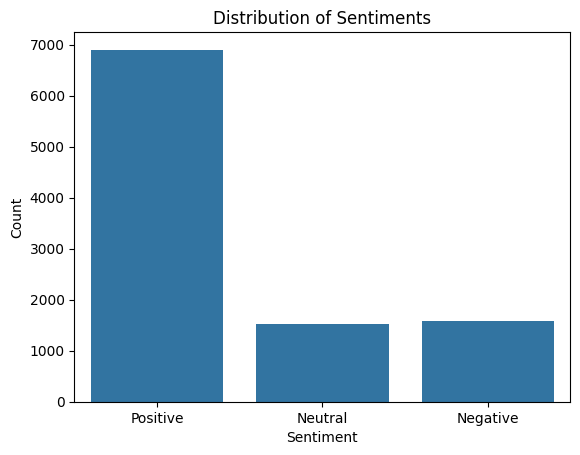

In [114]:
plot_sentiment_distribution(data_tweets_combined)

## Destination Analysis

In [118]:
import ast

def map_tags_to_service_destination(row, mapping):
    # Safely evaluate the string to convert it into a list of dictionaries
    tags_list = ast.literal_eval(row['tags'])

    # Initialize lists for services and destinations
    services = []
    destinations = []

    # Mapping each tag to its corresponding service and destination
    for tag in tags_list:
        tag_value = tag['value']
        if tag_value in mapping:
            service, destination = mapping[tag_value]
            services.append(service)
            destinations.append(destination)
        else:
            services.append('Unknown')
            destinations.append('Unknown')

    return services, destinations

# Assuming df is your DataFrame and tags_mapping is your JSON mapping
data_tweets_combined['services'], data_tweets_combined['destinations'] = zip(*data_tweets_combined.apply(lambda row: map_tags_to_service_destination(row, tags_mapping), axis=1))


In [119]:
data_tweets_combined.head()

,id,content,date,language,tags,title,ratings,mapped_tags,review_count,sentiment,confidence,content_translated,is_outlier,contains_emoji,services,destinations
0,377380-203583770957,من الاماكن الهاديه الجميله الممتعه في التسوق تحس انك بالخبر,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c07bdfc8hb0r13sa7agg', 'sentiment': None}, {'value': 'c07bdfc8hb0r13sa7ah0', 'sentiment': None}]",Al Ahsa Mall by Arabian Centres,"{'normalized': 100, 'raw': 5}","[['Tourism Attractions/ Sites', 'Al Ahsa'], ['Retail', 'Al Ahsa']]",2,Positive,0.869783,"One of the beautiful, fun places in shopping, you feel that you are in the news",False,False,"[Tourism Attractions/ Sites, Retail]","[Al Ahsa, Al Ahsa]"
1,377380-203585579625,مساحة خضراء تتنفس فيها الهواء النقي .. المناظر الطبيعية ..الالعاب الترفيهية المناسبة للأطفال 😍😍 بحر الخليج,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c07bdncbb64t6si78ssg', 'sentiment': None}, {'value': 'c07bdofepd3oq1r123kg', 'sentiment': None}, {'value': 'c0rquskbb64sdb6ukkq0', 'sentiment': None}, {'value': 'c0rqv8sbb64sdb6ukks0', 'sentiment': None}, {'value': 'c07bdifepd3oq1r122rg', 'sentiment': None}]","King Abdullah Park, Sea front","{'normalized': 100, 'raw': 5}","[['Tourism Attractions/ Sites', 'Khobar'], ['Tourism Attractions/ Sites', 'Madinah'], ['Accommodation', 'Riyadh'], ['Tourism Attractions/ Sites', 'Riyadh'], ['Tourism Attractions/ Sites', 'Dammam']]",5,Positive,0.813557,Green space in which the fresh air is breathing ... the landscape .. the appropriate entertainment games for children 😍😍 Gulf Sea,False,True,"[Tourism Attractions/ Sites, Tourism Attractions/ Sites, Accommodation, Tourism Attractions/ Sites, Tourism Attractions/ Sites]","[Khobar, Madinah, Riyadh, Riyadh, Dammam]"
2,377380-203589330972,جميل❤,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c9ga0skbb64rs4ni6s7g', 'sentiment': None}]",Waterfront Beach Royal Commission Yanbu,"{'normalized': 80, 'raw': 4}","[['Tourism Attractions/ Sites', 'Yanbu']]",1,Positive,0.796950,Beautiful,False,False,[Tourism Attractions/ Sites],[Yanbu]
3,377380-203586632060,جميييل,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c07bdncbb64t6si78ssg', 'sentiment': None}, {'value': 'c07bdifepd3oq1r122rg', 'sentiment': None}]",Dammam Corniche,"{'normalized': 100, 'raw': 5}","[['Tourism Attractions/ Sites', 'Khobar'], ['Tourism Attractions/ Sites', 'Dammam']]",2,Positive,0.575323,Beautiful,False,False,"[Tourism Attractions/ Sites, Tourism Attractions/ Sites]","[Khobar, Dammam]"
4,377380-203585120372,الموقع جميل لكن السياح الاجانب السيدات لايلتزمون بالستر !,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c9g8ijgcu1ielf8dr38g', 'sentiment': None}]",Wadi Lajab,"{'normalized': 40, 'raw': 2}","[['Tourism Attractions/ Sites', 'Jizan']]",1,Neutral,0.603316,"The site is beautiful, but foreign tourists are not committed to concealment!",False,False,[Tourism Attractions/ Sites],[Jizan]


In [120]:
data_tweets_combined.isna().sum()

id                     0
content                0
date                   0
language               0
tags                   0
title                  0
ratings               10
mapped_tags            0
review_count           0
sentiment              0
confidence             0
content_translated     0
is_outlier             0
contains_emoji         0
services               0
destinations           0
dtype: int64

In [131]:
def plot_service_distribution(df):
    from collections import Counter
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Flatten the list of services and count occurrences
    all_services = sum(df['services'], [])
    service_counts = Counter(all_services)

    # Sort services by count
    sorted_services = dict(sorted(service_counts.items(), key=lambda item: item[1], reverse=True))
    
    # Set the seaborn style
    sns.set(style="whitegrid")
    
    # Create a larger figure for better visibility
    plt.figure(figsize=(14, 7))

    # Create bar plot with a color palette
    sns.barplot(x=list(sorted_services.keys()), y=list(sorted_services.values()), palette='viridis')
    
    # Set the title and labels with font size adjustments
    plt.title('Frequency Distribution of Services', fontsize=16)
    plt.xlabel('Service Type', fontsize=14)
    plt.ylabel('Count', fontsize=14)

    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=75, fontsize=12)
    plt.yticks(fontsize=12)

    # Optionally, add annotations on each bar
    for i, (key, value) in enumerate(sorted_services.items()):
        plt.text(i, value, f'{value}', ha='center', va='bottom', fontsize=10)

    # Adjust layout to make room for x-axis labels
    plt.tight_layout()

    # Show the plot
    plt.show()


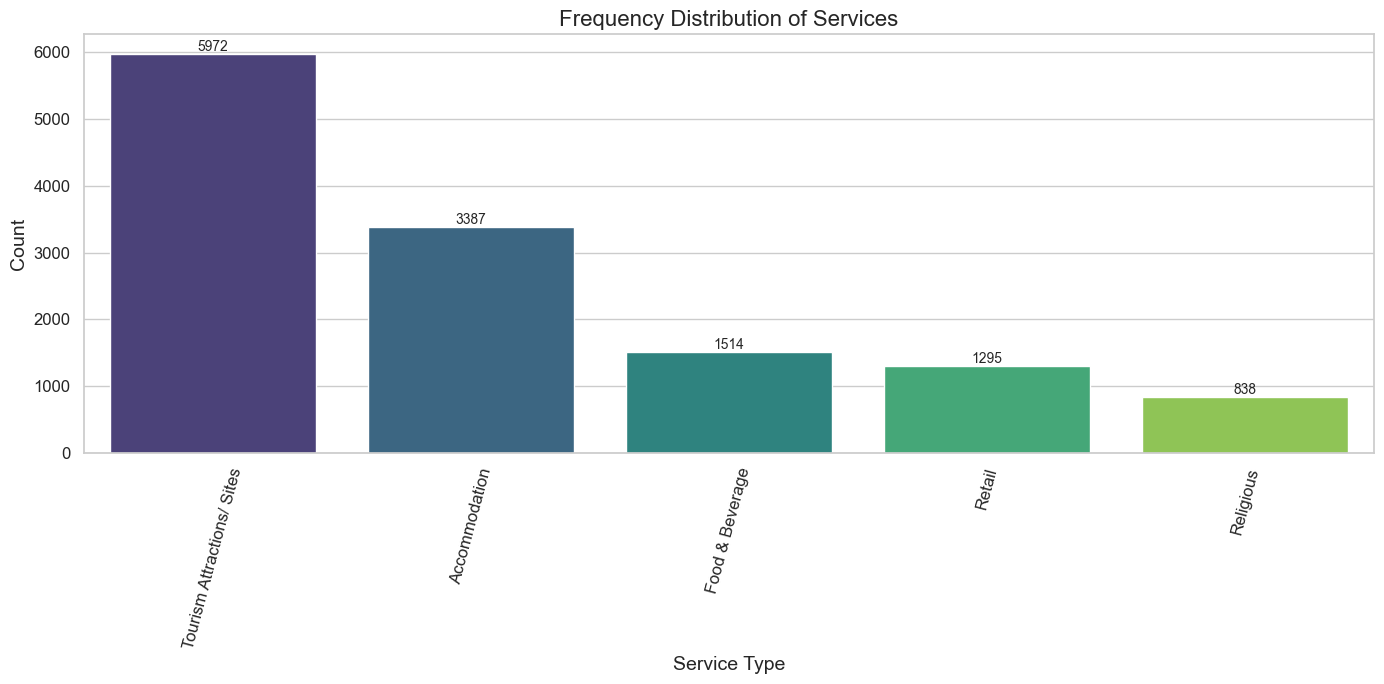

In [132]:
plot_service_distribution(data_tweets_combined)

In [129]:
def plot_destination_distribution(df):
    from collections import Counter
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Flatten the list of destinations and count occurrences
    all_destinations = sum(df['destinations'], [])
    destination_counts = Counter(all_destinations)

    # Sort destinations by count
    sorted_destinations = dict(sorted(destination_counts.items(), key=lambda item: item[1], reverse=True))
    
    # Set the color palette and style
    sns.set(style="whitegrid")
    
    # Create a larger figure for better visibility
    plt.figure(figsize=(14, 7))

    # Create bar plot
    sns.barplot(x=list(sorted_destinations.keys()), y=list(sorted_destinations.values()), palette='viridis')
    
    # Set the title and labels
    plt.title('Frequency Distribution of Destinations', fontsize=16)
    plt.xlabel('Destination', fontsize=14)
    plt.ylabel('Count', fontsize=14)

    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=75, fontsize=12)
    plt.yticks(fontsize=12)

    # Optionally, add annotations on each bar
    for i, (key, value) in enumerate(sorted_destinations.items()):
        plt.text(i, value, f'{value}', ha='center', va='bottom', fontsize=10)

    # Adjust layout to make room for x-axis labels
    plt.tight_layout()

    # Show the plot
    plt.show()


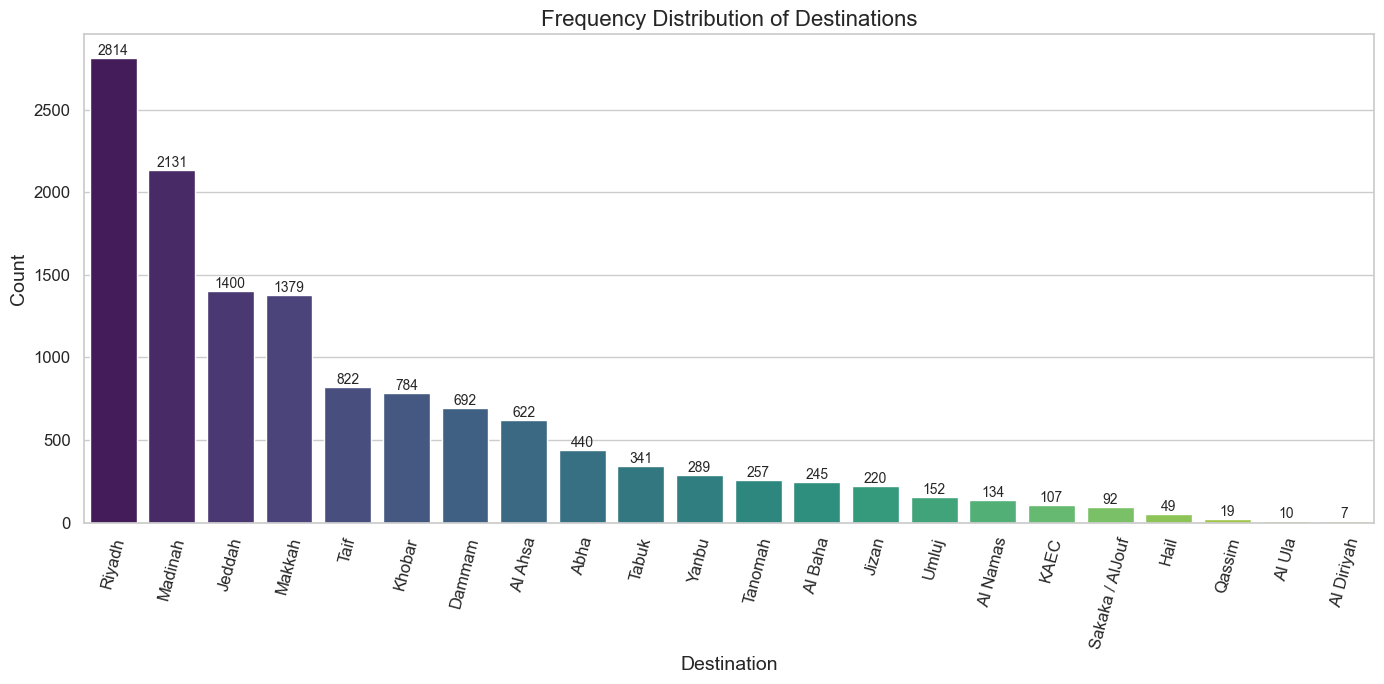

In [130]:
plot_destination_distribution(data_tweets_combined)

## Get rows where the rating is Blank

In [146]:
df_blank_rating = data_tweets_combined[pd.isna(data_tweets_combined['rating_out_of_5'])]
df_blank_rating.head()

,id,content,date,language,tags,title,ratings,mapped_tags,review_count,sentiment,confidence,content_translated,is_outlier,contains_emoji,services,destinations,rating_out_of_5
2302,377380-203592291403,(Переведено Google) Зоопарк сладок еще раз еще раз еще раз (Оригинал) حديقة الحيوان حلو مره مره مره مره مره مره مره مره مره مره مره,2021-04-11T07:52:00+00:00,ara,"[{'value': 'c07bdofepd3oq1r123kg', 'sentiment': None}, {'value': 'c0rquskbb64sdb6ukkq0', 'sentiment': None}, {'value': 'c0rqv8sbb64sdb6ukks0', 'sentiment': None}]",Riyadh Zoo,NaN,"[['Tourism Attractions/ Sites', 'Madinah'], ['Accommodation', 'Riyadh'], ['Tourism Attractions/ Sites', 'Riyadh']]",3,Positive,0.609564,(Переведено Google),False,False,"[Tourism Attractions/ Sites, Accommodation, Tourism Attractions/ Sites]","[Madinah, Riyadh, Riyadh]",NaN
2610,377380-203592281835,"(Переведено Google) Парк очень красивый, не хватает, чтобы животные были ближе, например, львы, а другие далеко.Сад остается на вечер, атмосфера более красивая, приятная, а после долгой прогулки есть время отдохнуть. , например, сад Анам ранее в Джидде, он хранился примерно в 10 часов вечера, и там были мероприятия, и сад был красивым вечером, особенно температура погоды. Я надеюсь посмотреть на это и поблагодарить вас. (Оригинал) الحديقة جميله جدا ينقصها ان الحيوانات تكون اقرب مثلا الاسود وغيرها بعيده لو يوضع حاجز اطول وتكون اقرب تشاهدها بوضوح ايضا الوقت ما يجي الساعه ٥ الا ويخرجونك من المكان غصب لدرجة تجمع الزائرين عند البوابه الرئيسيه بشكل مخيف وفي ظل ازمة كورونا والسبب انهم يخرجونك فجاة والكل والمفترض ان الحديقة تبقى للمساء تكون الاجواء اجمل واروق ووقت للراحه بعد المشيء الطويل مثل حديقة الانعام سابقا في جدة كانت تبقى للساعه ١٠ مساء تقريبا وكانت فيها فعاليات والحديقة تكون جميله في المساء بالذات حرارة الاجواء اتمنى النظر في هذا الشيء وشكرا .",2021-04-11T08:01:00+00:00,ara,"[{'value': 'c07bdkkbb64t6si78s30', 'sentiment': None}, {'value': 'c07bdofepd3oq1r123kg', 'sentiment': None}, {'value': 'c0rquskbb64sdb6ukkq0', 'sentiment': None}, {'value': 'c0rqv8sbb64sdb6ukks0', 'sentiment': None}]",Riyadh Zoo,NaN,"[['Tourism Attractions/ Sites', 'Jeddah'], ['Tourism Attractions/ Sites', 'Madinah'], ['Accommodation', 'Riyadh'], ['Tourism Attractions/ Sites', 'Riyadh']]",4,Neutral,0.529205,"(Переведено Google) Парк очень красивый, не хватает, чтобы животные были ближе, например, львы, а другие далеко.Сад остается на вечер, атмосфера более красивая, приятная, а после долгой прогулки есть время отдохнуть. , например, сад Анам ранее в Джидде, он хранился примерно в 10 часов вечера, и там были мероприятия, и сад был красивым вечером, особенно температура погоды. Я надеюсь посмотреть на это и поблагодарить вас. (Оригинал) الحديقة جميله جدا ينقصها ان الحيوانات تكون اقرب مثلا الاسود وغيرها بعيده لو يوضع حاجز اطول وتكون اقرب تشاهدها بوضوح ايضا الوقت ما يجي الساعه ٥ الا ويخرجونك من المكان غصب لدرجة تجمع الزائرين عند البوابه الرئيسيه بشكل مخيف وفي ظل ازمة كورونا والسبب انهم يخرجونك فجاة والكل والمفترض ان الحديقة تبقى للمساء تكون الاجواء اجمل واروق ووقت للراحه بعد المشيء الطويل مثل حديقة الانعام سابقا في جدة كانت تبقى للساعه ١٠ مساء تقريبا وكانت فيها فعاليات والحديقة تكون جميله في المساء بالذات حرارة الاجواء اتمنى النظر في هذا الشيء وشكرا .",False,False,"[Tourism Attractions/ Sites, Tourism Attractions/ Sites, Accommodation, Tourism Attractions/ Sites]","[Jeddah, Madinah, Riyadh, Riyadh]",NaN
2937,377380-203588466840,"(Переведено Google) Лес Рагдан - красивый большой лес с детскими игрушками, множеством киосков, туалетов и видами на препятствие Аль-Баха. (Оригинал) غابة رغدان غابة كبيره جميله بها العاب اطفال وكشكات كثيره ودورات مياه واطلالتها على عقبة الباحه ممتازه منظمه وجميله لا تفتح طوال السنه لها اوقات معينه",2021-04-11T08:11:00+00:00,ara,"[{'value': 'c9g7u348hb0qun2qahng', 'sentiment': None}]",Raghadan Forest Park,NaN,"[['Tourism Attractions/ Sites', 'Al Baha']]",1,Positive,0.913386,"(Переведено Google) лес рагдан - ррасивйй большой лес С С детскили игрушкари, множествол кисков, туалетов и ииидами напятвие Баха.(Ригина

We can see that there are some reviews which are not in arabic or english. Need to think how we can move forward with this

## Do individual Sentiment based analysis like for Positive and Negative

## Language detector

In [147]:
from langdetect import detect, DetectorFactory, LangDetectException
import pandas as pd

# To ensure consistent results
DetectorFactory.seed = 0

def detect_language(text):
    try:
        # Return the detected language
        return detect(text)
    except LangDetectException:
        # Return NaN or some default value if language detection fails
        return "Unknown"

# Apply the function to your DataFrame
data_tweets_combined['detected_language'] = data_tweets_combined['content'].apply(lambda x: detect_language(x))

# Count the number of occurrences of each language
language_counts = data_tweets_combined['detected_language'].value_counts()
print(language_counts)

detected_language
ar         6873
en         2243
fa          273
ur          217
so           71
ro           64
af           39
Unknown      30
fr           27
ca           22
nl           17
de           15
cs           12
tl           11
sl           11
id           10
no            9
it            7
da            6
et            5
pl            5
sw            5
cy            4
hr            4
sv            4
tr            4
hu            3
sq            2
es            2
pt            2
fi            2
vi            1
Name: count, dtype: int64


In [182]:
# Dictionary mapping ISO language codes to their full names
lang_code_to_name = {
    "ar": "Arabic", "fa": "Persian", "ur": "Urdu", "en": "English",
    "sq": "Albanian", "af": "Afrikaans", "vi": "Vietnamese", "ro": "Romanian",
    "fr": "French", "cy": "Welsh", "ca": "Catalan", "no": "Norwegian",
    "so": "Somali", "tl": "Tagalog", "nl": "Dutch", "es": "Spanish",
    "cs": "Czech", "Unknown": "Unknown", "et": "Estonian", "id": "Indonesian",
    "de": "German", "it": "Italian", "tr": "Turkish", "sl": "Slovenian",
    "hu": "Hungarian", "hr": "Croatian", "pt": "Portuguese", "sv": "Swedish",
    "pl": "Polish", "sw": "Swahili", "fi": "Finnish", "da": "Danish"
}

def get_full_language_name(lang_code):
    # Return the full language name from the code, or the original code if not found
    return lang_code_to_name.get(lang_code, lang_code)

# Apply the function to the DataFrame
data_tweets_combined['full_detected_language'] = data_tweets_combined['detected_language'].apply(get_full_language_name)
data_tweets_combined.head()

,id,content,date,language,tags,title,ratings,mapped_tags,review_count,sentiment,confidence,content_translated,is_outlier,contains_emoji,services,destinations,rating_out_of_5,detected_language,full_detected_language
0,377380-203583770957,من الاماكن الهاديه الجميله الممتعه في التسوق تحس انك بالخبر,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c07bdfc8hb0r13sa7agg', 'sentiment': None}, {'value': 'c07bdfc8hb0r13sa7ah0', 'sentiment': None}]",Al Ahsa Mall by Arabian Centres,"{'normalized': 100, 'raw': 5}","[['Tourism Attractions/ Sites', 'Al Ahsa'], ['Retail', 'Al Ahsa']]",2,Positive,0.869783,"One of the beautiful, fun places in shopping, you feel that you are in the news",False,False,"[Tourism Attractions/ Sites, Retail]","[Al Ahsa, Al Ahsa]",5.0,ar,Arabic
1,377380-203585579625,مساحة خضراء تتنفس فيها الهواء النقي .. المناظر الطبيعية ..الالعاب الترفيهية المناسبة للأطفال 😍😍 بحر الخليج,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c07bdncbb64t6si78ssg', 'sentiment': None}, {'value': 'c07bdofepd3oq1r123kg', 'sentiment': None}, {'value': 'c0rquskbb64sdb6ukkq0', 'sentiment': None}, {'value': 'c0rqv8sbb64sdb6ukks0', 'sentiment': None}, {'value': 'c07bdifepd3oq1r122rg', 'sentiment': None}]","King Abdullah Park, Sea front","{'normalized': 100, 'raw': 5}","[['Tourism Attractions/ Sites', 'Khobar'], ['Tourism Attractions/ Sites', 'Madinah'], ['Accommodation', 'Riyadh'], ['Tourism Attractions/ Sites', 'Riyadh'], ['Tourism Attractions/ Sites', 'Dammam']]",5,Positive,0.813557,Green space in which the fresh air is breathing ... the landscape .. the appropriate entertainment games for children 😍😍 Gulf Sea,False,True,"[Tourism Attractions/ Sites, Tourism Attractions/ Sites, Accommodation, Tourism Attractions/ Sites, Tourism Attractions/ Sites]","[Khobar, Madinah, Riyadh, Riyadh, Dammam]",5.0,ar,Arabic
2,377380-203589330972,جميل❤,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c9ga0skbb64rs4ni6s7g', 'sentiment': None}]",Waterfront Beach Royal Commission Yanbu,"{'normalized': 80, 'raw': 4}","[['Tourism Attractions/ Sites', 'Yanbu']]",1,Positive,0.796950,Beautiful,False,False,[Tourism Attractions/ Sites],[Yanbu],4.0,ar,Arabic
3,377380-203586632060,جميييل,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c07bdncbb64t6si78ssg', 'sentiment': None}, {'value': 'c07bdifepd3oq1r122rg', 'sentiment': None}]",Dammam Corniche,"{'normalized': 100, 'raw': 5}","[['Tourism Attractions/ Sites', 'Khobar'], ['Tourism Attractions/ Sites', 'Dammam']]",2,Positive,0.575323,Beautiful,False,False,"[Tourism Attractions/ Sites, Tourism Attractions/ Sites]","[Khobar, Dammam]",5.0,fa,Persian
4,377380-203585120372,الموقع جميل لكن السياح الاجانب السيدات لايلتزمون بالستر !,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c9g8ijgcu1ielf8dr38g', 'sentiment': None}]",Wadi Lajab,"{'normalized': 40, 'raw': 2}","[['Tourism Attractions/ Sites', 'Jizan']]",1,Neutral,0.603316,"The site is beautiful, but foreign tourists are not committed to concealment!",False,False,[Tourism Attractions/ Sites],[Jizan],2.0,ar,Arabic


In [194]:
data_urdu = data_tweets_combined[data_tweets_combined['detected_language'] == 'tr']
data_urdu.head(6)

id  \
7754  377380-203587564189   
8698  377380-167228633499   
8936  377380-167609665400   
8938  377380-167494956265   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [195]:
data_urdu.value_counts

<bound method DataFrame.value_counts of                        id  \
7754  377380-203587564189   
8698  377380-167228633499   
8936  377380-167609665400   
8938  377380-167494956265   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [161]:
data_tweets_combined.detected_language.unique()

array(['ar', 'fa', 'ur', 'en', 'sq', 'af', 'vi', 'ro', 'fr', 'cy', 'ca',
       'no', 'so', 'tl', 'nl', 'es', 'cs', 'Unknown', 'et', 'id', 'de',
       'it', 'tr', 'sl', 'hu', 'hr', 'pt', 'sv', 'pl', 'sw', 'fi', 'da'],
      dtype=object)

In [199]:
data_russ = data_tweets_combined[data_tweets_combined['content'].str.contains('Переведено', na=False)]
data_russ.head()

,id,content,date,language,tags,title,ratings,mapped_tags,review_count,sentiment,confidence,content_translated,is_outlier,contains_emoji,services,destinations,rating_out_of_5,detected_language,full_detected_language
2302,377380-203592291403,(Переведено Google) Зоопарк сладок еще раз еще раз еще раз (Оригинал) حديقة الحيوان حلو مره مره مره مره مره مره مره مره مره مره مره,2021-04-11T07:52:00+00:00,ara,"[{'value': 'c07bdofepd3oq1r123kg', 'sentiment': None}, {'value': 'c0rquskbb64sdb6ukkq0', 'sentiment': None}, {'value': 'c0rqv8sbb64sdb6ukks0', 'sentiment': None}]",Riyadh Zoo,NaN,"[['Tourism Attractions/ Sites', 'Madinah'], ['Accommodation', 'Riyadh'], ['Tourism Attractions/ Sites', 'Riyadh']]",3,Positive,0.609564,(Переведено Google),False,False,"[Tourism Attractions/ Sites, Accommodation, Tourism Attractions/ Sites]","[Madinah, Riyadh, Riyadh]",NaN,fa,Persian
2610,377380-203592281835,"(Переведено Google) Парк очень красивый, не хватает, чтобы животные были ближе, например, львы, а другие далеко.Сад остается на вечер, атмосфера более красивая, приятная, а после долгой прогулки есть время отдохнуть. , например, сад Анам ранее в Джидде, он хранился примерно в 10 часов вечера, и там были мероприятия, и сад был красивым вечером, особенно температура погоды. Я надеюсь посмотреть на это и поблагодарить вас. (Оригинал) الحديقة جميله جدا ينقصها ان الحيوانات تكون اقرب مثلا الاسود وغيرها بعيده لو يوضع حاجز اطول وتكون اقرب تشاهدها بوضوح ايضا الوقت ما يجي الساعه ٥ الا ويخرجونك من المكان غصب لدرجة تجمع الزائرين عند البوابه الرئيسيه بشكل مخيف وفي ظل ازمة كورونا والسبب انهم يخرجونك فجاة والكل والمفترض ان الحديقة تبقى للمساء تكون الاجواء اجمل واروق ووقت للراحه بعد المشيء الطويل مثل حديقة الانعام سابقا في جدة كانت تبقى للساعه ١٠ مساء تقريبا وكانت فيها فعاليات والحديقة تكون جميله في المساء بالذات حرارة الاجواء اتمنى النظر في هذا الشيء وشكرا .",2021-04-11T08:01:00+00:00,ara,"[{'value': 'c07bdkkbb64t6si78s30', 'sentiment': None}, {'value': 'c07bdofepd3oq1r123kg', 'sentiment': None}, {'value': 'c0rquskbb64sdb6ukkq0', 'sentiment': None}, {'value': 'c0rqv8sbb64sdb6ukks0', 'sentiment': None}]",Riyadh Zoo,NaN,"[['Tourism Attractions/ Sites', 'Jeddah'], ['Tourism Attractions/ Sites', 'Madinah'], ['Accommodation', 'Riyadh'], ['Tourism Attractions/ Sites', 'Riyadh']]",4,Neutral,0.529205,"(Переведено Google) Парк очень красивый, не хватает, чтобы животные были ближе, например, львы, а другие далеко.Сад остается на вечер, атмосфера более красивая, приятная, а после долгой прогулки есть время отдохнуть. , например, сад Анам ранее в Джидде, он хранился примерно в 10 часов вечера, и там были мероприятия, и сад был красивым вечером, особенно температура погоды. Я надеюсь посмотреть на это и поблагодарить вас. (Оригинал) الحديقة جميله جدا ينقصها ان الحيوانات تكون اقرب مثلا الاسود وغيرها بعيده لو يوضع حاجز اطول وتكون اقرب تشاهدها بوضوح ايضا الوقت ما يجي الساعه ٥ الا ويخرجونك من المكان غصب لدرجة تجمع الزائرين عند البوابه الرئيسيه بشكل مخيف وفي ظل ازمة كورونا والسبب انهم يخرجونك فجاة والكل والمفترض ان الحديقة تبقى للمساء تكون الاجواء اجمل واروق ووقت للراحه بعد المشيء الطويل مثل حديقة الانعام سابقا في جدة كانت تبقى للساعه ١٠ مساء تقريبا وكانت فيها فعاليات والحديقة تكون جميله في المساء بالذات حرارة الاجواء اتمنى النظر في هذا الشيء وشكرا .",False,False,"[Tourism Attractions/ Sites, Tourism Attractions/ Sites, Accommodation, Tourism Attractions/ Sites]","[Jeddah, Madinah, Riyadh, Riyadh]",NaN,ar,Arabic
2937,377380-203588466840,"(Переведено Google) Лес Рагдан - красивый большой лес с детскими игрушками, множеством киосков, туалетов и видами на препятствие Аль-Баха. (Оригинал) غابة رغدان غابة كبيره جميله بها العاب اطفال وكشكات كثيره ودورات مياه واطلالتها على عقبة الباحه ممتازه منظمه وجميله لا تفتح طوال السنه لها اوقات معينه",2021-04-11T08:11:00+00:00,ara,"[{'value': 'c9g7u348hb0qun2qahng', 'sentiment': None}]",Raghadan Forest Park,NaN,"[['Tourism Attractions/ Sites', 'Al Baha']]",1,Positive,0.913386,"(Переведено Google) лес рагдан - ррасивйй большой лес С С детскили игрушкар

In [200]:
data_russ.value_counts

<bound method DataFrame.value_counts of                        id  \
2302  377380-203592291403   
2610  377380-203592281835   
2937  377380-203588466840   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [203]:
data_not_translted_well = data_tweets_combined[data_tweets_combined['content_translated'].str.contains('Translated',na=False)]
data_not_translted_well.head()

,id,content,date,language,tags,title,ratings,mapped_tags,review_count,sentiment,confidence,content_translated,is_outlier,contains_emoji,services,destinations,rating_out_of_5,detected_language,full_detected_language
2111,377380-172697749038,"More(Translated by Google) A restaurant located in Al-Khobar Governorate, in the Eastern Province, on King Abdulaziz Street. It offers types of oriental, Indian and marine foods characterized by delicious and fresh taste. But the price is very high (Original) مطعم يقع في محافظة الخبر بالمنطقة الشرقية في شارع الملك عبدالعزيز. يقدم أنواع من الاطعمه الشرقية والهندية والبحرية يتميز بالطعم اللذيذ والطازج. ولاكن اسعارةأسعاره مرتفعة جداً",2021-04-11T07:47:00+00:00,ara,"[{'value': 'c07bdncbb64t6si78ss0', 'sentiment': None}]",Taya Restaurant Khobar,"{'normalized': 40, 'raw': 2}","[['Food & Beverage', 'Khobar']]",1,Positive,0.827942,"More(Translated by Google) A restaurant located in Al-Khobar Governorate, in the Eastern Province, on King Abdulaziz Street. It offers types of oriental, Indian and marine foods characterized by delicious and fresh taste. But the price is very high (Original) مطعم يقع في محافظة الخبر بالمنطقة الشرقية في شارع الملك عبدالعزيز. يقدم أنواع من الاطعمه الشرقية والهندية والبحرية يتميز بالطعم اللذيذ والطازج. ولاكن اسعارةأسعاره مرتفعة جداً",False,False,[Food & Beverage],[Khobar],2.0,en,English
2370,377380-172697737880,"More(Translated by Google) The visit took place on April 9, 2021 A restaurant with family privacy, there are closed and open sessions The place is clean and quiet The dishes are varied I liked them, they have a delicious cold appetizer dish, as well as the fettuccine, as well as the fish fillet dish with mashed potatoes (sensation). Indian dishes I tried the biryani and butter chicken, the taste was good. As well as the problem of seafood dishes is also good In general it is worth a try but we hope to check the prices are considered high (Original) الزيارة تمت في ٩ ابريل ٢٠٢١ مطعم ذو خصوصية عائلية هناك جلسات مغلقه وجلسات مفتوحة المكان نظيف وهادئ الاطباق متنوعة اعجبني عندهم طبق المقبلات الباردة لذيذة وكذلك الفيتوتشييني وكذلك طبق فيليه السمك مع البطاطا المهروسة ( سنسيشن) الاطباق الهنديية جربت البرياني والدجاج بالزبدة كان الطعم جيد كذلك مشكل اطباق بحرية ايضا جيد بشكل عام يستحق التجربة لكن نتمنى مراجعة الأسعار تعتبر مرتفعة",2021-04-11T07:54:00+00:00,ara,"[{'value': 'c07bdncbb64t6si78ss0', 'sentiment': None}]",Taya Restaurant Khobar,"{'normalized': 80, 'raw': 4}","[['Food & Beverage', 'Khobar']]",1,Positive,0.817532,"More (Translated by Google) The Visit Took Place on April 9, 2021 A Restaurant with Family Privacy, There is Closed and Open Sessions The Place is Clean and Quiet The Dishes Are Varied I Liked them, they have a ICIOUS COLD APTIZER DISH, ASWell as the Fettuccine, as well as the Fish Fillet Dish with Mashed Potatoes (Sensation).Indian DISHES I TRID The Biriani and Butter Chicken, The Tast Was Good.As well as the problem of seafood dishes is also good in general it is work a try but we hop to check the prics are considered hight (origin) visit on April 9, 2021 restaurants with family privacy there are closed sessions and open sessions The place is clean and calm dishesVarious I liked them with a delicious cold appetizer, as well as the vitchiini, as well as the fish fillet dish with mashed potato",False,False,[Food & Beverage],[Khobar],4.0,en,English
4266,377380-167287655672,"More(Translated by Google) May God have mercy on her and forgive her and make her live in paradise Oh God, make her grave a garden from Riyadh May God reward you, and may God bless you May God bear your patience and bind all of your hearts O Abu Ahmed We belong to Allah and to Him we shall return (Original) الله يرحمها ويغفر لها ويسكنها فسيح جناته اللهم اجعل قبرها روضه من رياض الجنه عظم الله اجركم واحسن الله عزاءكم الله يصبركم ويربط على قلوبكم جميع يا ابو احمد انا لله وانا اليه راجعون",2021-02-07T00:00:00+00:00,ara,"[{'value': 'c07bdkkbb64t6si78s90', 'sentiment': None}]",Khadija Baghlaf M

In [204]:
data_not_translted_well.value_counts

<bound method DataFrame.value_counts of                        id  \
2111  377380-172697749038   
2370  377380-172697737880   
4266  377380-167287655672   
4279  377380-167155590734   
4281  377380-167138153854   
...                   ...   
7596  377380-170096489471   
7601  377380-168103766497   
7603  377380-170059060916   
7605  377380-170059072985   
7606  377380-168116614508   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   